In [2]:
import pandas as pd
import numpy as np
import random
from numpy.random import RandomState
from scipy import stats
from scipy.optimize import minimize
import scipy
import os
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Versions/4.1/Resources/'
import rpy2
from rpy2.robjects.packages import importr
from rpy2.robjects.packages import SignatureTranslatedAnonymousPackage
from rpy2.robjects.vectors import FloatVector
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [3]:
file_folder_path = "/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/"
file001 = pd.read_csv(file_folder_path + "stvol_cal_jumbo24_1_result.csv", index_col=[0])
file003 = pd.read_csv(file_folder_path + "stvol_cal_jumbo24_3_result.csv", index_col=[0])
file005 = pd.read_csv(file_folder_path + "stvol_cal_jumbo24_5_result.csv", index_col=[0])
file006 = pd.read_csv(file_folder_path + "stvol_cal_jumbo24_6_result.csv", index_col=[0])


file01 = pd.read_csv(file_folder_path + "stvol_cal_standard8_1_result.csv", index_col=[0])
file02 = pd.read_csv(file_folder_path + "stvol_cal_standard8_2_result.csv", index_col=[0])
file03 = pd.read_csv(file_folder_path + "stvol_cal_standard8_3_result.csv", index_col=[0])
file04 = pd.read_csv(file_folder_path + "stvol_cal_standard8_4_result.csv", index_col=[0])
file05 = pd.read_csv(file_folder_path + "stvol_cal_standard8_5_result.csv", index_col=[0])


file1 = pd.read_csv(file_folder_path + "stvol_cal_medium16_1_result.csv", index_col=[0])
file2 = pd.read_csv(file_folder_path + "stvol_cal_medium16_2_result.csv", index_col=[0])
file3 = pd.read_csv(file_folder_path + "stvol_cal_medium16_3_result.csv", index_col=[0])
file3_2 = pd.read_csv(file_folder_path + "stvol_cal_medium16_3_result_2.csv", index_col=[0])
file4 = pd.read_csv(file_folder_path + "stvol_cal_medium16_4_result.csv", index_col=[0])
file5 = pd.read_csv(file_folder_path + "stvol_cal_medium16_5_result.csv", index_col=[0])
file6 = pd.read_csv(file_folder_path + "stvol_cal_medium16_6_result.csv", index_col=[0])
file7 = pd.read_csv(file_folder_path + "stvol_cal_medium16_7_result.csv", index_col=[0])
file8 = pd.read_csv(file_folder_path + "stvol_cal_medium16_8_result.csv", index_col=[0])
file9 = pd.read_csv(file_folder_path + "stvol_cal_medium16_9_result.csv", index_col=[0])
file10 = pd.read_csv(file_folder_path + "stvol_cal_medium16_10_result.csv", index_col=[0])
file26 = pd.read_csv(file_folder_path + "stvol_cal_medium16_26_result.csv", index_col=[0])
file27 = pd.read_csv(file_folder_path + "stvol_cal_medium16_27_result.csv", index_col=[0])

csv_file = pd.concat([file001, file003, file005, file006,
                      file01, file02, file03, file04, file05,
                      file1, file2, file3, file3_2, file4, file5, 
                      file6, file7, file8, file9, file10,
                      file26, file27])

In [4]:
def resx_clean(resx_string):
    r1 = resx_string.replace('[', '').replace(']', '').split(' ')
    r2 = list(filter(None, r1))
    r3 = [float(i) for i in r2]
    return r3

def time_clean(time_string):
    r1 = time_string.split('.')[0].split('days')[1].replace(' ', '').split(':')
    r2 = [float(i) for i in r1]
    seconds = r2[0]*3600 + r2[1]*60 + r2[2]
    return seconds

def loss_clean(loss_string):
    r1 = float(loss_string)
    return r1

def data_clean(csv_file):

    resx = pd.DataFrame(csv_file.iloc[:, 0].apply(resx_clean).tolist(), 
                        columns=[
                            'mu11', 'mu21', 'mu22', 'mu31', 'mu41', 'mu42', 
                            'sigma11', 'sigma12', 'sigma13', 'sigma14',
                            'sigma21', 'sigma22', 'sigma23', 'sigma24',
                            'sigma31', 'sigma32', 'sigma33', 'sigma34',
                            'sigma41', 'sigma42', 'sigma43', 'sigma44'])
    time = pd.DataFrame(csv_file.iloc[:, 1].apply(time_clean).tolist(), columns=['time'])
    loss = pd.DataFrame(csv_file.iloc[:, 2].apply(loss_clean).tolist(), columns=['loss'])
    new_data = pd.concat([resx, time, loss], axis=1)
    return new_data

In [5]:
clean_data = data_clean(csv_file)
print(clean_data)
row_index = 274
# row_index = np.where(clean_data.loss==clean_data.loss.min())[0][0]
params = FloatVector((clean_data.iloc[row_index, :][0:22]))

# pd.DataFrame(clean_data).to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/clean_data.csv")
# pd.DataFrame(clean_data.loss).to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/loss.csv")

         mu11      mu21      mu22      mu31      mu41      mu42   sigma11  \
0    0.703195  2.040800  1.468874  0.788860  1.230551  1.175546  0.275077   
1    0.805760  2.020072  1.148426  0.811864  1.529036  1.153121  0.211731   
2    0.735775  1.987106  1.335650  0.992331  2.350784  2.202956  0.238145   
3    0.507529  1.440026  1.384689  0.783219  1.505923  0.891031  0.412308   
4    0.629617  1.558658  1.653637  0.190945  0.289419  3.508939  0.167316   
..        ...       ...       ...       ...       ...       ...       ...   
339  0.640104  1.573871  1.591422  0.365115  1.275734  1.998318  0.438177   
340  0.694914  1.741978  1.371364  0.888611  2.021503  1.332889  0.282913   
341  0.689150  2.095828  1.903518  0.351397  1.160335  2.266184  0.298308   
342  0.496556  2.146752  2.152096  0.523455  2.055313  2.002674  0.305556   
343  0.520139  1.925714  1.726889  0.828159  1.793990  1.663040  0.254449   

      sigma12   sigma13   sigma14  ...   sigma31   sigma32   sigma33  \
0  

In [6]:
print(params)
print(clean_data.shape)
print(row_index)
print(clean_data.loss[row_index])
print('----')

print('mu1')
print(params[0])
print('kappa2')
print(params[2])
print('mu2')
print(params[1]/params[2])
print('mu3')
print(params[3])
print('kappa4')
print(params[5])
print('mu4')
print(params[4]/params[5])

print('sigma11')
print(params[6])
print('sigma12')
print(params[7])
print('sigma13')
print(params[8])
print('sigma14')
print(params[9])

print('sigma21*')
print(params[10])
print('sigma22*')
print(params[11])
print('sigma23*')
print(params[12])
print('sigma24*')
print(params[13])

print('sigma31')
print(params[14])
print('sigma32')
print(params[15])
print('sigma33')
print(params[16])
print('sigma34')
print(params[17])

print('sigma41*')
print(params[18])
print('sigma42*')
print(params[19])
print('sigma43*')
print(params[20])
print('sigma44*')
print(params[21])

 [1] 0.54379251 1.93083355 2.21617376 0.60807791 1.99524342 2.33097524
 [7] 0.37690630 0.04048059 0.05888540 0.24694305 0.26628096 0.16191160
[13] 0.33359742 0.41254866 0.02062589 0.31540330 0.22748827 0.13151046
[19] 0.46801761 0.37953382 0.21726141 0.25253455

(344, 24)
274
1533.7948882345504
----
mu1
0.54379251
kappa2
2.21617376
mu2
0.8712464630932187
mu3
0.60807791
kappa4
2.33097524
mu4
0.8559693752903185
sigma11
0.3769063
sigma12
0.04048059
sigma13
0.0588854
sigma14
0.24694305
sigma21*
0.26628096
sigma22*
0.1619116
sigma23*
0.33359742
sigma24*
0.41254866
sigma31
0.02062589
sigma32
0.3154033
sigma33
0.22748827
sigma34
0.13151046
sigma41*
0.46801761
sigma42*
0.37953382
sigma43*
0.21726141
sigma44*
0.25253455


In [7]:
real_data_folder = "/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Data/sp500_mixed_period_2000_2021/"
np.random.seed(22221)

# Define the model that generates pair simulations.

yuima = importr("yuima")
n_stvol_sim_string = """
n_stvol = function(random_seed, num_sim,
                    mu11, mu21, mu22, mu31, mu41, mu42, 
                    sigma11, sigma12, sigma13, sigma14,
                    sigma21, sigma22, sigma23, sigma24,
                    sigma31, sigma32, sigma33, sigma34,
                    sigma41, sigma42, sigma43, sigma44,
                    xinit_vec, vinit_vec, T0, T, length){
  
  set.seed(random_seed)
  
  drift = c("mu11-(1/2)*(v1)^2", "mu21-mu22*v1", "mu31-(1/2)*(v2)^2", "mu41-mu42*v2")
  diffusion = matrix(c("sigma11*v1", "sigma12*v1", "sigma13*v1", "sigma14*v1", 
                       "sigma21", "sigma22", "sigma23", "sigma24", 
                       "sigma31*v2", "sigma32*v2", "sigma33*v2", "sigma34*v2", 
                       "sigma41", "sigma42", "sigma43", "sigma44"), 
                     4, 4, byrow=TRUE)
  
  stvol_model = setModel(drift=drift, diffusion=diffusion,
                          time.variable = "t",
                          state.variable=c("X1", "v1", "X2", "v2"),
                          solve.variable=c("X1", "v1", "X2", "v2"))
  newsamp = setSampling(Initial=T0, Terminal=T, n=length)
  
  n_sim_data = data.frame(matrix(nrow=length+1, ncol=2*num_sim))
  for (i in 1:num_sim){
    stvol_sim = simulate(stvol_model, 
                          true.par=list(
                            mu11=mu11, mu21=mu21, mu22=mu22, mu31=mu31, mu41=mu41, mu42=mu42,  
                            sigma11=sigma11, sigma12=sigma12, sigma13=sigma13, sigma14=sigma14,
                            sigma21=sigma21, sigma22=sigma22, sigma23=sigma23, sigma24=sigma24,
                            sigma31=sigma31, sigma32=sigma32, sigma33=sigma33, sigma34=sigma34,
                            sigma41=sigma41, sigma42=sigma42, sigma43=sigma43, sigma44=sigma44), 
                          xinit=c(xinit_vec[[i]][1], vinit_vec[[i]][1], xinit_vec[[i]][2], vinit_vec[[i]][2]), 
                          sampling=newsamp)
    original_data = stvol_sim@data@original.data
    one_sim_stvol = data.frame(original_data[,1], original_data[,3])
    colnames(one_sim_stvol) = c('series1', 'series2')
    n_sim_data[, (2*i-1):(2*i)] = one_sim_stvol
  }
  return(n_sim_data)
}
"""

n_stvol_sim = SignatureTranslatedAnonymousPackage(n_stvol_sim_string, "n_stvol_sim")
def n_stvol_simulation(random_seed, num_sim,
                        mu11, mu21, mu22, mu31, mu41, mu42, 
                        sigma11, sigma12, sigma13, sigma14,
                        sigma21, sigma22, sigma23, sigma24,
                        sigma31, sigma32, sigma33, sigma34,
                        sigma41, sigma42, sigma43, sigma44,
                        xinit_vec, vinit_vec, T0, T, length):

    n_sim_data = pd.DataFrame(
        n_stvol_sim.n_stvol(random_seed=random_seed, num_sim=num_sim,
                              mu11=mu11, mu21=mu21, mu22=mu22, mu31=mu31, mu41=mu41, mu42=mu42,  
                              sigma11=sigma11, sigma12=sigma12, sigma13=sigma13, sigma14=sigma14,
                              sigma21=sigma21, sigma22=sigma22, sigma23=sigma23, sigma24=sigma24,
                              sigma31=sigma31, sigma32=sigma32, sigma33=sigma33, sigma34=sigma34,
                              sigma41=sigma41, sigma42=sigma42, sigma43=sigma43, sigma44=sigma44,
                              xinit_vec=xinit_vec, vinit_vec=vinit_vec, T0=T0, T=T, length=length)).transpose()
    return n_sim_data




def price_to_log_price(n_price):
    return(np.log(n_price))

def log_price_to_price(n_log_price):
    return(np.exp(n_log_price))

def price_to_return(n_price):
    n_return = pd.DataFrame()
    for i in range(n_price.shape[1]):
        ith_column_price_series = n_price.iloc[:, i]
        n_return = pd.concat([n_return, 100 * (np.log(ith_column_price_series[1:].values) - np.log(ith_column_price_series[:-1]))], axis=1)
    return n_return

def log_price_to_return(n_log_price):
    n_real_return = pd.DataFrame()
    for i in range(n_log_price.shape[1]):
        ith_column_price_series = n_log_price.iloc[:, i]
        n_real_return = pd.concat([n_real_return, 100 * (ith_column_price_series[1:].values - ith_column_price_series[:-1])], axis=1)
    return n_real_return


def cross_corr_coef(lag_time_series, lead_time_series, lag):
    # calculate the cross correlation between two time series
    # if the result is not zero, then 'lead_time_series' leads 'lag_time_series'
    lag_time_series = lag_time_series.iloc[lag:]
    corr_coef = np.corrcoef(lag_time_series, lead_time_series.iloc[0:((lead_time_series.size)-lag)])[0][1]
    return corr_coef


def cal_stats(n_return, n_price):
    
    return_series1 = n_return.iloc[:, ::2]
    return_series2 = n_return.iloc[:, 1::2]
    price_series1 = n_price.iloc[:, ::2]
    price_series2 = n_price.iloc[:, 1::2]
    sq_return_series1 = return_series1**2
    sq_return_series2 = return_series2**2

    
    mean1 = return_series1.mean(axis=0).values
    sd1 = return_series1.std(axis=0).values
    skew1 = return_series1.skew(axis=0).values
    kurtosis1 = return_series1.kurtosis(axis=0).values
       
    
    mean2 = return_series2.mean(axis=0).values
    sd2 = return_series2.std(axis=0).values
    skew2 = return_series2.skew(axis=0).values
    kurtosis2 = return_series2.kurtosis(axis=0).values #8(8)
    
    
    
    # Autocorrelation of the 2 return series with 3 lags respectively
    autocorr1_lag_1 = return_series1.apply(lambda x: x.autocorr(lag=1))
    autocorr1_lag_2 = return_series1.apply(lambda x: x.autocorr(lag=2))
    autocorr1_lag_3 = return_series1.apply(lambda x: x.autocorr(lag=3))
    autocorr2_lag_1 = return_series2.apply(lambda x: x.autocorr(lag=1)) 
    autocorr2_lag_2 = return_series2.apply(lambda x: x.autocorr(lag=2)) 
    autocorr2_lag_3 = return_series2.apply(lambda x: x.autocorr(lag=3)) #6(14)
    
    # Cross-correlation between return series
    corr_ts1_lag_0 = []
    corr_ts1_lag_1 = [] # if not zero, return series 2 leads return series 1
    corr_ts1_lag_2 = []
    corr_ts1_lag_3 = []
    corr_ts2_lag_1 = [] # if not zero, return series 1 lead return series 2
    corr_ts2_lag_2 = []
    corr_ts2_lag_3 = []
    for i in range(int(real_price.shape[1]/2)):
        corr_ts1_lag_0.append(cross_corr_coef(return_series1.iloc[:, i], return_series2.iloc[:, i], 0))
        corr_ts1_lag_1.append(cross_corr_coef(return_series1.iloc[:, i], return_series2.iloc[:, i], 1))
        corr_ts1_lag_2.append(cross_corr_coef(return_series1.iloc[:, i], return_series2.iloc[:, i], 2))
        corr_ts1_lag_3.append(cross_corr_coef(return_series1.iloc[:, i], return_series2.iloc[:, i], 3))
        corr_ts2_lag_1.append(cross_corr_coef(return_series2.iloc[:, i], return_series1.iloc[:, i], 1))
        corr_ts2_lag_2.append(cross_corr_coef(return_series2.iloc[:, i], return_series1.iloc[:, i], 2))
        corr_ts2_lag_3.append(cross_corr_coef(return_series2.iloc[:, i], return_series1.iloc[:, i], 3))
    corr_ts1_lag_0 = pd.Series(corr_ts1_lag_0)
    corr_ts1_lag_1 = pd.Series(corr_ts1_lag_1)
    corr_ts1_lag_2 = pd.Series(corr_ts1_lag_2)
    corr_ts1_lag_3 = pd.Series(corr_ts1_lag_3)
    corr_ts2_lag_1 = pd.Series(corr_ts2_lag_1)
    corr_ts2_lag_2 = pd.Series(corr_ts2_lag_2)
    corr_ts2_lag_3 = pd.Series(corr_ts2_lag_3)#7(21)
    
    
    
    # Autocorrelation of the 2 squared returns with 3 lags respectively
    autocorr_sqreturn_1_lag_1 = sq_return_series1.apply(lambda x: x.autocorr(lag=1))
    autocorr_sqreturn_1_lag_2 = sq_return_series1.apply(lambda x: x.autocorr(lag=2))
    autocorr_sqreturn_1_lag_3 = sq_return_series1.apply(lambda x: x.autocorr(lag=3))
    autocorr_sqreturn_2_lag_1 = sq_return_series2.apply(lambda x: x.autocorr(lag=1)) 
    autocorr_sqreturn_2_lag_2 = sq_return_series2.apply(lambda x: x.autocorr(lag=2)) 
    autocorr_sqreturn_2_lag_3 = sq_return_series2.apply(lambda x: x.autocorr(lag=3))#6(27)
    
    # Cross-correlation between squared returns series
    corr_sqts1_lag_0 = []
    corr_sqts1_lag_1 = [] # if not zero, return series 2 leads return series 1
    corr_sqts1_lag_2 = []
    corr_sqts1_lag_3 = []
    corr_sqts2_lag_1 = [] # if not zero, return series 1 lead return series 2
    corr_sqts2_lag_2 = []
    corr_sqts2_lag_3 = []
    for i in range(int(real_price.shape[1]/2)):
        corr_sqts1_lag_0.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 0))
        corr_sqts1_lag_1.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 1))
        corr_sqts1_lag_2.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 2))
        corr_sqts1_lag_3.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 3))
        corr_sqts2_lag_1.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 1))
        corr_sqts2_lag_2.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 2))
        corr_sqts2_lag_3.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 3))
    corr_sqts1_lag_0 = pd.Series(corr_ts1_lag_0)
    corr_sqts1_lag_1 = pd.Series(corr_ts1_lag_1)
    corr_sqts1_lag_2 = pd.Series(corr_ts1_lag_2)
    corr_sqts1_lag_3 = pd.Series(corr_ts1_lag_3)
    corr_sqts2_lag_1 = pd.Series(corr_ts2_lag_1)
    corr_sqts2_lag_2 = pd.Series(corr_ts2_lag_2)
    corr_sqts2_lag_3 = pd.Series(corr_ts2_lag_3)#7(34)
    
    
    
    
    stats_data = pd.DataFrame([mean1, mean2, sd1, sd2, 
                               skew1, skew2, kurtosis1, kurtosis2, #8(8)
                               
                               autocorr1_lag_1, autocorr1_lag_2, autocorr1_lag_3,
                               autocorr2_lag_1, autocorr2_lag_2, autocorr2_lag_3,#6(14)
                               
                               corr_ts1_lag_0, 
                               corr_ts1_lag_1, corr_ts1_lag_2, corr_ts1_lag_3,
                               corr_ts2_lag_1, corr_ts2_lag_2, corr_ts2_lag_3, #7(21)
                               
                               autocorr_sqreturn_1_lag_1, autocorr_sqreturn_1_lag_2, autocorr_sqreturn_1_lag_3,
                               autocorr_sqreturn_2_lag_1, autocorr_sqreturn_2_lag_2, autocorr_sqreturn_2_lag_3,#6(27)
                               
                               corr_sqts1_lag_0,
                               corr_sqts1_lag_1, corr_sqts1_lag_2, corr_sqts1_lag_3,
                               corr_sqts2_lag_1, corr_sqts2_lag_2, corr_sqts2_lag_3])#7(34)
    stats_data = stats_data.transpose()
    stats_data.columns = [
        'return_mean1', 'return_mean2',
        'return_sd1', 'return_sd2',
        'return_skew1', 'return_skew2',
        'return_kurtosis1', 'return_kurtosis2',
        
        'return_autocorrelation_ts1_lag1', 'return_autocorrelation_ts1_lag2', 'return_autocorrelation_ts1_lag3',
        'return_autocorrelation_ts2_lag1', 'return_autocorrelation_ts2_lag2', 'return_autocorrelation_ts2_lag3',
        
        'return_correlation_ts1_lag_0',
        'return_correlation_ts1_lag_1', 'return_correlation_ts1_lag_2', 'return_correlation_ts1_lag_3',
        'return_correlation_ts2_lag_1', 'return_correlation_ts2_lag_2', 'return_correlation_ts2_lag_3',
        
        'sqreturn_autocorrelation_ts1_lag1', 'sqreturn_autocorrelation_ts1_lag2', 'sqreturn_autocorrelation_ts1_lag3',
        'sqreturn_autocorrelation_ts2_lag1', 'sqreturn_autocorrelation_ts2_lag2', 'sqreturn_autocorrelation_ts2_lag3',
    
        'sqreturn_correlation_ts1_lag_0',
        'sqreturn_correlation_ts1_lag_1', 'sqreturn_correlation_ts1_lag_2', 'sqreturn_correlation_ts1_lag_3', 
        'sqreturn_correlation_ts2_lag_1', 'sqreturn_correlation_ts2_lag_2', 'sqreturn_correlation_ts2_lag_3']
    
    return stats_data


def loss_function(params):

    params = FloatVector(params)
    print(params)
    moment_loss = pd.DataFrame().reindex_like(real_stats)
    
    n_sim_log_price = n_stvol_simulation(
        random_seed=int(np.random.randint(low=0, high=980608, size=(1,))), num_sim=num_sim,
        mu11=params[0], 
        mu21=params[1], mu22=params[2], 
        mu31=params[3], 
        mu41=params[4], mu42=params[5],  
        sigma11=params[6],  sigma12=params[7],  sigma13=params[8],  sigma14=params[9],
        sigma21=params[10], sigma22=params[11], sigma23=params[12], sigma24=params[13],
        sigma31=params[14], sigma32=params[15], sigma33=params[16], sigma34=params[17],
        sigma41=params[18], sigma42=params[19], sigma43=params[20], sigma44=params[21],
        xinit_vec=xinit_vec, vinit_vec=vinit_vec, T0=T0, T=T, length=length)
    
    n_sim_price = log_price_to_price(n_log_price=n_sim_log_price)
    n_sim_return = price_to_return(n_sim_price)
    n_sim_stats = cal_stats(n_return=n_sim_return, n_price=n_sim_price)


    moment_loss = np.abs(n_real_stats - n_sim_stats)
    sum_loss = np.sum(moment_loss)

    sum_loss[6] = sum_loss[6]/10 
    sum_loss[7] = sum_loss[7]/10 
    
    loss = np.sum(sum_loss)
    
    print(sum_loss)
    print(loss)
    print('----------')

    return loss

In [8]:
real_price = pd.read_csv(real_data_folder + "pair_prices_cal.csv", index_col=[0])
real_log_price = price_to_log_price(n_price=real_price)
real_return = pd.read_csv(real_data_folder + "pair_returns_cal.csv", index_col=[0])
real_stats = cal_stats(n_return=real_return, n_price=real_price)


xinit_vec = []
vinit_vec = []
for i in range(int(real_price.shape[1]/2)):

    init_pair_log_price = [real_log_price.iloc[0, 2*i], real_log_price.iloc[0, 2*i+1]]
    init_pair_log_price = FloatVector(init_pair_log_price)
    xinit_vec.append(init_pair_log_price)
    
    init_pair_volatility = [np.std(real_return.iloc[:, 2*i]/100), np.std(real_return.iloc[:, 2*i+1]/100)]
    init_pair_volatility = FloatVector(init_pair_volatility)
    vinit_vec.append(init_pair_volatility)
    
num_sim, T0, T, length = real_stats.shape[0], 0, 2, real_price.shape[0]

n_real_stats = real_stats

np.random.seed(1234)
print(loss_function(params))

 [1] 0.54379251 1.93083355 2.21617376 0.60807791 1.99524342 2.33097524
 [7] 0.37690630 0.04048059 0.05888540 0.24694305 0.26628096 0.16191160
[13] 0.33359742 0.41254866 0.02062589 0.31540330 0.22748827 0.13151046
[19] 0.46801761 0.37953382 0.21726141 0.25253455

return_mean1                          23.686431
return_mean2                          26.022706
return_sd1                           203.517295
return_sd2                           216.945932
return_skew1                         152.741795
return_skew2                         150.847214
return_kurtosis1                     125.662976
return_kurtosis2                     139.774920
return_autocorrelation_ts1_lag1       15.748508
return_autocorrelation_ts1_lag2       14.151039
return_autocorrelation_ts1_lag3       15.253630
return_autocorrelation_ts2_lag1       16.870064
return_autocorrelation_ts2_lag2       14.926669
return_autocorrelation_ts2_lag3       14.737870
return_correlation_ts1_lag_0          32.085516
return_correlatio

In [9]:
real_price = pd.read_csv(real_data_folder + "pair_prices_classify.csv", index_col=[0])
real_log_price = price_to_log_price(n_price=real_price)
real_return = pd.read_csv(real_data_folder + "pair_returns_classify.csv", index_col=[0])
real_stats = cal_stats(n_return=real_return, n_price=real_price)

xinit_vec = []
vinit_vec = []
for i in range(int(real_price.shape[1]/2)):

    init_pair_log_price = [real_log_price.iloc[0, 2*i], real_log_price.iloc[0, 2*i+1]]
    init_pair_log_price = FloatVector(init_pair_log_price)
    xinit_vec.append(init_pair_log_price)
    
    init_pair_volatility = [np.std(real_return.iloc[:, 2*i]/100), np.std(real_return.iloc[:, 2*i+1]/100)]
    init_pair_volatility = FloatVector(init_pair_volatility)
    vinit_vec.append(init_pair_volatility)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from numpy.random import RandomState
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from scipy import signal
from scipy import stats
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
import pickle
from statsmodels.stats.stattools import durbin_watson
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML
from sklearn.metrics import accuracy_score
from supervised.preprocessing.eda import EDA

def cross_corr_coef(lag_time_series, lead_time_series, lag):
    # calculate the cross correlation between two time series
    # if the result is not zero, then 'lead_time_series' leads 'lag_time_series'

    lag_time_series = lag_time_series.iloc[lag:]
    corr_coef = np.corrcoef(lag_time_series, lead_time_series.iloc[0:((lead_time_series.size)-lag)])[0][1]

    return corr_coef

def create_statistics(label, rolling_window, return_csv_location, price_csv_location):

    return_df = pd.read_csv(return_csv_location, index_col=[0])
    return_df_series1 = return_df.iloc[:, ::2]
    return_df_series2 = return_df.iloc[:, 1::2]
    
    price_df = pd.read_csv(price_csv_location, index_col=[0])
    price_df_series1 = price_df.iloc[:, ::2]
    price_df_series2 = price_df.iloc[:, 1::2]

    
    return_mean1 = return_df_series1.mean(axis=0).values
    sd1 = return_df_series1.std(axis=0).values
    skew1 = return_df_series1.skew(axis=0).values
    kurtosis1 = return_df_series1.kurtosis(axis=0).values
    
    autocorrelation_return1_lag1 = return_df_series1.apply(lambda x: x.autocorr(lag=1))
    autocorrelation_return1_lag2 = return_df_series1.apply(lambda x: x.autocorr(lag=2))
    autocorrelation_return1_lag3 = return_df_series1.apply(lambda x: x.autocorr(lag=3))    
    #rolling_window = rolling_window
    #rolling_return_sd1 = return_df_series1.apply(lambda x: x.rolling(rolling_window).std()).iloc[rolling_window + 1:]
    #autocorrelation_return_rolling_sd1 = rolling_return_sd1.apply(lambda x: x.autocorr(lag=1))

    
    return_mean2 = return_df_series2.mean(axis=0).values
    sd2 = return_df_series2.std(axis=0).values
    skew2 = return_df_series2.skew(axis=0).values
    kurtosis2 = return_df_series2.kurtosis(axis=0).values
    
    autocorrelation_return2_lag1 = return_df_series2.apply(lambda x: x.autocorr(lag=1))
    autocorrelation_return2_lag2 = return_df_series2.apply(lambda x: x.autocorr(lag=2))
    autocorrelation_return2_lag3 = return_df_series2.apply(lambda x: x.autocorr(lag=3))
    #rolling_return_sd2 = return_df_series2.apply(lambda x: x.rolling(rolling_window).std()).iloc[rolling_window + 1:]
    #autocorrelation_return_rolling_sd2 = rolling_return_sd2.apply(lambda x: x.autocorr(lag=1))


    # Cross-correlation between return series
    corr_ts1_lag_0 = []
    corr_ts1_lag_1 = [] # if not zero, return series 2 leads return series 1
    corr_ts1_lag_2 = []
    corr_ts1_lag_3 = []
    corr_ts2_lag_1 = [] # if not zero, return series 1 lead return series 2
    corr_ts2_lag_2 = []
    corr_ts2_lag_3 = []
    for i in range(248):
        corr_ts1_lag_0.append(cross_corr_coef(return_df_series1.iloc[:, i], return_df_series2.iloc[:, i], 0))
        corr_ts1_lag_1.append(cross_corr_coef(return_df_series1.iloc[:, i], return_df_series2.iloc[:, i], 1))
        corr_ts1_lag_2.append(cross_corr_coef(return_df_series1.iloc[:, i], return_df_series2.iloc[:, i], 2))
        corr_ts1_lag_3.append(cross_corr_coef(return_df_series1.iloc[:, i], return_df_series2.iloc[:, i], 3))
        corr_ts2_lag_1.append(cross_corr_coef(return_df_series2.iloc[:, i], return_df_series1.iloc[:, i], 1))
        corr_ts2_lag_2.append(cross_corr_coef(return_df_series2.iloc[:, i], return_df_series1.iloc[:, i], 2))
        corr_ts2_lag_3.append(cross_corr_coef(return_df_series2.iloc[:, i], return_df_series1.iloc[:, i], 3))
    corr_ts1_lag_0 = pd.Series(corr_ts1_lag_0)
    corr_ts1_lag_1 = pd.Series(corr_ts1_lag_1)
    corr_ts1_lag_2 = pd.Series(corr_ts1_lag_2)
    corr_ts1_lag_3 = pd.Series(corr_ts1_lag_3)
    corr_ts2_lag_1 = pd.Series(corr_ts2_lag_1)
    corr_ts2_lag_2 = pd.Series(corr_ts2_lag_2)
    corr_ts2_lag_3 = pd.Series(corr_ts2_lag_3)#21

    
    

    sq_return_series1 = return_df_series1**2
    sq_return_series2 = return_df_series2**2
    # Autocorrelation of the 2 squared returns with 3 lags respectively
    autocorr_sqreturn_1_lag_1 = sq_return_series1.apply(lambda x: x.autocorr(lag=1))
    autocorr_sqreturn_1_lag_2 = sq_return_series1.apply(lambda x: x.autocorr(lag=2))
    autocorr_sqreturn_1_lag_3 = sq_return_series1.apply(lambda x: x.autocorr(lag=3))
    autocorr_sqreturn_2_lag_1 = sq_return_series2.apply(lambda x: x.autocorr(lag=1)) 
    autocorr_sqreturn_2_lag_2 = sq_return_series2.apply(lambda x: x.autocorr(lag=2)) 
    autocorr_sqreturn_2_lag_3 = sq_return_series2.apply(lambda x: x.autocorr(lag=3))#27
    
    # Cross-correlation between squared returns series
    corr_sqts1_lag_0 = []
    corr_sqts1_lag_1 = [] # if not zero, return series 2 leads return series 1
    corr_sqts1_lag_2 = []
    corr_sqts1_lag_3 = []
    corr_sqts2_lag_1 = [] # if not zero, return series 1 lead return series 2
    corr_sqts2_lag_2 = []
    corr_sqts2_lag_3 = []
    for i in range(int(real_price.shape[1]/2)):
        corr_sqts1_lag_0.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 0))
        corr_sqts1_lag_1.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 1))
        corr_sqts1_lag_2.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 2))
        corr_sqts1_lag_3.append(cross_corr_coef(sq_return_series1.iloc[:, i], sq_return_series2.iloc[:, i], 3))
        corr_sqts2_lag_1.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 1))
        corr_sqts2_lag_2.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 2))
        corr_sqts2_lag_3.append(cross_corr_coef(sq_return_series2.iloc[:, i], sq_return_series1.iloc[:, i], 3))
    corr_sqts1_lag_0 = pd.Series(corr_ts1_lag_0)
    corr_sqts1_lag_1 = pd.Series(corr_ts1_lag_1)
    corr_sqts1_lag_2 = pd.Series(corr_ts1_lag_2)
    corr_sqts1_lag_3 = pd.Series(corr_ts1_lag_3)
    corr_sqts2_lag_1 = pd.Series(corr_ts2_lag_1)
    corr_sqts2_lag_2 = pd.Series(corr_ts2_lag_2)
    corr_sqts2_lag_3 = pd.Series(corr_ts2_lag_3)#7(34)
    
    
    ### Granger Causality test
    price2_granger_cause_price1 = []
    price1_granger_cause_price2 = []
    for i in range(248):
        ts1 = price_df_series1.iloc[:, i]
        ts2 = price_df_series2.iloc[:, i]
        bivariate_time_series = np.array(pd.DataFrame([ts1, ts2]).transpose())
        var_model = VAR(bivariate_time_series)
        var_result_aic = []

        for j in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
            var_model_fit = var_model.fit(j)
            var_result_aic.append(var_model_fit.aic)

        var_lag = np.where(var_result_aic == np.min(var_result_aic))[0][0] + 1
        our_var_model = VAR(bivariate_time_series)
        our_var_model_fitted = our_var_model.fit(var_lag)

        # granger causality test, output p-value of the F-test
        # For price2_granger_cause_price1, if p-value is less than 0.05, ts2 granger causes ts1, that is, the past values of ts2 have a statistically significant effect on the current value of ts1
        bivariate_ts1_ts2 = np.array(pd.DataFrame([ts1, ts2]).transpose())
        bivariate_ts2_ts1 = np.array(pd.DataFrame([ts2, ts1]).transpose())
        price2_granger_cause_price1.append(grangercausalitytests(bivariate_ts1_ts2, [var_lag])[var_lag][0]["ssr_ftest"][1])
        price1_granger_cause_price2.append(grangercausalitytests(bivariate_ts2_ts1, [var_lag])[var_lag][0]["ssr_ftest"][1])

    price2_granger_cause_price1 = pd.Series(price2_granger_cause_price1)
    price1_granger_cause_price2 = pd.Series(price1_granger_cause_price2)#36


    ### create new statistics data frame
    new_statistics = pd.DataFrame([
        return_mean1, return_mean2,
        sd1, sd2,
        skew1, skew2,
        kurtosis1, kurtosis2, #8
        
        autocorrelation_return1_lag1, autocorrelation_return1_lag2, autocorrelation_return1_lag3,
        autocorrelation_return2_lag1, autocorrelation_return2_lag2, autocorrelation_return2_lag3, #6(14)

        #autocorrelation_return_rolling_sd1, autocorrelation_return_rolling_sd2,
        corr_ts1_lag_0,
        corr_ts1_lag_1, corr_ts1_lag_2, corr_ts1_lag_3,
        corr_ts2_lag_1, corr_ts2_lag_2, corr_ts2_lag_3, #7(21)
        
        autocorr_sqreturn_1_lag_1, autocorr_sqreturn_1_lag_2, autocorr_sqreturn_1_lag_3,
        autocorr_sqreturn_2_lag_1, autocorr_sqreturn_2_lag_2, autocorr_sqreturn_2_lag_3,#6(27)    

        corr_sqts1_lag_0,
        corr_sqts1_lag_1, corr_sqts1_lag_2, corr_sqts1_lag_3,
        corr_sqts2_lag_1, corr_sqts2_lag_2, corr_sqts2_lag_3,#34

        price2_granger_cause_price1, price1_granger_cause_price2 #2 (36)
        ])
    
    new_statistics = new_statistics.transpose()
    new_statistics.columns = [
        'mean1', 'mean2',
        'sd1', 'sd2',
        'skewness1', 'skewness2',
        'kurtosis1', 'kurtosis2',
        
        'return_autocorrelation_1_lag1', 'return_autocorrelation_1_lag2', 'return_autocorrelation_1_lag3',
        'return_autocorrelation_2_lag1', 'return_autocorrelation_2_lag2', 'return_autocorrelation_2_lag3',
        
        #'return_autocorrelation_lag1_rolling_sd1', 'return_autocorrelation_lag1_rolling_sd2',
        'return_correlation_ts1_lag_0',
        'return_correlation_ts1_lag_1', 'return_correlation_ts1_lag_2', 'return_correlation_ts1_lag_3',
        'return_correlation_ts2_lag_1', 'return_correlation_ts2_lag_2', 'return_correlation_ts2_lag_3',
    
        'sqreturn_autocorrelation_ts1_lag1', 'sqreturn_autocorrelation_ts1_lag2', 'sqreturn_autocorrelation_ts1_lag3',
        'sqreturn_autocorrelation_ts2_lag1', 'sqreturn_autocorrelation_ts2_lag2', 'sqreturn_autocorrelation_ts2_lag3',
    
        'sqreturn_correlation_ts1_lag_0',
        'sqreturn_correlation_ts1_lag_1', 'sqreturn_correlation_ts1_lag_2', 'sqreturn_correlation_ts1_lag_3', 
        'sqreturn_correlation_ts2_lag_1', 'sqreturn_correlation_ts2_lag_2', 'sqreturn_correlation_ts2_lag_3',
        
        'price2_granger_cause_price1', 'price1_granger_cause_price2']#36
    
    label_col_position = new_statistics.shape[1]
    new_statistics.insert(label_col_position, 'label', label, allow_duplicates=True)

    return new_statistics

In [11]:
np.random.seed(1234)
num_iter = 13
random_seeds = np.random.randint(low=0, high=980608, size=(num_iter,))
results = []

real_statistics = create_statistics(
    label="real", 
    rolling_window=20, 
    return_csv_location=real_data_folder + "pair_returns_classify.csv", 
    price_csv_location=real_data_folder + "pair_prices_classify.csv")    
    
for iter in range(num_iter):

    random_seed = int(random_seeds[iter])
    
    
    n_sim_log_prices = n_stvol_simulation(
    random_seed=random_seed, num_sim=248,
    mu11=params[0], mu21=params[1], mu22=params[2], 
    mu31=params[3], mu41=params[4], mu42=params[5],  
    sigma11=params[6], sigma12=params[7], sigma13=params[8], sigma14=params[9],
    sigma21=params[10], sigma22=params[11], sigma23=params[12], sigma24=params[13],
    sigma31=params[14], sigma32=params[15], sigma33=params[16], sigma34=params[17],
    sigma41=params[18], sigma42=params[19], sigma43=params[20], sigma44=params[21],
    xinit_vec=xinit_vec, vinit_vec=vinit_vec, T0=T0, T=T, length=length)
    
    
    n_sim_pair_prices = log_price_to_price(n_log_price=n_sim_log_prices)
    n_sim_pair_returns = price_to_return(n_price=n_sim_pair_prices)
    
    n_sim_pair_prices.to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_prices.csv")
    n_sim_pair_returns.to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_returns.csv")


    simulated_statistics = create_statistics(
        label="simulated", 
        rolling_window=20, 
        return_csv_location="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_returns.csv", 
        price_csv_location="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_prices.csv")

    dataset = pd.concat([real_statistics, simulated_statistics])
    X = dataset.iloc[:, 0:36]
    y = dataset.iloc[:, 36]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)
    automl = AutoML(eval_metric='accuracy')
    automl.fit(X_train, y_train)
    predictions = automl.predict(X_test)
    accuracy_result = accuracy_score(y_test, predictions)
    results.append(accuracy_result)
    
    print(f"Accuracy of predictions:  {accuracy_result:.3f}")


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5909  , p=0.2048  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=3.2140  , p=0.2005  , df=2
likelihood ratio test: chi2=3.2037  , p=0.2015  , df=2
parameter F test:         F=1.5909  , p=0.2048  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.5049  , p=0.0016  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=13.1418 , p=0.0014  , df=2
likelihood ratio test: chi2=12.9713 , p=0.0015  , df=2
parameter F test:         F=6.5049  , p=0.0016  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6032  , p=0.4377  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.6068  , p=0.4360  , df=1
likelihood ratio test: chi2=0.6065  , p=0.4361  , df=1
parameter F test:         F=0.6032  , p=0.4377  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.8732 , p=0.0006  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9854  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0003  , p=0.9853  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9853  , df=1
parameter F test:         F=0.0003  , p=0.9854  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0843  , p=0.2982  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.0908  , p=0.2963  , df=1
likelihood ratio test: chi2=1.0896  , p=0.2965  , df=1
parameter F test:         F=1.0843  , p=0.2982  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2695  , p=0.6039  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.2712  , p=0.6026  , df=1
likelihood ratio test: chi2=0.2711  , p=0.6026  , df=1
parameter F test:         F=0.2695  , p=0.6039  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5235  , p=0.2177  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0913  , p=0.0808  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=8.5196  , p=0.0743  , df=4
likelihood ratio test: chi2=8.4473  , p=0.0765  , df=4
parameter F test:         F=2.0913  , p=0.0808  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0263  , p=0.3931  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=4.1809  , p=0.3821  , df=4
likelihood ratio test: chi2=4.1634  , p=0.3843  , df=4
parameter F test:         F=1.0263  , p=0.3931  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4245  , p=0.2332  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.4331  , p=0.2313  , df=1
likelihood ratio test: chi2=1.4310  , p=0.2316  , df=1
parameter F test:         F=1.4245  , p=0.2332  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0344  , p=0.8529  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0202  , p=0.8871  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0203  , p=0.8867  , df=1
likelihood ratio test: chi2=0.0203  , p=0.8867  , df=1
parameter F test:         F=0.0202  , p=0.8871  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2000  , p=0.6549  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.2012  , p=0.6538  , df=1
likelihood ratio test: chi2=0.2012  , p=0.6538  , df=1
parameter F test:         F=0.2000  , p=0.6549  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9680  , p=0.3257  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.9738  , p=0.3237  , df=1
likelihood ratio test: chi2=0.9729  , p=0.3240  , df=1
parameter F test:         F=0.9680  , p=0.3257  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9209  , p=0.3377  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1959  , p=0.0744  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=3.2152  , p=0.0730  , df=1
likelihood ratio test: chi2=3.2049  , p=0.0734  , df=1
parameter F test:         F=3.1959  , p=0.0744  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6800  , p=0.1955  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.6902  , p=0.1936  , df=1
likelihood ratio test: chi2=1.6873  , p=0.1940  , df=1
parameter F test:         F=1.6800  , p=0.1955  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9733  , p=0.3243  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.9792  , p=0.3224  , df=1
likelihood ratio test: chi2=0.9782  , p=0.3226  , df=1
parameter F test:         F=0.9733  , p=0.3243  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1764  , p=0.6747  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0796  , p=0.7780  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0801  , p=0.7772  , df=1
likelihood ratio test: chi2=0.0801  , p=0.7772  , df=1
parameter F test:         F=0.0796  , p=0.7780  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4900  , p=0.4843  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.4930  , p=0.4826  , df=1
likelihood ratio test: chi2=0.4927  , p=0.4827  , df=1
parameter F test:         F=0.4900  , p=0.4843  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4680  , p=0.4942  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.4708  , p=0.4926  , df=1
likelihood ratio test: chi2=0.4706  , p=0.4927  , df=1
parameter F test:         F=0.4680  , p=0.4942  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2764  , p=0.2591  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4084  , p=0.5231  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.4108  , p=0.5215  , df=1
likelihood ratio test: chi2=0.4107  , p=0.5216  , df=1
parameter F test:         F=0.4084  , p=0.5231  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0695  , p=0.3016  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.0760  , p=0.2996  , df=1
likelihood ratio test: chi2=1.0748  , p=0.2999  , df=1
parameter F test:         F=1.0695  , p=0.3016  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0833  , p=0.7730  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0838  , p=0.7722  , df=1
likelihood ratio test: chi2=0.0838  , p=0.7722  , df=1
parameter F test:         F=0.0833  , p=0.7730  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5625  , p=0.1101  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4345  , p=0.7837  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=1.7703  , p=0.7779  , df=4
likelihood ratio test: chi2=1.7671  , p=0.7785  , df=4
parameter F test:         F=0.4345  , p=0.7837  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5613  , p=0.1834  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=6.3606  , p=0.1738  , df=4
likelihood ratio test: chi2=6.3202  , p=0.1765  , df=4
parameter F test:         F=1.5613  , p=0.1834  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8933  , p=0.3450  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.8987  , p=0.3431  , df=1
likelihood ratio test: chi2=0.8979  , p=0.3434  , df=1
parameter F test:         F=0.8933  , p=0.3450  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7819  , p=0.3770  

ssr based F test:         F=0.5360  , p=0.8073  , df_denom=478, df_num=7
ssr based chi2 test:   chi2=3.8699  , p=0.7946  , df=7
likelihood ratio test: chi2=3.8547  , p=0.7963  , df=7
parameter F test:         F=0.5360  , p=0.8073  , df_denom=478, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.2240  , p=0.0312  , df_denom=478, df_num=7
ssr based chi2 test:   chi2=16.0565 , p=0.0246  , df=7
likelihood ratio test: chi2=15.8005 , p=0.0270  , df=7
parameter F test:         F=2.2240  , p=0.0312  , df_denom=478, df_num=7

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7815  , p=0.3771  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.7863  , p=0.3752  , df=1
likelihood ratio test: chi2=0.7856  , p=0.3754  , df=1
parameter F test:         F=0.7815  , p=0.3771  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1180  , p=0.1462  , df_denom=496, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1378  , p=0.7107  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.1386  , p=0.7097  , df=1
likelihood ratio test: chi2=0.1386  , p=0.7097  , df=1
parameter F test:         F=0.1378  , p=0.7107  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6156  , p=0.4331  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.6193  , p=0.4313  , df=1
likelihood ratio test: chi2=0.6189  , p=0.4315  , df=1
parameter F test:         F=0.6156  , p=0.4331  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5883  , p=0.1083  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.6039  , p=0.1066  , df=1
likelihood ratio test: chi2=2.5971  , p=0.1071  , df=1
parameter F test:         F=2.5883  , p=0.1083  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0792  , p=0.0440  


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=1.0664  , p=0.3862  , df_denom=472, df_num=9
ssr based chi2 test:   chi2=9.9844  , p=0.3517  , df=9
likelihood ratio test: chi2=9.8842  , p=0.3599  , df=9
parameter F test:         F=1.0664  , p=0.3862  , df_denom=472, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.7802  , p=0.6348  , df_denom=472, df_num=9
ssr based chi2 test:   chi2=7.3048  , p=0.6054  , df=9
likelihood ratio test: chi2=7.2510  , p=0.6110  , df=9
parameter F test:         F=0.7802  , p=0.6348  , df_denom=472, df_num=9

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2732  , p=0.6015  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.2748  , p=0.6001  , df=1
likelihood ratio test: chi2=0.2747  , p=0.6002  , df=1
parameter F test:         F=0.2732  , p=0.6015  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9585  , p=0.1623  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0659  , p=0.7975  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0663  , p=0.7968  , df=1
likelihood ratio test: chi2=0.0663  , p=0.7968  , df=1
parameter F test:         F=0.0659  , p=0.7975  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1062  , p=0.1473  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.1190  , p=0.1455  , df=1
likelihood ratio test: chi2=2.1145  , p=0.1459  , df=1
parameter F test:         F=2.1062  , p=0.1473  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8420  , p=0.4315  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.7011  , p=0.4272  , df=2
likelihood ratio test: chi2=1.6982  , p=0.4278  , df=2
parameter F test:         F=0.8420  , p=0.4315  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6594  , p=0.0710  


Granger Causality
number of lags (no zero) 8
ssr based F test:         F=2.8128  , p=0.0047  , df_denom=475, df_num=8
ssr based chi2 test:   chi2=23.3079 , p=0.0030  , df=8
likelihood ratio test: chi2=22.7726 , p=0.0037  , df=8
parameter F test:         F=2.8128  , p=0.0047  , df_denom=475, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=1.4603  , p=0.1693  , df_denom=475, df_num=8
ssr based chi2 test:   chi2=12.1008 , p=0.1468  , df=8
likelihood ratio test: chi2=11.9544 , p=0.1532  , df=8
parameter F test:         F=1.4603  , p=0.1693  , df_denom=475, df_num=8

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.7998  , p=0.1113  , df_denom=484, df_num=5
ssr based chi2 test:   chi2=9.2038  , p=0.1012  , df=5
likelihood ratio test: chi2=9.1192  , p=0.1044  , df=5
parameter F test:         F=1.7998  , p=0.1113  , df_denom=484, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.3562  , p=0.0054  

ssr based F test:         F=3.6836  , p=0.0121  , df_denom=490, df_num=3
ssr based chi2 test:   chi2=11.2087 , p=0.0106  , df=3
likelihood ratio test: chi2=11.0841 , p=0.0113  , df=3
parameter F test:         F=3.6836  , p=0.0121  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6631  , p=0.5751  , df_denom=490, df_num=3
ssr based chi2 test:   chi2=2.0177  , p=0.5687  , df=3
likelihood ratio test: chi2=2.0136  , p=0.5696  , df=3
parameter F test:         F=0.6631  , p=0.5751  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9148  , p=0.3393  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.9203  , p=0.3374  , df=1
likelihood ratio test: chi2=0.9195  , p=0.3376  , df=1
parameter F test:         F=0.9148  , p=0.3393  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3692  , p=0.0209  , df_denom=496, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.3015  , p=0.5832  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.3033  , p=0.5818  , df=1
likelihood ratio test: chi2=0.3032  , p=0.5819  , df=1
parameter F test:         F=0.3015  , p=0.5832  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6171  , p=0.4325  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.6209  , p=0.4307  , df=1
likelihood ratio test: chi2=0.6205  , p=0.4309  , df=1
parameter F test:         F=0.6171  , p=0.4325  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5424  , p=0.1115  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.5578  , p=0.1098  , df=1
likelihood ratio test: chi2=2.5512  , p=0.1102  , df=1
parameter F test:         F=2.5424  , p=0.1115  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1897  , p=0.6634  , df_denom=496, df_num=1
ssr based chi2 test: 

ssr based F test:         F=1.0053  , p=0.3165  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.0114  , p=0.3146  , df=1
likelihood ratio test: chi2=1.0104  , p=0.3148  , df=1
parameter F test:         F=1.0053  , p=0.3165  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2960  , p=0.2751  , df_denom=490, df_num=3
ssr based chi2 test:   chi2=3.9437  , p=0.2676  , df=3
likelihood ratio test: chi2=3.9281  , p=0.2693  , df=3
parameter F test:         F=1.2960  , p=0.2751  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8269  , p=0.4795  , df_denom=490, df_num=3
ssr based chi2 test:   chi2=2.5160  , p=0.4724  , df=3
likelihood ratio test: chi2=2.5096  , p=0.4736  , df=3
parameter F test:         F=0.8269  , p=0.4795  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=0.9946  , p=0.4343  , df_denom=478, df_num=7
ssr based chi2 test: 

ssr based F test:         F=1.0912  , p=0.2967  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.0978  , p=0.2947  , df=1
likelihood ratio test: chi2=1.0966  , p=0.2950  , df=1
parameter F test:         F=1.0912  , p=0.2967  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6270  , p=0.1057  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.6429  , p=0.1040  , df=1
likelihood ratio test: chi2=2.6359  , p=0.1045  , df=1
parameter F test:         F=2.6270  , p=0.1057  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2792  , p=0.2586  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.2869  , p=0.2566  , df=1
likelihood ratio test: chi2=1.2853  , p=0.2569  , df=1
parameter F test:         F=1.2792  , p=0.2586  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8728  , p=0.0907  , df_denom=496, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.1757  , p=0.6753  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1767  , p=0.6742  , df=1
likelihood ratio test: chi2=0.1767  , p=0.6742  , df=1
parameter F test:         F=0.1757  , p=0.6753  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0192  , p=0.8900  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0193  , p=0.8896  , df=1
likelihood ratio test: chi2=0.0193  , p=0.8896  , df=1
parameter F test:         F=0.0192  , p=0.8900  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3083  , p=0.2533  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3162  , p=0.2513  , df=1
likelihood ratio test: chi2=1.3145  , p=0.2516  , df=1
parameter F test:         F=1.3083  , p=0.2533  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0790  , p=0.0799  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2641  , p=0.2614  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2718  , p=0.2594  , df=1
likelihood ratio test: chi2=1.2702  , p=0.2597  , df=1
parameter F test:         F=1.2641  , p=0.2614  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.0968  , p=0.0046  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=8.1457  , p=0.0043  , df=1
likelihood ratio test: chi2=8.0801  , p=0.0045  , df=1
parameter F test:         F=8.0968  , p=0.0046  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3998  , p=0.5275  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4022  , p=0.5259  , df=1
likelihood ratio test: chi2=0.4021  , p=0.5260  , df=1
parameter F test:         F=0.3998  , p=0.5275  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8624  , p=0.0279  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2286  , p=0.6328  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2299  , p=0.6316  , df=1
likelihood ratio test: chi2=0.2299  , p=0.6316  , df=1
parameter F test:         F=0.2286  , p=0.6328  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1861  , p=0.2766  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1933  , p=0.2747  , df=1
likelihood ratio test: chi2=1.1919  , p=0.2750  , df=1
parameter F test:         F=1.1861  , p=0.2766  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=1.2578  , p=0.2636  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=10.4216 , p=0.2367  , df=8
likelihood ratio test: chi2=10.3129 , p=0.2437  , df=8
parameter F test:         F=1.2578  , p=0.2636  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=3.8183  , p=0.0002  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9523  , p=0.3296  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9581  , p=0.3277  , df=1
likelihood ratio test: chi2=0.9572  , p=0.3279  , df=1
parameter F test:         F=0.9523  , p=0.3296  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.5983  , p=0.0105  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.6381  , p=0.0100  , df=1
likelihood ratio test: chi2=6.5944  , p=0.0102  , df=1
parameter F test:         F=6.5983  , p=0.0105  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9960  , p=0.0841  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.0141  , p=0.0825  , df=1
likelihood ratio test: chi2=3.0050  , p=0.0830  , df=1
parameter F test:         F=2.9960  , p=0.0841  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1455  , p=0.2850  


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.1344  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=53.6382 , p=0.0000  , df=10
likelihood ratio test: chi2=50.9057 , p=0.0000  , df=10
parameter F test:         F=5.1344  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.1930  , p=0.0172  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=22.9095 , p=0.0111  , df=10
likelihood ratio test: chi2=22.3911 , p=0.0132  , df=10
parameter F test:         F=2.1930  , p=0.0172  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0071  , p=0.9331  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0071  , p=0.9328  , df=1
likelihood ratio test: chi2=0.0071  , p=0.9328  , df=1
parameter F test:         F=0.0071  , p=0.9331  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2543  , 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.5225  , p=0.0063  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.5679  , p=0.0059  , df=1
likelihood ratio test: chi2=7.5112  , p=0.0061  , df=1
parameter F test:         F=7.5225  , p=0.0063  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1067  , p=0.1473  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.1194  , p=0.1454  , df=1
likelihood ratio test: chi2=2.1149  , p=0.1459  , df=1
parameter F test:         F=2.1067  , p=0.1473  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0150  , p=0.9027  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0150  , p=0.9024  , df=1
likelihood ratio test: chi2=0.0150  , p=0.9024  , df=1
parameter F test:         F=0.0150  , p=0.9027  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8206  , p=0.3655  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1806  , p=0.2778  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1878  , p=0.2758  , df=1
likelihood ratio test: chi2=1.1863  , p=0.2761  , df=1
parameter F test:         F=1.1806  , p=0.2778  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1753  , p=0.0754  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.1944  , p=0.0739  , df=1
likelihood ratio test: chi2=3.1843  , p=0.0743  , df=1
parameter F test:         F=3.1753  , p=0.0754  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5244  , p=0.4693  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5276  , p=0.4676  , df=1
likelihood ratio test: chi2=0.5273  , p=0.4677  , df=1
parameter F test:         F=0.5244  , p=0.4693  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9967  , p=0.3186  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5480  , p=0.4595  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5513  , p=0.4578  , df=1
likelihood ratio test: chi2=0.5510  , p=0.4579  , df=1
parameter F test:         F=0.5480  , p=0.4595  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1981  , p=0.6565  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1993  , p=0.6553  , df=1
likelihood ratio test: chi2=0.1992  , p=0.6553  , df=1
parameter F test:         F=0.1981  , p=0.6565  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7139  , p=0.0545  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.7363  , p=0.0532  , df=1
likelihood ratio test: chi2=3.7224  , p=0.0537  , df=1
parameter F test:         F=3.7139  , p=0.0545  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3874  , p=0.5340  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5190  , p=0.1131  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.5343  , p=0.1114  , df=1
likelihood ratio test: chi2=2.5279  , p=0.1119  , df=1
parameter F test:         F=2.5190  , p=0.1131  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1580  , p=0.6912  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1590  , p=0.6901  , df=1
likelihood ratio test: chi2=0.1589  , p=0.6901  , df=1
parameter F test:         F=0.1580  , p=0.6912  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8523  , p=0.1368  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=5.6362  , p=0.1307  , df=3
likelihood ratio test: chi2=5.6045  , p=0.1325  , df=3
parameter F test:         F=1.8523  , p=0.1368  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4090  , p=0.7466  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7617  , p=0.3832  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7663  , p=0.3814  , df=1
likelihood ratio test: chi2=0.7657  , p=0.3815  , df=1
parameter F test:         F=0.7617  , p=0.3832  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9593  , p=0.0860  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.9772  , p=0.0844  , df=1
likelihood ratio test: chi2=2.9683  , p=0.0849  , df=1
parameter F test:         F=2.9593  , p=0.0860  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7596  , p=0.3839  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7642  , p=0.3820  , df=1
likelihood ratio test: chi2=0.7636  , p=0.3822  , df=1
parameter F test:         F=0.7596  , p=0.3839  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0015  , p=0.9687  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0664  , p=0.9777  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=0.2021  , p=0.9772  , df=3
likelihood ratio test: chi2=0.2021  , p=0.9773  , df=3
parameter F test:         F=0.0664  , p=0.9777  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.7329  , p=0.0007  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=17.4440 , p=0.0006  , df=3
likelihood ratio test: chi2=17.1455 , p=0.0007  , df=3
parameter F test:         F=5.7329  , p=0.0007  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0005  , p=0.9820  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0005  , p=0.9820  , df=1
likelihood ratio test: chi2=0.0005  , p=0.9820  , df=1
parameter F test:         F=0.0005  , p=0.9820  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8839  , p=0.3476  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2790  , p=0.1318  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.2927  , p=0.1300  , df=1
likelihood ratio test: chi2=2.2875  , p=0.1304  , df=1
parameter F test:         F=2.2790  , p=0.1318  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.2111  , p=0.0130  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.2486  , p=0.0124  , df=1
likelihood ratio test: chi2=6.2098  , p=0.0127  , df=1
parameter F test:         F=6.2111  , p=0.0130  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5592  , p=0.1103  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.5746  , p=0.1086  , df=1
likelihood ratio test: chi2=2.5680  , p=0.1090  , df=1
parameter F test:         F=2.5592  , p=0.1103  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7134  , p=0.3987  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9226  , p=0.1662  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.9342  , p=0.1643  , df=1
likelihood ratio test: chi2=1.9305  , p=0.1647  , df=1
parameter F test:         F=1.9226  , p=0.1662  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3146  , p=0.5751  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3165  , p=0.5737  , df=1
likelihood ratio test: chi2=0.3164  , p=0.5738  , df=1
parameter F test:         F=0.3146  , p=0.5751  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0495  , p=0.1299  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.1404  , p=0.1262  , df=2
likelihood ratio test: chi2=4.1233  , p=0.1272  , df=2
parameter F test:         F=2.0495  , p=0.1299  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1518  , p=0.0436  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.9860 , p=0.0006  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=12.0583 , p=0.0005  , df=1
likelihood ratio test: chi2=11.9152 , p=0.0006  , df=1
parameter F test:         F=11.9860 , p=0.0006  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4430  , p=0.2302  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.4517  , p=0.2283  , df=1
likelihood ratio test: chi2=1.4496  , p=0.2286  , df=1
parameter F test:         F=1.4430  , p=0.2302  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5049  , p=0.1141  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.5200  , p=0.1124  , df=1
likelihood ratio test: chi2=2.5137  , p=0.1129  , df=1
parameter F test:         F=2.5049  , p=0.1141  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6412  , p=0.4237  


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.4068  , p=0.0005  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=31.8932 , p=0.0002  , df=9
likelihood ratio test: chi2=30.9021 , p=0.0003  , df=9
parameter F test:         F=3.4068  , p=0.0005  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=2.8988  , p=0.0024  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=27.1373 , p=0.0013  , df=9
likelihood ratio test: chi2=26.4153 , p=0.0017  , df=9
parameter F test:         F=2.8988  , p=0.0024  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2073  , p=0.6491  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2086  , p=0.6479  , df=1
likelihood ratio test: chi2=0.2085  , p=0.6479  , df=1
parameter F test:         F=0.2073  , p=0.6491  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5136  , p=0.1135  

AutoML directory: AutoML_24
The task is binary_classification with evaluation metric accuracy
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 0.26 seconds
2_DecisionTree accuracy 0.816092 trained in 10.36 seconds
3_Linear accuracy 0.862069 trained in 2.94 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.91954 trained in 3.48 seconds
5_Default_NeuralNetwork accuracy 0.931034 trained in 1.76 seconds
6_Default_RandomForest accuracy 0.850575 trained in 7.01 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.942529 trained in 0.34 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 35.75 seconds
AutoML best model: Ensemble
Accuracy of predictions:  0.973

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3135  , p=0.5758  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3154  , p=0.5744  , df=1
likelihood ratio test: chi2=0.3153  , p=0.5744  , df=1
parameter F test:         F=0.3135  , p=0.5758  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.0002  , p=0.0028  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.0545  , p=0.0026  , df=1
likelihood ratio test: chi2=8.9735  , p=0.0027  , df=1
parameter F test:         F=9.0002  , p=0.0028  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2029  , p=0.6526  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2041  , p=0.6514  , df=1
likelihood ratio test: chi2=0.2041  , p=0.6515  , df=1
parameter F test:         F=0.2029  , p=0.6526  , df_denom=497, df_num=1

Gr


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4011  , p=0.2371  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.4096  , p=0.2351  , df=1
likelihood ratio test: chi2=1.4076  , p=0.2355  , df=1
parameter F test:         F=1.4011  , p=0.2371  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1941  , p=0.6597  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1953  , p=0.6585  , df=1
likelihood ratio test: chi2=0.1953  , p=0.6586  , df=1
parameter F test:         F=0.1941  , p=0.6597  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2092  , p=0.6476  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2104  , p=0.6464  , df=1
likelihood ratio test: chi2=0.2104  , p=0.6465  , df=1
parameter F test:         F=0.2092  , p=0.6476  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7928  , p=0.0953  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.5068  , p=0.0043  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=11.1251 , p=0.0038  , df=2
likelihood ratio test: chi2=11.0029 , p=0.0041  , df=2
parameter F test:         F=5.5068  , p=0.0043  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3073  , p=0.0374  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=6.6815  , p=0.0354  , df=2
likelihood ratio test: chi2=6.6372  , p=0.0362  , df=2
parameter F test:         F=3.3073  , p=0.0374  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9973  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9973  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9973  , df=1
parameter F test:         F=0.0000  , p=0.9973  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.4178  , p=0.0116  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7232  , p=0.0302  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.7517  , p=0.0293  , df=1
likelihood ratio test: chi2=4.7293  , p=0.0297  , df=1
parameter F test:         F=4.7232  , p=0.0302  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0022  , p=0.9623  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0023  , p=0.9621  , df=1
likelihood ratio test: chi2=0.0023  , p=0.9622  , df=1
parameter F test:         F=0.0022  , p=0.9623  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.9643  , p=0.0006  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=20.2233 , p=0.0005  , df=4
likelihood ratio test: chi2=19.8227 , p=0.0005  , df=4
parameter F test:         F=4.9643  , p=0.0006  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.5904  , p=0.0361  


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.4521  , p=0.9198  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=4.7233  , p=0.9089  , df=10
likelihood ratio test: chi2=4.7007  , p=0.9103  , df=10
parameter F test:         F=0.4521  , p=0.9198  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.3238  , p=0.0003  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=34.7228 , p=0.0001  , df=10
likelihood ratio test: chi2=33.5500 , p=0.0002  , df=10
parameter F test:         F=3.3238  , p=0.0003  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.6632  , p=0.0032  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=14.1891 , p=0.0027  , df=3
likelihood ratio test: chi2=13.9907 , p=0.0029  , df=3
parameter F test:         F=4.6632  , p=0.0032  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.8519  , 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2031  , p=0.6524  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2043  , p=0.6513  , df=1
likelihood ratio test: chi2=0.2043  , p=0.6513  , df=1
parameter F test:         F=0.2031  , p=0.6524  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0266  , p=0.8706  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0267  , p=0.8701  , df=1
likelihood ratio test: chi2=0.0267  , p=0.8701  , df=1
parameter F test:         F=0.0266  , p=0.8706  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5557  , p=0.1105  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.5711  , p=0.1088  , df=1
likelihood ratio test: chi2=2.5646  , p=0.1093  , df=1
parameter F test:         F=2.5557  , p=0.1105  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5440  , p=0.4611  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8532  , p=0.1740  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.8644  , p=0.1721  , df=1
likelihood ratio test: chi2=1.8609  , p=0.1725  , df=1
parameter F test:         F=1.8532  , p=0.1740  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6114  , p=0.4346  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6151  , p=0.4329  , df=1
likelihood ratio test: chi2=0.6147  , p=0.4330  , df=1
parameter F test:         F=0.6114  , p=0.4346  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1502  , p=0.3174  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.3237  , p=0.3129  , df=2
likelihood ratio test: chi2=2.3183  , p=0.3137  , df=2
parameter F test:         F=1.1502  , p=0.3174  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0744  , p=0.3423  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0746  , p=0.0441  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.0992  , p=0.0429  , df=1
likelihood ratio test: chi2=4.0825  , p=0.0433  , df=1
parameter F test:         F=4.0746  , p=0.0441  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1624  , p=0.6871  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1634  , p=0.6860  , df=1
likelihood ratio test: chi2=0.1634  , p=0.6861  , df=1
parameter F test:         F=0.1624  , p=0.6871  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7558  , p=0.0532  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.7784  , p=0.0519  , df=1
likelihood ratio test: chi2=3.7642  , p=0.0524  , df=1
parameter F test:         F=3.7558  , p=0.0532  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5724  , p=0.4497  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2592  , p=0.6109  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2608  , p=0.6096  , df=1
likelihood ratio test: chi2=0.2607  , p=0.6096  , df=1
parameter F test:         F=0.2592  , p=0.6109  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8346  , p=0.1762  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.8456  , p=0.1743  , df=1
likelihood ratio test: chi2=1.8422  , p=0.1747  , df=1
parameter F test:         F=1.8346  , p=0.1762  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.5412  , p=0.0042  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=11.1946 , p=0.0037  , df=2
likelihood ratio test: chi2=11.0709 , p=0.0039  , df=2
parameter F test:         F=5.5412  , p=0.0042  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6048  , p=0.2020  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5713  , p=0.4501  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5748  , p=0.4484  , df=1
likelihood ratio test: chi2=0.5744  , p=0.4485  , df=1
parameter F test:         F=0.5713  , p=0.4501  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2925  , p=0.2561  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3003  , p=0.2542  , df=1
likelihood ratio test: chi2=1.2986  , p=0.2545  , df=1
parameter F test:         F=1.2925  , p=0.2561  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.7210  , p=0.1282  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=8.8000  , p=0.1173  , df=5
likelihood ratio test: chi2=8.7229  , p=0.1206  , df=5
parameter F test:         F=1.7210  , p=0.1282  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.0462  , p=0.0102  


Granger Causality
number of lags (no zero) 8
ssr based F test:         F=4.2583  , p=0.0001  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=35.2832 , p=0.0000  , df=8
likelihood ratio test: chi2=34.0778 , p=0.0000  , df=8
parameter F test:         F=4.2583  , p=0.0001  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=2.9407  , p=0.0032  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=24.3654 , p=0.0020  , df=8
likelihood ratio test: chi2=23.7824 , p=0.0025  , df=8
parameter F test:         F=2.9407  , p=0.0032  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.6011  , p=0.1582  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=8.1869  , p=0.1462  , df=5
likelihood ratio test: chi2=8.1201  , p=0.1497  , df=5
parameter F test:         F=1.6011  , p=0.1582  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=5.4962  , p=0.0001  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3843  , p=0.2382  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=5.6393  , p=0.2278  , df=4
likelihood ratio test: chi2=5.6075  , p=0.2304  , df=4
parameter F test:         F=1.3843  , p=0.2382  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.5042  , p=0.0415  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=10.2015 , p=0.0372  , df=4
likelihood ratio test: chi2=10.0982 , p=0.0388  , df=4
parameter F test:         F=2.5042  , p=0.0415  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0414  , p=0.8389  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0416  , p=0.8383  , df=1
likelihood ratio test: chi2=0.0416  , p=0.8383  , df=1
parameter F test:         F=0.0414  , p=0.8389  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4937  , p=0.4826  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4184  , p=0.5180  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4209  , p=0.5165  , df=1
likelihood ratio test: chi2=0.4208  , p=0.5166  , df=1
parameter F test:         F=0.4184  , p=0.5180  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0480  , p=0.8267  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0483  , p=0.8261  , df=1
likelihood ratio test: chi2=0.0483  , p=0.8261  , df=1
parameter F test:         F=0.0480  , p=0.8267  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4782  , p=0.6976  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=1.4551  , p=0.6927  , df=3
likelihood ratio test: chi2=1.4529  , p=0.6932  , df=3
parameter F test:         F=0.4782  , p=0.6976  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.5113  , p=0.0039  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1635  , p=0.6861  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1645  , p=0.6851  , df=1
likelihood ratio test: chi2=0.1645  , p=0.6851  , df=1
parameter F test:         F=0.1635  , p=0.6861  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0139  , p=0.3145  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0200  , p=0.3125  , df=1
likelihood ratio test: chi2=1.0190  , p=0.3128  , df=1
parameter F test:         F=1.0139  , p=0.3145  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1523  , p=0.6965  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1532  , p=0.6955  , df=1
likelihood ratio test: chi2=0.1532  , p=0.6955  , df=1
parameter F test:         F=0.1523  , p=0.6965  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1354  , p=0.7131  


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.2896  , p=0.0007  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=30.7952 , p=0.0003  , df=9
likelihood ratio test: chi2=29.8699 , p=0.0005  , df=9
parameter F test:         F=3.2896  , p=0.0007  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=1.3843  , p=0.1923  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=12.9589 , p=0.1645  , df=9
likelihood ratio test: chi2=12.7912 , p=0.1723  , df=9
parameter F test:         F=1.3843  , p=0.1923  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7966  , p=0.3726  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8014  , p=0.3707  , df=1
likelihood ratio test: chi2=0.8007  , p=0.3709  , df=1
parameter F test:         F=0.7966  , p=0.3726  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0039  , p=0.9504  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9118  , p=0.3401  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9173  , p=0.3382  , df=1
likelihood ratio test: chi2=0.9164  , p=0.3384  , df=1
parameter F test:         F=0.9118  , p=0.3401  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8618  , p=0.3537  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8670  , p=0.3518  , df=1
likelihood ratio test: chi2=0.8663  , p=0.3520  , df=1
parameter F test:         F=0.8618  , p=0.3537  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9644  , p=0.4093  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=2.9345  , p=0.4018  , df=3
likelihood ratio test: chi2=2.9259  , p=0.4032  , df=3
parameter F test:         F=0.9644  , p=0.4093  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8908  , p=0.4457  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.517241 trained in 0.45 seconds
2_DecisionTree accuracy 0.885057 trained in 4.74 seconds
3_Linear accuracy 0.816092 trained in 3.79 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.942529 trained in 4.16 seconds
5_Default_NeuralNetwork accuracy 0.942529 trained in 2.04 seconds
6_Default_RandomForest accuracy 0.908046 trained in 7.87 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.965517 trained in 0.36 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 33.58 seconds
AutoML best model: Ensemble
Accuracy of predictions:  0.906

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3536  , p=0.0188  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=10.2041 , p=0.0169  , df=3
likelihood ratio test: chi2=10.1010 , p=0.0177  , df=3
parameter F test:         F=3.3536  , p=0.0188  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1504  , p=0.0931  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=6.5430  , p=0.0880  , df=3
likelihood ratio test: chi2=6.5004  , p=0.0896  , df=3
parameter F test:         F=2.1504  , p=0.0931  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=4.4749  , p=0.0002  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=27.5738 , p=0.0001  , df=6
likelihood ratio test: chi2=26.8332 , p=0.0002  , df=6
parameter F test:         F=4.4749  , p=0.0002  , df_denom=482, df_num=6

Gr

parameter F test:         F=2.3719  , p=0.0515  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9921  , p=0.0945  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=8.1154  , p=0.0874  , df=4
likelihood ratio test: chi2=8.0498  , p=0.0898  , df=4
parameter F test:         F=1.9921  , p=0.0945  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1519  , p=0.6969  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1528  , p=0.6958  , df=1
likelihood ratio test: chi2=0.1528  , p=0.6958  , df=1
parameter F test:         F=0.1519  , p=0.6969  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4885  , p=0.4849  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4914  , p=0.4833  , df=1
likelihood ratio test: chi2=0.4912  , p=0.4834  , df=1
parameter F test:         F=0.4885  , p=0.4849  , df_denom=497, df_num=1

Granger Causality
nu

ssr based F test:         F=3.1354  , p=0.0030  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=22.6351 , p=0.0020  , df=7
likelihood ratio test: chi2=22.1319 , p=0.0024  , df=7
parameter F test:         F=3.1354  , p=0.0030  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.7558  , p=0.0942  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=12.6753 , p=0.0804  , df=7
likelihood ratio test: chi2=12.5154 , p=0.0848  , df=7
parameter F test:         F=1.7558  , p=0.0942  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9294  , p=0.0876  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.9471  , p=0.0860  , df=1
likelihood ratio test: chi2=2.9385  , p=0.0865  , df=1
parameter F test:         F=2.9294  , p=0.0876  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3171  , p=0.0692  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4504  , p=0.0628  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=7.4562  , p=0.0587  , df=3
likelihood ratio test: chi2=7.4009  , p=0.0602  , df=3
parameter F test:         F=2.4504  , p=0.0628  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9342  , p=0.0331  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=8.9280  , p=0.0303  , df=3
likelihood ratio test: chi2=8.8489  , p=0.0314  , df=3
parameter F test:         F=2.9342  , p=0.0331  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1775  , p=0.6737  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1786  , p=0.6726  , df=1
likelihood ratio test: chi2=0.1786  , p=0.6726  , df=1
parameter F test:         F=0.1775  , p=0.6737  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7669  , p=0.1844  

ssr based F test:         F=0.3799  , p=0.5380  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3821  , p=0.5365  , df=1
likelihood ratio test: chi2=0.3820  , p=0.5365  , df=1
parameter F test:         F=0.3799  , p=0.5380  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5721  , p=0.4498  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5755  , p=0.4481  , df=1
likelihood ratio test: chi2=0.5752  , p=0.4482  , df=1
parameter F test:         F=0.5721  , p=0.4498  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2149  , p=0.1373  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.2283  , p=0.1355  , df=1
likelihood ratio test: chi2=2.2233  , p=0.1359  , df=1
parameter F test:         F=2.2149  , p=0.1373  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.2740  , p=0.0054  , df_denom=494, df_num=2
ssr based chi2 test: 

parameter F test:         F=2.9631  , p=0.0526  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8114  , p=0.4448  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.6392  , p=0.4406  , df=2
likelihood ratio test: chi2=1.6365  , p=0.4412  , df=2
parameter F test:         F=0.8114  , p=0.4448  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.0066  , p=0.0001  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=21.3196 , p=0.0001  , df=3
likelihood ratio test: chi2=20.8759 , p=0.0001  , df=3
parameter F test:         F=7.0066  , p=0.0001  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=12.8049 , p=0.0000  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=38.9624 , p=0.0000  , df=3
likelihood ratio test: chi2=37.5133 , p=0.0000  , df=3
parameter F test:         F=12.8049 , p=0.0000  , df_denom=491, df_num=3

Granger Causality
nu

likelihood ratio test: chi2=3.4979  , p=0.1740  , df=2
parameter F test:         F=1.7375  , p=0.1770  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.1129  , p=0.0063  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=10.3294 , p=0.0057  , df=2
likelihood ratio test: chi2=10.2239 , p=0.0060  , df=2
parameter F test:         F=5.1129  , p=0.0063  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3914  , p=0.2387  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3998  , p=0.2368  , df=1
likelihood ratio test: chi2=1.3979  , p=0.2371  , df=1
parameter F test:         F=1.3914  , p=0.2387  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0838  , p=0.7723  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0843  , p=0.7715  , df=1
likelihood ratio test: chi2=0.0843  , p=0.7715  , df=1
parameter F test:         F=0.0838  , p


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0150  , p=0.9024  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0151  , p=0.9021  , df=1
likelihood ratio test: chi2=0.0151  , p=0.9021  , df=1
parameter F test:         F=0.0150  , p=0.9024  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2925  , p=0.5888  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2943  , p=0.5875  , df=1
likelihood ratio test: chi2=0.2942  , p=0.5875  , df=1
parameter F test:         F=0.2925  , p=0.5888  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1432  , p=0.0238  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.1742  , p=0.0229  , df=1
likelihood ratio test: chi2=5.1476  , p=0.0233  , df=1
parameter F test:         F=5.1432  , p=0.0238  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1483  , p=0.7003  

ssr based F test:         F=1.3012  , p=0.2733  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=3.9593  , p=0.2659  , df=3
likelihood ratio test: chi2=3.9437  , p=0.2676  , df=3
parameter F test:         F=1.3012  , p=0.2733  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1580  , p=0.2824  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1650  , p=0.2804  , df=1
likelihood ratio test: chi2=1.1637  , p=0.2807  , df=1
parameter F test:         F=1.1580  , p=0.2824  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3438  , p=0.2469  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3519  , p=0.2449  , df=1
likelihood ratio test: chi2=1.3501  , p=0.2453  , df=1
parameter F test:         F=1.3438  , p=0.2469  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4209  , p=0.5168  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5076  , p=0.2201  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.5167  , p=0.2181  , df=1
likelihood ratio test: chi2=1.5144  , p=0.2185  , df=1
parameter F test:         F=1.5076  , p=0.2201  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3616  , p=0.2438  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3698  , p=0.2418  , df=1
likelihood ratio test: chi2=1.3679  , p=0.2422  , df=1
parameter F test:         F=1.3616  , p=0.2438  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0757  , p=0.9271  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.1530  , p=0.9264  , df=2
likelihood ratio test: chi2=0.1530  , p=0.9264  , df=2
parameter F test:         F=0.0757  , p=0.9271  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2297  , p=0.2933  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0078  , p=0.9297  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0078  , p=0.9294  , df=1
likelihood ratio test: chi2=0.0078  , p=0.9294  , df=1
parameter F test:         F=0.0078  , p=0.9297  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4623  , p=0.4969  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4651  , p=0.4952  , df=1
likelihood ratio test: chi2=0.4649  , p=0.4953  , df=1
parameter F test:         F=0.4623  , p=0.4969  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3378  , p=0.5613  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3399  , p=0.5599  , df=1
likelihood ratio test: chi2=0.3398  , p=0.5600  , df=1
parameter F test:         F=0.3378  , p=0.5613  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8381  , p=0.0927  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6872  , p=0.4075  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6914  , p=0.4057  , df=1
likelihood ratio test: chi2=0.6909  , p=0.4059  , df=1
parameter F test:         F=0.6872  , p=0.4075  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0295  , p=0.8636  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0297  , p=0.8631  , df=1
likelihood ratio test: chi2=0.0297  , p=0.8631  , df=1
parameter F test:         F=0.0295  , p=0.8636  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0939  , p=0.7594  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0945  , p=0.7586  , df=1
likelihood ratio test: chi2=0.0945  , p=0.7586  , df=1
parameter F test:         F=0.0939  , p=0.7594  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.7579  , p=0.0032  

parameter F test:         F=0.0526  , p=0.8187  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8872  , p=0.0899  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.9047  , p=0.0883  , df=1
likelihood ratio test: chi2=2.8963  , p=0.0888  , df=1
parameter F test:         F=2.8872  , p=0.0899  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.2310  , p=0.0124  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=13.1625 , p=0.0105  , df=4
likelihood ratio test: chi2=12.9912 , p=0.0113  , df=4
parameter F test:         F=3.2310  , p=0.0124  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6498  , p=0.1605  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=6.7210  , p=0.1514  , df=4
likelihood ratio test: chi2=6.6759  , p=0.1540  , df=4
parameter F test:         F=1.6498  , p=0.1605  , df_denom=488, df_num=4

Granger Causality
nu


Granger Causality
number of lags (no zero) 7
ssr based F test:         F=4.1629  , p=0.0002  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=30.0529 , p=0.0001  , df=7
likelihood ratio test: chi2=29.1743 , p=0.0001  , df=7
parameter F test:         F=4.1629  , p=0.0002  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=3.0005  , p=0.0043  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=21.6613 , p=0.0029  , df=7
likelihood ratio test: chi2=21.1998 , p=0.0035  , df=7
parameter F test:         F=3.0005  , p=0.0043  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=3.7954  , p=0.0002  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=31.4478 , p=0.0001  , df=8
likelihood ratio test: chi2=30.4855 , p=0.0002  , df=8
parameter F test:         F=3.7954  , p=0.0002  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=3.0535  , p=0.0023  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3150  , p=0.2688  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=4.0011  , p=0.2613  , df=3
likelihood ratio test: chi2=3.9851  , p=0.2631  , df=3
parameter F test:         F=1.3150  , p=0.2688  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.5310  , p=0.0148  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=10.7439 , p=0.0132  , df=3
likelihood ratio test: chi2=10.6297 , p=0.0139  , df=3
parameter F test:         F=3.5310  , p=0.0148  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6919  , p=0.0308  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.7202  , p=0.0298  , df=1
likelihood ratio test: chi2=4.6980  , p=0.0302  , df=1
parameter F test:         F=4.6919  , p=0.0308  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3235  , p=0.5697  

ssr based F test:         F=1.1786  , p=0.2782  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1857  , p=0.2762  , df=1
likelihood ratio test: chi2=1.1843  , p=0.2765  , df=1
parameter F test:         F=1.1786  , p=0.2782  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2087  , p=0.2721  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2160  , p=0.2702  , df=1
likelihood ratio test: chi2=1.2145  , p=0.2704  , df=1
parameter F test:         F=1.2087  , p=0.2721  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0020  , p=0.9641  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0020  , p=0.9640  , df=1
likelihood ratio test: chi2=0.0020  , p=0.9640  , df=1
parameter F test:         F=0.0020  , p=0.9641  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=3.7441  , p=0.0006  , df_denom=479, df_num=7
ssr based chi2 test: 

ssr based F test:         F=0.1784  , p=0.6729  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1795  , p=0.6718  , df=1
likelihood ratio test: chi2=0.1794  , p=0.6718  , df=1
parameter F test:         F=0.1784  , p=0.6729  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8215  , p=0.0936  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.8385  , p=0.0920  , df=1
likelihood ratio test: chi2=2.8305  , p=0.0925  , df=1
parameter F test:         F=2.8215  , p=0.0936  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5805  , p=0.0286  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=7.2336  , p=0.0269  , df=2
likelihood ratio test: chi2=7.1816  , p=0.0276  , df=2
parameter F test:         F=3.5805  , p=0.0286  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2108  , p=0.8100  , df_denom=494, df_num=2
ssr based chi2 test: 

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.517241 trained in 1.17 seconds
2_DecisionTree accuracy 0.816092 trained in 5.5 seconds
3_Linear accuracy 0.873563 trained in 3.94 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.931034 trained in 4.46 seconds
5_Default_NeuralNetwork accuracy 0.850575 trained in 4.66 seconds
6_Default_RandomForest accuracy 0.908046 trained in 7.25 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.931034 trained in 0.33 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 36.96 seconds
AutoML best model: 4_Default_Xgboost
Accuracy of predictions:  0.933

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1160  , p=0.1216  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.2749  , p=0.1180  , df=2
likelihood ratio test: chi2=4.2567  , p=0.1190  , df=2
parameter F test:         F=2.1160  , p=0.1216  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6040  , p=0.0750  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.2607  , p=0.0721  , df=2
likelihood ratio test: chi2=5.2332  , p=0.0731  , df=2
parameter F test:         F=2.6040  , p=0.0750  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5984  , p=0.4396  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6020  , p=0.4378  , df=1
likelihood ratio test: chi2=0.6016  , p=0.4380  , df=1
parameter F test:         F=0.5984  , p=0.4396  , df_denom=497, df_


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5575  , p=0.1845  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=6.3451  , p=0.1748  , df=4
likelihood ratio test: chi2=6.3049  , p=0.1775  , df=4
parameter F test:         F=1.5575  , p=0.1845  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1037  , p=0.3541  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=4.4962  , p=0.3430  , df=4
likelihood ratio test: chi2=4.4760  , p=0.3454  , df=4
parameter F test:         F=1.1037  , p=0.3541  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2315  , p=0.6306  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2329  , p=0.6294  , df=1
likelihood ratio test: chi2=0.2328  , p=0.6294  , df=1
parameter F test:         F=0.2315  , p=0.6306  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5286  , p=0.0609  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2012  , p=0.0871  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=6.6977  , p=0.0822  , df=3
likelihood ratio test: chi2=6.6530  , p=0.0838  , df=3
parameter F test:         F=2.2012  , p=0.0871  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4710  , p=0.7026  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=1.4331  , p=0.6978  , df=3
likelihood ratio test: chi2=1.4310  , p=0.6983  , df=3
parameter F test:         F=0.4710  , p=0.7026  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6712  , p=0.4130  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6752  , p=0.4112  , df=1
likelihood ratio test: chi2=0.6748  , p=0.4114  , df=1
parameter F test:         F=0.6712  , p=0.4130  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.9480 , p=0.0010  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0518  , p=0.8200  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0521  , p=0.8194  , df=1
likelihood ratio test: chi2=0.0521  , p=0.8194  , df=1
parameter F test:         F=0.0518  , p=0.8200  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5943  , p=0.0586  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.6160  , p=0.0572  , df=1
likelihood ratio test: chi2=3.6030  , p=0.0577  , df=1
parameter F test:         F=3.5943  , p=0.0586  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1558  , p=0.0420  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.1809  , p=0.0409  , df=1
likelihood ratio test: chi2=4.1635  , p=0.0413  , df=1
parameter F test:         F=4.1558  , p=0.0420  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7760  , p=0.0293  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0015  , p=0.9695  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0015  , p=0.9694  , df=1
likelihood ratio test: chi2=0.0015  , p=0.9694  , df=1
parameter F test:         F=0.0015  , p=0.9695  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4780  , p=0.4896  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4809  , p=0.4880  , df=1
likelihood ratio test: chi2=0.4807  , p=0.4881  , df=1
parameter F test:         F=0.4780  , p=0.4896  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4519  , p=0.5018  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4546  , p=0.5002  , df=1
likelihood ratio test: chi2=0.4544  , p=0.5003  , df=1
parameter F test:         F=0.4519  , p=0.5018  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0074  , p=0.1572  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3285  , p=0.5668  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3305  , p=0.5654  , df=1
likelihood ratio test: chi2=0.3303  , p=0.5655  , df=1
parameter F test:         F=0.3285  , p=0.5668  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7576  , p=0.3845  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7622  , p=0.3827  , df=1
likelihood ratio test: chi2=0.7616  , p=0.3828  , df=1
parameter F test:         F=0.7576  , p=0.3845  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5063  , p=0.1140  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.5214  , p=0.1123  , df=1
likelihood ratio test: chi2=2.5151  , p=0.1128  , df=1
parameter F test:         F=2.5063  , p=0.1140  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7763  , p=0.1832  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7159  , p=0.4892  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.4464  , p=0.4852  , df=2
likelihood ratio test: chi2=1.4443  , p=0.4857  , df=2
parameter F test:         F=0.7159  , p=0.4892  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.2875  , p=0.0020  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=12.7023 , p=0.0017  , df=2
likelihood ratio test: chi2=12.5433 , p=0.0019  , df=2
parameter F test:         F=6.2875  , p=0.0020  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7717  , p=0.3801  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7764  , p=0.3783  , df=1
likelihood ratio test: chi2=0.7758  , p=0.3784  , df=1
parameter F test:         F=0.7717  , p=0.3801  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0555  , p=0.3047  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0045  , p=0.9466  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0045  , p=0.9464  , df=1
likelihood ratio test: chi2=0.0045  , p=0.9464  , df=1
parameter F test:         F=0.0045  , p=0.9466  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1335  , p=0.7150  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1343  , p=0.7140  , df=1
likelihood ratio test: chi2=0.1343  , p=0.7141  , df=1
parameter F test:         F=0.1335  , p=0.7150  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2367  , p=0.0831  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=6.8059  , p=0.0783  , df=3
likelihood ratio test: chi2=6.7598  , p=0.0800  , df=3
parameter F test:         F=2.2367  , p=0.0831  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5254  , p=0.6650  

ssr based F test:         F=5.7100  , p=0.0172  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.7445  , p=0.0165  , df=1
likelihood ratio test: chi2=5.7117  , p=0.0169  , df=1
parameter F test:         F=5.7100  , p=0.0172  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0071  , p=0.0459  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.0312  , p=0.0447  , df=1
likelihood ratio test: chi2=4.0151  , p=0.0451  , df=1
parameter F test:         F=4.0071  , p=0.0459  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1187  , p=0.2907  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1255  , p=0.2887  , df=1
likelihood ratio test: chi2=1.1242  , p=0.2890  , df=1
parameter F test:         F=1.1187  , p=0.2907  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3931  , p=0.0118  , df_denom=497, df_num=1
ssr based chi2 test: 

ssr based F test:         F=1.1052  , p=0.2936  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1118  , p=0.2917  , df=1
likelihood ratio test: chi2=1.1106  , p=0.2919  , df=1
parameter F test:         F=1.1052  , p=0.2936  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3318  , p=0.5649  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3338  , p=0.5634  , df=1
likelihood ratio test: chi2=0.3337  , p=0.5635  , df=1
parameter F test:         F=0.3318  , p=0.5649  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.4620  , p=0.0017  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=13.0548 , p=0.0015  , df=2
likelihood ratio test: chi2=12.8869 , p=0.0016  , df=2
parameter F test:         F=6.4620  , p=0.0017  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9019  , p=0.4065  , df_denom=494, df_num=2
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.7061  , p=0.0031  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=28.2698 , p=0.0016  , df=10
likelihood ratio test: chi2=27.4859 , p=0.0022  , df=10
parameter F test:         F=2.7061  , p=0.0031  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.8860  , p=0.0450  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=19.7024 , p=0.0322  , df=10
likelihood ratio test: chi2=19.3174 , p=0.0364  , df=10
parameter F test:         F=1.8860  , p=0.0450  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9576  , p=0.0529  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.9751  , p=0.0504  , df=2
likelihood ratio test: chi2=5.9396  , p=0.0513  , df=2
parameter F test:         F=2.9576  , p=0.0529  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1908  , 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0178  , p=0.8938  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0180  , p=0.8934  , df=1
likelihood ratio test: chi2=0.0180  , p=0.8934  , df=1
parameter F test:         F=0.0178  , p=0.8938  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0292  , p=0.8643  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0294  , p=0.8638  , df=1
likelihood ratio test: chi2=0.0294  , p=0.8638  , df=1
parameter F test:         F=0.0292  , p=0.8643  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6189  , p=0.2038  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.6287  , p=0.2019  , df=1
likelihood ratio test: chi2=1.6261  , p=0.2022  , df=1
parameter F test:         F=1.6189  , p=0.2038  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0014  , p=0.9704  

parameter F test:         F=0.0375  , p=0.8466  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9986  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9986  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9986  , df=1
parameter F test:         F=0.0000  , p=0.9986  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9661  , p=0.3261  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9719  , p=0.3242  , df=1
likelihood ratio test: chi2=0.9710  , p=0.3244  , df=1
parameter F test:         F=0.9661  , p=0.3261  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0313  , p=0.3104  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0375  , p=0.3084  , df=1
likelihood ratio test: chi2=1.0364  , p=0.3087  , df=1
parameter F test:         F=1.0313  , p=0.3104  , df_denom=497, df_num=1

Granger Causality
nu


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4680  , p=0.0858  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.9859  , p=0.0827  , df=2
likelihood ratio test: chi2=4.9612  , p=0.0837  , df=2
parameter F test:         F=2.4680  , p=0.0858  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4643  , p=0.0861  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.9784  , p=0.0830  , df=2
likelihood ratio test: chi2=4.9538  , p=0.0840  , df=2
parameter F test:         F=2.4643  , p=0.0861  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.0705  , p=0.0025  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=12.2639 , p=0.0022  , df=2
likelihood ratio test: chi2=12.1156 , p=0.0023  , df=2
parameter F test:         F=6.0705  , p=0.0025  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3357  , p=0.0978  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1896  , p=0.6635  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1907  , p=0.6623  , df=1
likelihood ratio test: chi2=0.1907  , p=0.6623  , df=1
parameter F test:         F=0.1896  , p=0.6635  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2778  , p=0.5984  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2795  , p=0.5970  , df=1
likelihood ratio test: chi2=0.2794  , p=0.5971  , df=1
parameter F test:         F=0.2778  , p=0.5984  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0944  , p=0.7587  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0950  , p=0.7579  , df=1
likelihood ratio test: chi2=0.0950  , p=0.7579  , df=1
parameter F test:         F=0.0944  , p=0.7587  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2770  , p=0.5989  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.8408  , p=0.0018  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.9002  , p=0.0017  , df=1
likelihood ratio test: chi2=9.8035  , p=0.0017  , df=1
parameter F test:         F=9.8408  , p=0.0018  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2584  , p=0.6115  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2599  , p=0.6102  , df=1
likelihood ratio test: chi2=0.2599  , p=0.6102  , df=1
parameter F test:         F=0.2584  , p=0.6115  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5966  , p=0.1077  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.6123  , p=0.1060  , df=1
likelihood ratio test: chi2=2.6055  , p=0.1065  , df=1
parameter F test:         F=2.5966  , p=0.1077  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0837  , p=0.7725  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.517241 trained in 1.54 seconds
2_DecisionTree accuracy 0.827586 trained in 6.77 seconds
3_Linear accuracy 0.862069 trained in 5.5 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.965517 trained in 4.63 seconds
5_Default_NeuralNetwork accuracy 0.850575 trained in 2.69 seconds
6_Default_RandomForest accuracy 0.908046 trained in 7.47 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.965517 trained in 0.33 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 38.43 seconds
AutoML best model: 4_Default_Xgboost
Accuracy of predictions:  0.960

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3908  , p=0.6767  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.7895  , p=0.6738  , df=2
likelihood ratio test: chi2=0.7889  , p=0.6741  , df=2
parameter F test:         F=0.3908  , p=0.6767  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.8740  , p=0.0011  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=13.8871 , p=0.0010  , df=2
likelihood ratio test: chi2=13.6974 , p=0.0011  , df=2
parameter F test:         F=6.8740  , p=0.0011  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3974  , p=0.5287  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3998  , p=0.5272  , df=1
likelihood ratio test: chi2=0.3997  , p=0.5273  , df=1
parameter F test:         F=0.3974  , p=0.5287  , df_denom=497, df_


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.5601 , p=0.0004  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=12.6359 , p=0.0004  , df=1
likelihood ratio test: chi2=12.4789 , p=0.0004  , df=1
parameter F test:         F=12.5601 , p=0.0004  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5072  , p=0.4767  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5103  , p=0.4750  , df=1
likelihood ratio test: chi2=0.5100  , p=0.4751  , df=1
parameter F test:         F=0.5072  , p=0.4767  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7067  , p=0.1472  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=6.9529  , p=0.1384  , df=4
likelihood ratio test: chi2=6.9047  , p=0.1410  , df=4
parameter F test:         F=1.7067  , p=0.1472  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.2358  , p=0.0123  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6640  , p=0.1033  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.6801  , p=0.1016  , df=1
likelihood ratio test: chi2=2.6730  , p=0.1021  , df=1
parameter F test:         F=2.6640  , p=0.1033  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5829  , p=0.4455  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5865  , p=0.4438  , df=1
likelihood ratio test: chi2=0.5861  , p=0.4439  , df=1
parameter F test:         F=0.5829  , p=0.4455  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5814  , p=0.2067  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.1948  , p=0.2024  , df=2
likelihood ratio test: chi2=3.1847  , p=0.2035  , df=2
parameter F test:         F=1.5814  , p=0.2067  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2926  , p=0.2755  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0406  , p=0.8404  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0409  , p=0.8398  , df=1
likelihood ratio test: chi2=0.0408  , p=0.8398  , df=1
parameter F test:         F=0.0406  , p=0.8404  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5856  , p=0.4445  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5891  , p=0.4428  , df=1
likelihood ratio test: chi2=0.5888  , p=0.4429  , df=1
parameter F test:         F=0.5856  , p=0.4445  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3777  , p=0.5391  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3800  , p=0.5376  , df=1
likelihood ratio test: chi2=0.3798  , p=0.5377  , df=1
parameter F test:         F=0.3777  , p=0.5391  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5807  , p=0.4464  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0697  , p=0.0442  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.0942  , p=0.0430  , df=1
likelihood ratio test: chi2=4.0776  , p=0.0435  , df=1
parameter F test:         F=4.0697  , p=0.0442  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0638  , p=0.8007  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0642  , p=0.8000  , df=1
likelihood ratio test: chi2=0.0642  , p=0.8000  , df=1
parameter F test:         F=0.0638  , p=0.8007  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.9849  , p=0.0187  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=12.1599 , p=0.0162  , df=4
likelihood ratio test: chi2=12.0136 , p=0.0173  , df=4
parameter F test:         F=2.9849  , p=0.0187  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.5136  , p=0.0409  


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=5.9119  , p=0.0000  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=30.2299 , p=0.0000  , df=5
likelihood ratio test: chi2=29.3444 , p=0.0000  , df=5
parameter F test:         F=5.9119  , p=0.0000  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=4.6248  , p=0.0004  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=23.6483 , p=0.0003  , df=5
likelihood ratio test: chi2=23.1019 , p=0.0003  , df=5
parameter F test:         F=4.6248  , p=0.0004  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0113  , p=0.1568  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.0234  , p=0.1549  , df=1
likelihood ratio test: chi2=2.0194  , p=0.1553  , df=1
parameter F test:         F=2.0113  , p=0.1568  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.2224  , p=0.0025  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8806  , p=0.0494  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.9040  , p=0.0482  , df=1
likelihood ratio test: chi2=3.8888  , p=0.0486  , df=1
parameter F test:         F=3.8806  , p=0.0494  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3034  , p=0.5820  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3053  , p=0.5806  , df=1
likelihood ratio test: chi2=0.3052  , p=0.5807  , df=1
parameter F test:         F=0.3034  , p=0.5820  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.4921  , p=0.0022  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=21.5174 , p=0.0015  , df=6
likelihood ratio test: chi2=21.0629 , p=0.0018  , df=6
parameter F test:         F=3.4921  , p=0.0022  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.2165  , p=0.0404  


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=4.4203  , p=0.0000  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=41.3812 , p=0.0000  , df=9
likelihood ratio test: chi2=39.7327 , p=0.0000  , df=9
parameter F test:         F=4.4203  , p=0.0000  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.9123  , p=0.0001  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=36.6249 , p=0.0000  , df=9
likelihood ratio test: chi2=35.3258 , p=0.0001  , df=9
parameter F test:         F=3.9123  , p=0.0001  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3655  , p=0.5458  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3677  , p=0.5443  , df=1
likelihood ratio test: chi2=0.3675  , p=0.5444  , df=1
parameter F test:         F=0.3655  , p=0.5458  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0018  , p=0.3174  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.3320 , p=0.0008  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=11.4004 , p=0.0007  , df=1
likelihood ratio test: chi2=11.2723 , p=0.0008  , df=1
parameter F test:         F=11.3320 , p=0.0008  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2032  , p=0.0409  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.2285  , p=0.0397  , df=1
likelihood ratio test: chi2=4.2108  , p=0.0402  , df=1
parameter F test:         F=4.2032  , p=0.0409  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.5230  , p=0.0113  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=9.1375  , p=0.0104  , df=2
likelihood ratio test: chi2=9.0549  , p=0.0108  , df=2
parameter F test:         F=4.5230  , p=0.0113  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6617  , p=0.1909  


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.3596  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=66.4372 , p=0.0000  , df=10
likelihood ratio test: chi2=62.3107 , p=0.0000  , df=10
parameter F test:         F=6.3596  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.2823  , p=0.0004  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=34.2894 , p=0.0002  , df=10
likelihood ratio test: chi2=33.1450 , p=0.0003  , df=10
parameter F test:         F=3.2823  , p=0.0004  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.2092  , p=0.0059  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=12.8075 , p=0.0051  , df=3
likelihood ratio test: chi2=12.6456 , p=0.0055  , df=3
parameter F test:         F=4.2092  , p=0.0059  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.5243  , 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8430  , p=0.1752  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.8541  , p=0.1733  , df=1
likelihood ratio test: chi2=1.8507  , p=0.1737  , df=1
parameter F test:         F=1.8430  , p=0.1752  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3609  , p=0.5483  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3631  , p=0.5468  , df=1
likelihood ratio test: chi2=0.3630  , p=0.5469  , df=1
parameter F test:         F=0.3609  , p=0.5483  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.9547  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=72.6543 , p=0.0000  , df=10
likelihood ratio test: chi2=67.7565 , p=0.0000  , df=10
parameter F test:         F=6.9547  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.4875  , p=0.


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7871  , p=0.4557  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.5902  , p=0.4515  , df=2
likelihood ratio test: chi2=1.5877  , p=0.4521  , df=2
parameter F test:         F=0.7871  , p=0.4557  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3287  , p=0.2658  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.6843  , p=0.2613  , df=2
likelihood ratio test: chi2=2.6771  , p=0.2622  , df=2
parameter F test:         F=1.3287  , p=0.2658  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.1525  , p=0.0045  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=8.2017  , p=0.0042  , df=1
likelihood ratio test: chi2=8.1352  , p=0.0043  , df=1
parameter F test:         F=8.1525  , p=0.0045  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6068  , p=0.0581  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0106  , p=0.9181  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0106  , p=0.9178  , df=1
likelihood ratio test: chi2=0.0106  , p=0.9178  , df=1
parameter F test:         F=0.0106  , p=0.9181  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5897  , p=0.4429  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5933  , p=0.4412  , df=1
likelihood ratio test: chi2=0.5929  , p=0.4413  , df=1
parameter F test:         F=0.5897  , p=0.4429  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5745  , p=0.0533  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=7.8337  , p=0.0496  , df=3
likelihood ratio test: chi2=7.7728  , p=0.0509  , df=3
parameter F test:         F=2.5745  , p=0.0533  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5166  , p=0.2093  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6265  , p=0.5349  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.2656  , p=0.5311  , df=2
likelihood ratio test: chi2=1.2640  , p=0.5315  , df=2
parameter F test:         F=0.6265  , p=0.5349  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5028  , p=0.2235  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.0360  , p=0.2192  , df=2
likelihood ratio test: chi2=3.0268  , p=0.2202  , df=2
parameter F test:         F=1.5028  , p=0.2235  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1874  , p=0.6653  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1885  , p=0.6641  , df=1
likelihood ratio test: chi2=0.1885  , p=0.6642  , df=1
parameter F test:         F=0.1874  , p=0.6653  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9922  , p=0.3197  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3252  , p=0.5688  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3271  , p=0.5674  , df=1
likelihood ratio test: chi2=0.3270  , p=0.5674  , df=1
parameter F test:         F=0.3252  , p=0.5688  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2446  , p=0.1347  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.2581  , p=0.1329  , df=1
likelihood ratio test: chi2=2.2531  , p=0.1334  , df=1
parameter F test:         F=2.2446  , p=0.1347  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.4091  , p=0.0047  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=10.9276 , p=0.0042  , df=2
likelihood ratio test: chi2=10.8097 , p=0.0045  , df=2
parameter F test:         F=5.4091  , p=0.0047  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.8480  , p=0.0031  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.4312 , p=0.0013  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=10.4942 , p=0.0012  , df=1
likelihood ratio test: chi2=10.3856 , p=0.0013  , df=1
parameter F test:         F=10.4312 , p=0.0013  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7629  , p=0.0971  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.7796  , p=0.0955  , df=1
likelihood ratio test: chi2=2.7719  , p=0.0959  , df=1
parameter F test:         F=2.7629  , p=0.0971  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3345  , p=0.1272  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.3485  , p=0.1254  , df=1
likelihood ratio test: chi2=2.3430  , p=0.1258  , df=1
parameter F test:         F=2.3345  , p=0.1272  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1378  , p=0.7107  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.494253 trained in 1.77 seconds
2_DecisionTree accuracy 0.850575 trained in 7.64 seconds
3_Linear accuracy 0.885057 trained in 4.32 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.954023 trained in 5.09 seconds
5_Default_NeuralNetwork accuracy 0.931034 trained in 3.36 seconds
6_Default_RandomForest accuracy 0.91954 trained in 10.09 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.954023 trained in 0.33 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 41.86 seconds
AutoML best model: 4_Default_Xgboost
Accuracy of predictions:  0.926

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=4.5859  , p=0.0002  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=28.2575 , p=0.0001  , df=6
likelihood ratio test: chi2=27.4803 , p=0.0001  , df=6
parameter F test:         F=4.5859  , p=0.0002  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.4283  , p=0.0253  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=14.9630 , p=0.0205  , df=6
likelihood ratio test: chi2=14.7413 , p=0.0224  , df=6
parameter F test:         F=2.4283  , p=0.0253  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9474  , p=0.3309  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9531  , p=0.3289  , df=1
likelihood ratio test: chi2=0.9522  , p=0.3292  , df=1
parameter F test:         F=0.9474  , p=0.3309  , df_denom=497, df_


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2743  , p=0.1322  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.2880  , p=0.1304  , df=1
likelihood ratio test: chi2=2.2828  , p=0.1308  , df=1
parameter F test:         F=2.2743  , p=0.1322  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4206  , p=0.5170  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4231  , p=0.5154  , df=1
likelihood ratio test: chi2=0.4229  , p=0.5155  , df=1
parameter F test:         F=0.4206  , p=0.5170  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4176  , p=0.5184  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4201  , p=0.5169  , df=1
likelihood ratio test: chi2=0.4200  , p=0.5170  , df=1
parameter F test:         F=0.4176  , p=0.5184  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5826  , p=0.0590  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1920  , p=0.1394  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.2052  , p=0.1375  , df=1
likelihood ratio test: chi2=2.2004  , p=0.1380  , df=1
parameter F test:         F=2.1920  , p=0.1394  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5526  , p=0.4576  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5559  , p=0.4559  , df=1
likelihood ratio test: chi2=0.5556  , p=0.4560  , df=1
parameter F test:         F=0.5526  , p=0.4576  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6926  , p=0.0552  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.7148  , p=0.0539  , df=1
likelihood ratio test: chi2=3.7011  , p=0.0544  , df=1
parameter F test:         F=3.6926  , p=0.0552  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4172  , p=0.5187  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4512  , p=0.0453  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=9.9856  , p=0.0407  , df=4
likelihood ratio test: chi2=9.8866  , p=0.0424  , df=4
parameter F test:         F=2.4512  , p=0.0453  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.0574  , p=0.0000  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=28.7503 , p=0.0000  , df=4
likelihood ratio test: chi2=27.9495 , p=0.0000  , df=4
parameter F test:         F=7.0574  , p=0.0000  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0718  , p=0.7888  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0722  , p=0.7881  , df=1
likelihood ratio test: chi2=0.0722  , p=0.7881  , df=1
parameter F test:         F=0.0718  , p=0.7888  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.1415  , p=0.0045  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0149  , p=0.9028  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0150  , p=0.9025  , df=1
likelihood ratio test: chi2=0.0150  , p=0.9025  , df=1
parameter F test:         F=0.0149  , p=0.9028  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7219  , p=0.0996  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.7383  , p=0.0980  , df=1
likelihood ratio test: chi2=2.7309  , p=0.0984  , df=1
parameter F test:         F=2.7219  , p=0.0996  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=2.1446  , p=0.0305  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=17.7695 , p=0.0230  , df=8
likelihood ratio test: chi2=17.4568 , p=0.0257  , df=8
parameter F test:         F=2.1446  , p=0.0305  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=2.8468  , p=0.0042  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5048  , p=0.0343  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.5320  , p=0.0333  , df=1
likelihood ratio test: chi2=4.5116  , p=0.0337  , df=1
parameter F test:         F=4.5048  , p=0.0343  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0822  , p=0.7745  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0827  , p=0.7737  , df=1
likelihood ratio test: chi2=0.0827  , p=0.7737  , df=1
parameter F test:         F=0.0822  , p=0.7745  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0875  , p=0.2975  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0940  , p=0.2956  , df=1
likelihood ratio test: chi2=1.0929  , p=0.2958  , df=1
parameter F test:         F=1.0875  , p=0.2975  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.0017 , p=0.0001  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1559  , p=0.9603  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=0.6350  , p=0.9591  , df=4
likelihood ratio test: chi2=0.6346  , p=0.9591  , df=4
parameter F test:         F=0.1559  , p=0.9603  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.4649  , p=0.0000  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=30.4102 , p=0.0000  , df=4
likelihood ratio test: chi2=29.5161 , p=0.0000  , df=4
parameter F test:         F=7.4649  , p=0.0000  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=10.0223 , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=104.7007, p=0.0000  , df=10
likelihood ratio test: chi2=94.9075 , p=0.0000  , df=10
parameter F test:         F=10.0223 , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=7.9370  , p=0.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0276  , p=0.1551  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.0398  , p=0.1532  , df=1
likelihood ratio test: chi2=2.0357  , p=0.1536  , df=1
parameter F test:         F=2.0276  , p=0.1551  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3699  , p=0.5434  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3721  , p=0.5419  , df=1
likelihood ratio test: chi2=0.3719  , p=0.5419  , df=1
parameter F test:         F=0.3699  , p=0.5434  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0346  , p=0.8525  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0348  , p=0.8520  , df=1
likelihood ratio test: chi2=0.0348  , p=0.8520  , df=1
parameter F test:         F=0.0346  , p=0.8525  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9506  , p=0.3300  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8022  , p=0.3709  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8070  , p=0.3690  , df=1
likelihood ratio test: chi2=0.8064  , p=0.3692  , df=1
parameter F test:         F=0.8022  , p=0.3709  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0719  , p=0.7887  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0723  , p=0.7880  , df=1
likelihood ratio test: chi2=0.0723  , p=0.7880  , df=1
parameter F test:         F=0.0719  , p=0.7887  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1689  , p=0.0234  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.2001  , p=0.0226  , df=1
likelihood ratio test: chi2=5.1733  , p=0.0229  , df=1
parameter F test:         F=5.1689  , p=0.0234  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0804  , p=0.7768  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.4897  , p=0.0014  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=18.2901 , p=0.0011  , df=4
likelihood ratio test: chi2=17.9616 , p=0.0013  , df=4
parameter F test:         F=4.4897  , p=0.0014  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3758  , p=0.2412  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=5.6047  , p=0.2307  , df=4
likelihood ratio test: chi2=5.5734  , p=0.2334  , df=4
parameter F test:         F=1.3758  , p=0.2412  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9409  , p=0.1642  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.9526  , p=0.1623  , df=1
likelihood ratio test: chi2=1.9488  , p=0.1627  , df=1
parameter F test:         F=1.9409  , p=0.1642  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4750  , p=0.4910  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.8078  , p=0.0229  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=7.6927  , p=0.0214  , df=2
likelihood ratio test: chi2=7.6340  , p=0.0220  , df=2
parameter F test:         F=3.8078  , p=0.0229  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9617  , p=0.3829  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.9429  , p=0.3785  , df=2
likelihood ratio test: chi2=1.9391  , p=0.3792  , df=2
parameter F test:         F=0.9617  , p=0.3829  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0093  , p=0.9234  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0093  , p=0.9231  , df=1
likelihood ratio test: chi2=0.0093  , p=0.9231  , df=1
parameter F test:         F=0.0093  , p=0.9234  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0009  , p=0.9758  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0002  , p=0.9878  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0002  , p=0.9877  , df=1
likelihood ratio test: chi2=0.0002  , p=0.9877  , df=1
parameter F test:         F=0.0002  , p=0.9878  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1454  , p=0.7031  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1463  , p=0.7021  , df=1
likelihood ratio test: chi2=0.1463  , p=0.7021  , df=1
parameter F test:         F=0.1454  , p=0.7031  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1312  , p=0.7173  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1320  , p=0.7163  , df=1
likelihood ratio test: chi2=0.1320  , p=0.7164  , df=1
parameter F test:         F=0.1312  , p=0.7173  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3775  , p=0.5392  


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.0902  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=63.6231 , p=0.0000  , df=10
likelihood ratio test: chi2=59.8257 , p=0.0000  , df=10
parameter F test:         F=6.0902  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.0155  , p=0.0302  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=21.0558 , p=0.0207  , df=10
likelihood ratio test: chi2=20.6168 , p=0.0239  , df=10
parameter F test:         F=2.0155  , p=0.0302  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8390  , p=0.1201  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=7.4915  , p=0.1121  , df=4
likelihood ratio test: chi2=7.4356  , p=0.1146  , df=4
parameter F test:         F=1.8390  , p=0.1201  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7942  , 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3514  , p=0.2456  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3596  , p=0.2436  , df=1
likelihood ratio test: chi2=1.3577  , p=0.2439  , df=1
parameter F test:         F=1.3514  , p=0.2456  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3310  , p=0.5653  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3330  , p=0.5639  , df=1
likelihood ratio test: chi2=0.3329  , p=0.5640  , df=1
parameter F test:         F=0.3310  , p=0.5653  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1029  , p=0.7485  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1035  , p=0.7476  , df=1
likelihood ratio test: chi2=0.1035  , p=0.7477  , df=1
parameter F test:         F=0.1029  , p=0.7485  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0183  , p=0.1560  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.5314  , p=0.0074  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=14.3860 , p=0.0062  , df=4
likelihood ratio test: chi2=14.1817 , p=0.0067  , df=4
parameter F test:         F=3.5314  , p=0.0074  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8163  , p=0.5151  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=3.3256  , p=0.5049  , df=4
likelihood ratio test: chi2=3.3145  , p=0.5066  , df=4
parameter F test:         F=0.8163  , p=0.5151  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0555  , p=0.1291  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.1526  , p=0.1254  , df=2
likelihood ratio test: chi2=4.1354  , p=0.1265  , df=2
parameter F test:         F=2.0555  , p=0.1291  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7464  , p=0.4746  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.6089  , p=0.0035  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=8.6609  , p=0.0033  , df=1
likelihood ratio test: chi2=8.5867  , p=0.0034  , df=1
parameter F test:         F=8.6089  , p=0.0035  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.8090  , p=0.0163  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.8441  , p=0.0156  , df=1
likelihood ratio test: chi2=5.8102  , p=0.0159  , df=1
parameter F test:         F=5.8090  , p=0.0163  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.4906  , p=0.0003  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=32.6771 , p=0.0002  , df=9
likelihood ratio test: chi2=31.6378 , p=0.0002  , df=9
parameter F test:         F=3.4906  , p=0.0003  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=2.4471  , p=0.0099  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 3.29 seconds
2_DecisionTree accuracy 0.885057 trained in 7.83 seconds
3_Linear accuracy 0.862069 trained in 6.07 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.954023 trained in 6.96 seconds
5_Default_NeuralNetwork accuracy 0.91954 trained in 4.73 seconds
6_Default_RandomForest accuracy 0.908046 trained in 10.12 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.954023 trained in 0.33 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 48.63 seconds
AutoML best model: 4_Default_Xgboost
Accuracy of predictions:  0.953

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0278  , p=0.9726  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.0561  , p=0.9723  , df=2
likelihood ratio test: chi2=0.0561  , p=0.9723  , df=2
parameter F test:         F=0.0278  , p=0.9726  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6342  , p=0.5308  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.2812  , p=0.5270  , df=2
likelihood ratio test: chi2=1.2795  , p=0.5274  , df=2
parameter F test:         F=0.6342  , p=0.5308  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.2244  , p=0.2875  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=8.8389  , p=0.2644  , df=7
likelihood ratio test: chi2=8.7608  , p=0.2703  , df=7
parameter F test:         F=1.2244  , p=0.2875  , df_denom=479, df_


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1295  , p=0.7191  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1303  , p=0.7181  , df=1
likelihood ratio test: chi2=0.1303  , p=0.7181  , df=1
parameter F test:         F=0.1295  , p=0.7191  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0409  , p=0.8397  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0412  , p=0.8392  , df=1
likelihood ratio test: chi2=0.0412  , p=0.8392  , df=1
parameter F test:         F=0.0409  , p=0.8397  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9108  , p=0.0554  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.8806  , p=0.0529  , df=2
likelihood ratio test: chi2=5.8462  , p=0.0538  , df=2
parameter F test:         F=2.9108  , p=0.0554  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3586  , p=0.0956  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.0927  , p=0.0156  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=12.5989 , p=0.0134  , df=4
likelihood ratio test: chi2=12.4418 , p=0.0144  , df=4
parameter F test:         F=3.0927  , p=0.0156  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.0807  , p=0.0160  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=12.5499 , p=0.0137  , df=4
likelihood ratio test: chi2=12.3941 , p=0.0146  , df=4
parameter F test:         F=3.0807  , p=0.0160  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4704  , p=0.4931  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4733  , p=0.4915  , df=1
likelihood ratio test: chi2=0.4730  , p=0.4916  , df=1
parameter F test:         F=0.4704  , p=0.4931  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5229  , p=0.4700  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7618  , p=0.1353  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=7.1774  , p=0.1268  , df=4
likelihood ratio test: chi2=7.1260  , p=0.1294  , df=4
parameter F test:         F=1.7618  , p=0.1353  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4039  , p=0.0489  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=9.7928  , p=0.0441  , df=4
likelihood ratio test: chi2=9.6976  , p=0.0458  , df=4
parameter F test:         F=2.4039  , p=0.0489  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2302  , p=0.6316  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2316  , p=0.6303  , df=1
likelihood ratio test: chi2=0.2315  , p=0.6304  , df=1
parameter F test:         F=0.2302  , p=0.6316  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1116  , p=0.0784  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.4505  , p=0.0043  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=13.5417 , p=0.0036  , df=3
likelihood ratio test: chi2=13.3609 , p=0.0039  , df=3
parameter F test:         F=4.4505  , p=0.0043  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.8659  , p=0.0094  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=11.7630 , p=0.0082  , df=3
likelihood ratio test: chi2=11.6262 , p=0.0088  , df=3
parameter F test:         F=3.8659  , p=0.0094  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.9984  , p=0.0011  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=31.3241 , p=0.0005  , df=10
likelihood ratio test: chi2=30.3654 , p=0.0007  , df=10
parameter F test:         F=2.9984  , p=0.0011  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.8524  , p=0.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0612  , p=0.8047  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0615  , p=0.8041  , df=1
likelihood ratio test: chi2=0.0615  , p=0.8041  , df=1
parameter F test:         F=0.0612  , p=0.8047  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0736  , p=0.3006  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0801  , p=0.2987  , df=1
likelihood ratio test: chi2=1.0790  , p=0.2989  , df=1
parameter F test:         F=1.0736  , p=0.3006  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0231  , p=0.8793  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0232  , p=0.8788  , df=1
likelihood ratio test: chi2=0.0232  , p=0.8788  , df=1
parameter F test:         F=0.0231  , p=0.8793  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2226  , p=0.6373  


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.6784  , p=0.0211  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=13.6960 , p=0.0177  , df=5
likelihood ratio test: chi2=13.5103 , p=0.0190  , df=5
parameter F test:         F=2.6784  , p=0.0211  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.1468  , p=0.0083  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=16.0909 , p=0.0066  , df=5
likelihood ratio test: chi2=15.8354 , p=0.0073  , df=5
parameter F test:         F=3.1468  , p=0.0083  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6892  , p=0.4068  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6933  , p=0.4050  , df=1
likelihood ratio test: chi2=0.6929  , p=0.4052  , df=1
parameter F test:         F=0.6892  , p=0.4068  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0151  , p=0.9023  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5604  , p=0.1102  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.5758  , p=0.1085  , df=1
likelihood ratio test: chi2=2.5692  , p=0.1090  , df=1
parameter F test:         F=2.5604  , p=0.1102  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.6986  , p=0.0099  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.7390  , p=0.0094  , df=1
likelihood ratio test: chi2=6.6940  , p=0.0097  , df=1
parameter F test:         F=6.6986  , p=0.0099  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0753  , p=0.0441  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.0999  , p=0.0429  , df=1
likelihood ratio test: chi2=4.0832  , p=0.0433  , df=1
parameter F test:         F=4.0753  , p=0.0441  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0018  , p=0.9660  

ssr based F test:         F=1.1572  , p=0.2826  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1642  , p=0.2806  , df=1
likelihood ratio test: chi2=1.1628  , p=0.2809  , df=1
parameter F test:         F=1.1572  , p=0.2826  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1287  , p=0.1452  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.1415  , p=0.1434  , df=1
likelihood ratio test: chi2=2.1369  , p=0.1438  , df=1
parameter F test:         F=2.1287  , p=0.1452  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3589  , p=0.2443  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3671  , p=0.2423  , df=1
likelihood ratio test: chi2=1.3653  , p=0.2426  , df=1
parameter F test:         F=1.3589  , p=0.2443  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0342  , p=0.3097  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0579  , p=0.8099  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0583  , p=0.8092  , df=1
likelihood ratio test: chi2=0.0583  , p=0.8093  , df=1
parameter F test:         F=0.0579  , p=0.8099  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0266  , p=0.3115  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0328  , p=0.3095  , df=1
likelihood ratio test: chi2=1.0317  , p=0.3098  , df=1
parameter F test:         F=1.0266  , p=0.3115  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9608  , p=0.0527  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.9815  , p=0.0502  , df=2
likelihood ratio test: chi2=5.9459  , p=0.0512  , df=2
parameter F test:         F=2.9608  , p=0.0527  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4741  , p=0.0119  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9545  , p=0.1627  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.9663  , p=0.1608  , df=1
likelihood ratio test: chi2=1.9624  , p=0.1613  , df=1
parameter F test:         F=1.9545  , p=0.1627  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7556  , p=0.0975  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.7722  , p=0.0959  , df=1
likelihood ratio test: chi2=2.7646  , p=0.0964  , df=1
parameter F test:         F=2.7556  , p=0.0975  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.3856  , p=0.0049  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=10.8802 , p=0.0043  , df=2
likelihood ratio test: chi2=10.7633 , p=0.0046  , df=2
parameter F test:         F=5.3856  , p=0.0049  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7105  , p=0.1818  

ssr based F test:         F=4.9029  , p=0.0273  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.9325  , p=0.0264  , df=1
likelihood ratio test: chi2=4.9084  , p=0.0267  , df=1
parameter F test:         F=4.9029  , p=0.0273  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7124  , p=0.0546  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.7348  , p=0.0533  , df=1
likelihood ratio test: chi2=3.7209  , p=0.0537  , df=1
parameter F test:         F=3.7124  , p=0.0546  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0888  , p=0.0437  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.1135  , p=0.0425  , df=1
likelihood ratio test: chi2=4.0967  , p=0.0430  , df=1
parameter F test:         F=4.0888  , p=0.0437  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0440  , p=0.1534  , df_denom=497, df_num=1
ssr based chi2 test: 

ssr based F test:         F=2.3588  , p=0.0130  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=22.0816 , p=0.0086  , df=9
likelihood ratio test: chi2=21.6004 , p=0.0102  , df=9
parameter F test:         F=2.3588  , p=0.0130  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0039  , p=0.0837  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.0221  , p=0.0821  , df=1
likelihood ratio test: chi2=3.0130  , p=0.0826  , df=1
parameter F test:         F=3.0039  , p=0.0837  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8183  , p=0.3661  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8232  , p=0.3642  , df=1
likelihood ratio test: chi2=0.8225  , p=0.3644  , df=1
parameter F test:         F=0.8183  , p=0.3661  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4988  , p=0.2140  , df_denom=491, df_num=3
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7828  , p=0.5367  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=3.1891  , p=0.5267  , df=4
likelihood ratio test: chi2=3.1789  , p=0.5283  , df=4
parameter F test:         F=0.7828  , p=0.5367  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.6108  , p=0.0065  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=14.7097 , p=0.0053  , df=4
likelihood ratio test: chi2=14.4962 , p=0.0059  , df=4
parameter F test:         F=3.6108  , p=0.0065  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3464  , p=0.0968  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.7403  , p=0.0935  , df=2
likelihood ratio test: chi2=4.7180  , p=0.0945  , df=2
parameter F test:         F=2.3464  , p=0.0968  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2948  , p=0.7448  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0014  , p=0.9701  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0014  , p=0.9700  , df=1
likelihood ratio test: chi2=0.0014  , p=0.9700  , df=1
parameter F test:         F=0.0014  , p=0.9701  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.1823  , p=0.0076  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.2257  , p=0.0072  , df=1
likelihood ratio test: chi2=7.1740  , p=0.0074  , df=1
parameter F test:         F=7.1823  , p=0.0076  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4076  , p=0.1214  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.4222  , p=0.1196  , df=1
likelihood ratio test: chi2=2.4163  , p=0.1201  , df=1
parameter F test:         F=2.4076  , p=0.1214  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9378  , p=0.0478  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0566  , p=0.8120  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0570  , p=0.8113  , df=1
likelihood ratio test: chi2=0.0570  , p=0.8113  , df=1
parameter F test:         F=0.0566  , p=0.8120  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3401  , p=0.5600  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3421  , p=0.5586  , df=1
likelihood ratio test: chi2=0.3420  , p=0.5587  , df=1
parameter F test:         F=0.3401  , p=0.5600  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3720  , p=0.5422  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3743  , p=0.5407  , df=1
likelihood ratio test: chi2=0.3741  , p=0.5408  , df=1
parameter F test:         F=0.3720  , p=0.5422  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5245  , p=0.4693  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0061  , p=0.9376  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0062  , p=0.9374  , df=1
likelihood ratio test: chi2=0.0062  , p=0.9374  , df=1
parameter F test:         F=0.0061  , p=0.9376  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1168  , p=0.7327  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1175  , p=0.7318  , df=1
likelihood ratio test: chi2=0.1175  , p=0.7318  , df=1
parameter F test:         F=0.1168  , p=0.7327  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6019  , p=0.1074  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.6176  , p=0.1057  , df=1
likelihood ratio test: chi2=2.6108  , p=0.1061  , df=1
parameter F test:         F=2.6019  , p=0.1074  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3228  , p=0.2506  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.528736 trained in 16.1 seconds
2_DecisionTree accuracy 0.758621 trained in 17.53 seconds
3_Linear accuracy 0.862069 trained in 9.43 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.908046 trained in 10.4 seconds
5_Default_NeuralNetwork accuracy 0.931034 trained in 7.37 seconds
6_Default_RandomForest accuracy 0.873563 trained in 13.09 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.965517 trained in 0.35 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 85.71 seconds
AutoML best model: Ensemble
Accuracy of predictions:  0.966

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9922  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9922  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9922  , df=1
parameter F test:         F=0.0001  , p=0.9922  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4642  , p=0.0351  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.4911  , p=0.0341  , df=1
likelihood ratio test: chi2=4.4711  , p=0.0345  , df=1
parameter F test:         F=4.4642  , p=0.0351  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6463  , p=0.1044  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.6623  , p=0.1028  , df=1
likelihood ratio test: chi2=2.6552  , p=0.1032  , df=1
parameter F test:         F=2.6463  , p=0.1044  , df_denom=497, df_num=1

Gr


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1214  , p=0.0779  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.1402  , p=0.0764  , df=1
likelihood ratio test: chi2=3.1304  , p=0.0768  , df=1
parameter F test:         F=3.1214  , p=0.0779  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0628  , p=0.0444  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.0873  , p=0.0432  , df=1
likelihood ratio test: chi2=4.0707  , p=0.0436  , df=1
parameter F test:         F=4.0628  , p=0.0444  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9880  , p=0.3207  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9939  , p=0.3188  , df=1
likelihood ratio test: chi2=0.9930  , p=0.3190  , df=1
parameter F test:         F=0.9880  , p=0.3207  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7241  , p=0.1898  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.2680  , p=0.0054  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=10.6427 , p=0.0049  , df=2
likelihood ratio test: chi2=10.5308 , p=0.0052  , df=2
parameter F test:         F=5.2680  , p=0.0054  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2208  , p=0.2959  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.4663  , p=0.2914  , df=2
likelihood ratio test: chi2=2.4603  , p=0.2923  , df=2
parameter F test:         F=1.2208  , p=0.2959  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.5219  , p=0.0058  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=26.3454 , p=0.0033  , df=10
likelihood ratio test: chi2=25.6629 , p=0.0042  , df=10
parameter F test:         F=2.5219  , p=0.0058  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.2492  , p=0.


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.8670  , p=0.5643  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=9.0570  , p=0.5267  , df=10
likelihood ratio test: chi2=8.9745  , p=0.5345  , df=10
parameter F test:         F=0.8670  , p=0.5643  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.8303  , p=0.0020  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=29.5671 , p=0.0010  , df=10
likelihood ratio test: chi2=28.7111 , p=0.0014  , df=10
parameter F test:         F=2.8303  , p=0.0020  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6454  , p=0.0720  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.3444  , p=0.0691  , df=2
likelihood ratio test: chi2=5.3160  , p=0.0701  , df=2
parameter F test:         F=2.6454  , p=0.0720  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8080  , 


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.8665  , p=0.0018  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=29.9457 , p=0.0009  , df=10
likelihood ratio test: chi2=29.0680 , p=0.0012  , df=10
parameter F test:         F=2.8665  , p=0.0018  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.6044  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=37.6541 , p=0.0000  , df=10
likelihood ratio test: chi2=36.2801 , p=0.0001  , df=10
parameter F test:         F=3.6044  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1363  , p=0.0239  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.1673  , p=0.0230  , df=1
likelihood ratio test: chi2=5.1408  , p=0.0234  , df=1
parameter F test:         F=5.1363  , p=0.0239  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9175  , 


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.6898  , p=0.1354  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=8.6407  , p=0.1243  , df=5
likelihood ratio test: chi2=8.5663  , p=0.1277  , df=5
parameter F test:         F=1.6898  , p=0.1354  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.6727  , p=0.6443  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=3.4400  , p=0.6325  , df=5
likelihood ratio test: chi2=3.4281  , p=0.6343  , df=5
parameter F test:         F=0.6727  , p=0.6443  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9880  , p=0.0191  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=8.0567  , p=0.0178  , df=2
likelihood ratio test: chi2=7.9923  , p=0.0184  , df=2
parameter F test:         F=3.9880  , p=0.0191  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6900  , p=0.1856  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9908  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9908  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9908  , df=1
parameter F test:         F=0.0001  , p=0.9908  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7856  , p=0.3759  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7903  , p=0.3740  , df=1
likelihood ratio test: chi2=0.7897  , p=0.3742  , df=1
parameter F test:         F=0.7856  , p=0.3759  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4747  , p=0.1163  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.4896  , p=0.1146  , df=1
likelihood ratio test: chi2=2.4834  , p=0.1151  , df=1
parameter F test:         F=2.4747  , p=0.1163  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4620  , p=0.4970  


Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.4168  , p=0.1962  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=10.2280 , p=0.1760  , df=7
likelihood ratio test: chi2=10.1236 , p=0.1817  , df=7
parameter F test:         F=1.4168  , p=0.1962  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.6137  , p=0.0118  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=18.8687 , p=0.0086  , df=7
likelihood ratio test: chi2=18.5173 , p=0.0098  , df=7
parameter F test:         F=2.6137  , p=0.0118  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5281  , p=0.1928  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=6.2251  , p=0.1830  , df=4
likelihood ratio test: chi2=6.1865  , p=0.1856  , df=4
parameter F test:         F=1.5281  , p=0.1928  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4126  , p=0.0482  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6150  , p=0.4333  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6187  , p=0.4315  , df=1
likelihood ratio test: chi2=0.6183  , p=0.4317  , df=1
parameter F test:         F=0.6150  , p=0.4333  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1159  , p=0.0241  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.1468  , p=0.0233  , df=1
likelihood ratio test: chi2=5.1205  , p=0.0236  , df=1
parameter F test:         F=5.1159  , p=0.0241  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.7466  , p=0.0243  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=7.5690  , p=0.0227  , df=2
likelihood ratio test: chi2=7.5122  , p=0.0234  , df=2
parameter F test:         F=3.7466  , p=0.0243  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4546  , p=0.2345  


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.9953  , p=0.4200  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=5.0894  , p=0.4051  , df=5
likelihood ratio test: chi2=5.0635  , p=0.4082  , df=5
parameter F test:         F=0.9953  , p=0.4200  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.1989  , p=0.3086  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=6.1304  , p=0.2937  , df=5
likelihood ratio test: chi2=6.0928  , p=0.2973  , df=5
parameter F test:         F=1.1989  , p=0.3086  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5231  , p=0.0571  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=7.6773  , p=0.0532  , df=3
likelihood ratio test: chi2=7.6187  , p=0.0546  , df=3
parameter F test:         F=2.5231  , p=0.0571  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5136  , p=0.2101  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3167  , p=0.2517  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3247  , p=0.2498  , df=1
likelihood ratio test: chi2=1.3229  , p=0.2501  , df=1
parameter F test:         F=1.3167  , p=0.2517  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7169  , p=0.3976  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7213  , p=0.3957  , df=1
likelihood ratio test: chi2=0.7208  , p=0.3959  , df=1
parameter F test:         F=0.7169  , p=0.3976  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0002  , p=0.9899  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0002  , p=0.9898  , df=1
likelihood ratio test: chi2=0.0002  , p=0.9898  , df=1
parameter F test:         F=0.0002  , p=0.9899  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2849  , p=0.5938  


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.3917  , p=0.0051  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=17.3431 , p=0.0039  , df=5
likelihood ratio test: chi2=17.0468 , p=0.0044  , df=5
parameter F test:         F=3.3917  , p=0.0051  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.3652  , p=0.2360  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=6.9808  , p=0.2221  , df=5
likelihood ratio test: chi2=6.9321  , p=0.2257  , df=5
parameter F test:         F=1.3652  , p=0.2360  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.8769  , p=0.0714  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=13.5501 , p=0.0598  , df=7
likelihood ratio test: chi2=13.3676 , p=0.0636  , df=7
parameter F test:         F=1.8769  , p=0.0714  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.6832  , p=0.0098  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0352  , p=0.8512  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0355  , p=0.8507  , df=1
likelihood ratio test: chi2=0.0354  , p=0.8507  , df=1
parameter F test:         F=0.0352  , p=0.8512  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4561  , p=0.4998  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4588  , p=0.4982  , df=1
likelihood ratio test: chi2=0.4586  , p=0.4983  , df=1
parameter F test:         F=0.4561  , p=0.4998  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5432  , p=0.5812  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.0975  , p=0.5777  , df=2
likelihood ratio test: chi2=1.0963  , p=0.5780  , df=2
parameter F test:         F=0.5432  , p=0.5812  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0146  , p=0.9855  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4326  , p=0.5110  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4352  , p=0.5095  , df=1
likelihood ratio test: chi2=0.4350  , p=0.5095  , df=1
parameter F test:         F=0.4326  , p=0.5110  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0315  , p=0.1547  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.0438  , p=0.1528  , df=1
likelihood ratio test: chi2=2.0396  , p=0.1532  , df=1
parameter F test:         F=2.0315  , p=0.1547  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0526  , p=0.8187  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0529  , p=0.8180  , df=1
likelihood ratio test: chi2=0.0529  , p=0.8180  , df=1
parameter F test:         F=0.0526  , p=0.8187  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4002  , p=0.5273  

ssr based F test:         F=2.3725  , p=0.1241  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.3868  , p=0.1224  , df=1
likelihood ratio test: chi2=2.3811  , p=0.1228  , df=1
parameter F test:         F=2.3725  , p=0.1241  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2092  , p=0.2720  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2165  , p=0.2700  , df=1
likelihood ratio test: chi2=1.2150  , p=0.2703  , df=1
parameter F test:         F=1.2092  , p=0.2720  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2833  , p=0.5948  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2850  , p=0.5934  , df=1
likelihood ratio test: chi2=0.2850  , p=0.5935  , df=1
parameter F test:         F=0.2833  , p=0.5948  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2591  , p=0.2878  , df_denom=491, df_num=3
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.6926  , p=0.0020  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.7511  , p=0.0018  , df=1
likelihood ratio test: chi2=9.6572  , p=0.0019  , df=1
parameter F test:         F=9.6926  , p=0.0020  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3022  , p=0.2544  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3100  , p=0.2524  , df=1
likelihood ratio test: chi2=1.3083  , p=0.2527  , df=1
parameter F test:         F=1.3022  , p=0.2544  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2446  , p=0.1347  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.2582  , p=0.1329  , df=1
likelihood ratio test: chi2=2.2531  , p=0.1333  , df=1
parameter F test:         F=2.2446  , p=0.1347  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2879  , p=0.2570  


Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.3339  , p=0.0238  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=16.8486 , p=0.0184  , df=7
likelihood ratio test: chi2=16.5676 , p=0.0204  , df=7
parameter F test:         F=2.3339  , p=0.0238  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.4045  , p=0.2012  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=10.1394 , p=0.1808  , df=7
likelihood ratio test: chi2=10.0368 , p=0.1865  , df=7
parameter F test:         F=1.4045  , p=0.2012  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3575  , p=0.0675  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.3777  , p=0.0661  , df=1
likelihood ratio test: chi2=3.3664  , p=0.0665  , df=1
parameter F test:         F=3.3575  , p=0.0675  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0257  , p=0.3117  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 6.56 seconds
2_DecisionTree accuracy 0.850575 trained in 11.86 seconds
3_Linear accuracy 0.873563 trained in 9.24 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.91954 trained in 9.84 seconds
5_Default_NeuralNetwork accuracy 0.942529 trained in 8.02 seconds
6_Default_RandomForest accuracy 0.908046 trained in 13.24 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.942529 trained in 0.34 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 69.22 seconds
AutoML best model: 5_Default_NeuralNetwork
Accuracy of predictions:  0.946

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.2159  , p=0.0000  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=28.0419 , p=0.0000  , df=3
likelihood ratio test: chi2=27.2808 , p=0.0000  , df=3
parameter F test:         F=9.2159  , p=0.0000  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3706  , p=0.2510  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=4.1705  , p=0.2436  , df=3
likelihood ratio test: chi2=4.1531  , p=0.2454  , df=3
parameter F test:         F=1.3706  , p=0.2510  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4362  , p=0.5093  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4389  , p=0.5077  , df=1
likelihood ratio test: chi2=0.4387  , p=0.5078  , df=1
parameter F test:         F=0.4362  , p=0.5093  , df_denom=49


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4317  , p=0.5115  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4343  , p=0.5099  , df=1
likelihood ratio test: chi2=0.4341  , p=0.5100  , df=1
parameter F test:         F=0.4317  , p=0.5115  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.2166  , p=0.0130  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.2542  , p=0.0124  , df=1
likelihood ratio test: chi2=6.2154  , p=0.0127  , df=1
parameter F test:         F=6.2166  , p=0.0130  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0207  , p=0.8857  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0208  , p=0.8853  , df=1
likelihood ratio test: chi2=0.0208  , p=0.8853  , df=1
parameter F test:         F=0.0207  , p=0.8857  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9960  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9962  , p=0.3187  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0022  , p=0.3168  , df=1
likelihood ratio test: chi2=1.0012  , p=0.3170  , df=1
parameter F test:         F=0.9962  , p=0.3187  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0347  , p=0.1544  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.0470  , p=0.1525  , df=1
likelihood ratio test: chi2=2.0428  , p=0.1529  , df=1
parameter F test:         F=2.0347  , p=0.1544  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2558  , p=0.6132  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2574  , p=0.6119  , df=1
likelihood ratio test: chi2=0.2573  , p=0.6120  , df=1
parameter F test:         F=0.2558  , p=0.6132  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3173  , p=0.5735  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3487  , p=0.5551  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3508  , p=0.5537  , df=1
likelihood ratio test: chi2=0.3507  , p=0.5537  , df=1
parameter F test:         F=0.3487  , p=0.5551  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3267  , p=0.5679  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3287  , p=0.5665  , df=1
likelihood ratio test: chi2=0.3285  , p=0.5665  , df=1
parameter F test:         F=0.3267  , p=0.5679  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2871  , p=0.7506  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.5800  , p=0.7483  , df=2
likelihood ratio test: chi2=0.5796  , p=0.7484  , df=2
parameter F test:         F=0.2871  , p=0.7506  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.9351  , p=0.0002  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1750  , p=0.6759  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1761  , p=0.6748  , df=1
likelihood ratio test: chi2=0.1760  , p=0.6748  , df=1
parameter F test:         F=0.1750  , p=0.6759  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9851  , p=0.3214  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9910  , p=0.3195  , df=1
likelihood ratio test: chi2=0.9900  , p=0.3197  , df=1
parameter F test:         F=0.9851  , p=0.3214  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.1920  , p=0.0076  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.2354  , p=0.0071  , df=1
likelihood ratio test: chi2=7.1835  , p=0.0074  , df=1
parameter F test:         F=7.1920  , p=0.0076  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0391  , p=0.8434  


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=4.3326  , p=0.0003  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=26.6966 , p=0.0002  , df=6
likelihood ratio test: chi2=26.0016 , p=0.0002  , df=6
parameter F test:         F=4.3326  , p=0.0003  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.4502  , p=0.0024  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=21.2598 , p=0.0016  , df=6
likelihood ratio test: chi2=20.8159 , p=0.0020  , df=6
parameter F test:         F=3.4502  , p=0.0024  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.0284  , p=0.4102  , df_denom=479, df_num=7
ssr based chi2 test:   chi2=7.4240  , p=0.3861  , df=7
likelihood ratio test: chi2=7.3688  , p=0.3915  , df=7
parameter F test:         F=1.0284  , p=0.4102  , df_denom=479, df_num=7

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.0821  , p=0.0440  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.3212 , p=0.0008  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=11.3895 , p=0.0007  , df=1
likelihood ratio test: chi2=11.2617 , p=0.0008  , df=1
parameter F test:         F=11.3212 , p=0.0008  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4122  , p=0.5212  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4146  , p=0.5196  , df=1
likelihood ratio test: chi2=0.4145  , p=0.5197  , df=1
parameter F test:         F=0.4122  , p=0.5212  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8131  , p=0.4441  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.6426  , p=0.4399  , df=2
likelihood ratio test: chi2=1.6399  , p=0.4405  , df=2
parameter F test:         F=0.8131  , p=0.4441  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6186  , p=0.0275  


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.6940  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=38.5906 , p=0.0000  , df=10
likelihood ratio test: chi2=37.1491 , p=0.0001  , df=10
parameter F test:         F=3.6940  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.4870  , p=0.0065  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=25.9812 , p=0.0038  , df=10
likelihood ratio test: chi2=25.3171 , p=0.0048  , df=10
parameter F test:         F=2.4870  , p=0.0065  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1280  , p=0.0447  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=6.3193  , p=0.0424  , df=2
likelihood ratio test: chi2=6.2796  , p=0.0433  , df=2
parameter F test:         F=3.1280  , p=0.0447  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6273  , 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4003  , p=0.2372  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.4088  , p=0.2353  , df=1
likelihood ratio test: chi2=1.4068  , p=0.2356  , df=1
parameter F test:         F=1.4003  , p=0.2372  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6933  , p=0.4055  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6974  , p=0.4036  , df=1
likelihood ratio test: chi2=0.6970  , p=0.4038  , df=1
parameter F test:         F=0.6933  , p=0.4055  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5967  , p=0.0281  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=7.2662  , p=0.0264  , df=2
likelihood ratio test: chi2=7.2138  , p=0.0271  , df=2
parameter F test:         F=3.5967  , p=0.0281  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3542  , p=0.0134  


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.5810  , p=0.1091  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=16.5168 , p=0.0858  , df=10
likelihood ratio test: chi2=16.2451 , p=0.0928  , df=10
parameter F test:         F=1.5810  , p=0.1091  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=6.2502  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=65.2947 , p=0.0000  , df=10
likelihood ratio test: chi2=61.3034 , p=0.0000  , df=10
parameter F test:         F=6.2502  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.3660  , p=0.0049  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=10.8405 , p=0.0044  , df=2
likelihood ratio test: chi2=10.7245 , p=0.0047  , df=2
parameter F test:         F=5.3660  , p=0.0049  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8712  , 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2970  , p=0.2553  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3048  , p=0.2533  , df=1
likelihood ratio test: chi2=1.3031  , p=0.2536  , df=1
parameter F test:         F=1.2970  , p=0.2553  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3033  , p=0.0697  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.3232  , p=0.0683  , df=1
likelihood ratio test: chi2=3.3122  , p=0.0688  , df=1
parameter F test:         F=3.3033  , p=0.0697  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4838  , p=0.2059  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=6.0446  , p=0.1958  , df=4
likelihood ratio test: chi2=6.0082  , p=0.1985  , df=4
parameter F test:         F=1.4838  , p=0.2059  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0653  , p=0.0842  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1855  , p=0.6669  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1866  , p=0.6658  , df=1
likelihood ratio test: chi2=0.1866  , p=0.6658  , df=1
parameter F test:         F=0.1855  , p=0.6669  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7006  , p=0.4030  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7049  , p=0.4012  , df=1
likelihood ratio test: chi2=0.7044  , p=0.4013  , df=1
parameter F test:         F=0.7006  , p=0.4030  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.9430  , p=0.0079  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=18.1340 , p=0.0059  , df=6
likelihood ratio test: chi2=17.8097 , p=0.0067  , df=6
parameter F test:         F=2.9430  , p=0.0079  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.2271  , p=0.2908  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.4152  , p=0.0001  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=22.5629 , p=0.0000  , df=3
likelihood ratio test: chi2=22.0667 , p=0.0001  , df=3
parameter F test:         F=7.4152  , p=0.0001  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9273  , p=0.4273  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=2.8216  , p=0.4199  , df=3
likelihood ratio test: chi2=2.8137  , p=0.4213  , df=3
parameter F test:         F=0.9273  , p=0.4273  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.9912  , p=0.0071  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=10.0835 , p=0.0065  , df=2
likelihood ratio test: chi2=9.9830  , p=0.0068  , df=2
parameter F test:         F=4.9912  , p=0.0071  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.8322  , p=0.0223  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5503  , p=0.2132  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.1320  , p=0.2089  , df=2
likelihood ratio test: chi2=3.1222  , p=0.2099  , df=2
parameter F test:         F=1.5503  , p=0.2132  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.7428  , p=0.0244  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=7.5614  , p=0.0228  , df=2
likelihood ratio test: chi2=7.5047  , p=0.0235  , df=2
parameter F test:         F=3.7428  , p=0.0244  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7530  , p=0.3859  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7576  , p=0.3841  , df=1
likelihood ratio test: chi2=0.7570  , p=0.3843  , df=1
parameter F test:         F=0.7530  , p=0.3859  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1650  , p=0.6847  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5081  , p=0.4763  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5112  , p=0.4746  , df=1
likelihood ratio test: chi2=0.5110  , p=0.4747  , df=1
parameter F test:         F=0.5081  , p=0.4763  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.9332  , p=0.0268  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.9630  , p=0.0259  , df=1
likelihood ratio test: chi2=4.9385  , p=0.0263  , df=1
parameter F test:         F=4.9332  , p=0.0268  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3080  , p=0.5791  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3099  , p=0.5777  , df=1
likelihood ratio test: chi2=0.3098  , p=0.5778  , df=1
parameter F test:         F=0.3080  , p=0.5791  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9687  , p=0.1612  


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.9464  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=41.2274 , p=0.0000  , df=10
likelihood ratio test: chi2=39.5877 , p=0.0000  , df=10
parameter F test:         F=3.9464  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.8640  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=40.3669 , p=0.0000  , df=10
likelihood ratio test: chi2=38.7932 , p=0.0000  , df=10
parameter F test:         F=3.8640  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=3.4062  , p=0.0008  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=28.2231 , p=0.0004  , df=8
likelihood ratio test: chi2=27.4448 , p=0.0006  , df=8
parameter F test:         F=3.4062  , p=0.0008  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=2.7192  , 

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 7.2 seconds
2_DecisionTree accuracy 0.850575 trained in 11.14 seconds
3_Linear accuracy 0.850575 trained in 10.04 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.977011 trained in 10.63 seconds
5_Default_NeuralNetwork accuracy 0.804598 trained in 9.48 seconds
6_Default_RandomForest accuracy 0.942529 trained in 14.78 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.977011 trained in 0.39 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 73.07 seconds
AutoML best model: 4_Default_Xgboost
Accuracy of predictions:  0.953

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8339  , p=0.1763  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.8449  , p=0.1744  , df=1
likelihood ratio test: chi2=1.8415  , p=0.1748  , df=1
parameter F test:         F=1.8339  , p=0.1763  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5187  , p=0.1131  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.5339  , p=0.1114  , df=1
likelihood ratio test: chi2=2.5275  , p=0.1119  , df=1
parameter F test:         F=2.5187  , p=0.1131  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5721  , p=0.2105  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.5816  , p=0.2085  , df=1
likelihood ratio test: chi2=1.5791  , p=0.2089  , df=1
parameter F test:         F=1.5721  , p=0.2105  , df_denom=497, df_


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0052  , p=0.9423  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0053  , p=0.9421  , df=1
likelihood ratio test: chi2=0.0053  , p=0.9421  , df=1
parameter F test:         F=0.0052  , p=0.9423  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0024  , p=0.9612  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0024  , p=0.9611  , df=1
likelihood ratio test: chi2=0.0024  , p=0.9611  , df=1
parameter F test:         F=0.0024  , p=0.9612  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5158  , p=0.2188  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.5250  , p=0.2169  , df=1
likelihood ratio test: chi2=1.5227  , p=0.2172  , df=1
parameter F test:         F=1.5158  , p=0.2188  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2944  , p=0.5877  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.0668 , p=0.0003  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=13.1456 , p=0.0003  , df=1
likelihood ratio test: chi2=12.9758 , p=0.0003  , df=1
parameter F test:         F=13.0668 , p=0.0003  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9946  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9946  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9946  , df=1
parameter F test:         F=0.0000  , p=0.9946  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2979  , p=0.2551  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3058  , p=0.2532  , df=1
likelihood ratio test: chi2=1.3041  , p=0.2535  , df=1
parameter F test:         F=1.2979  , p=0.2551  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4857  , p=0.1155  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3990  , p=0.5279  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4015  , p=0.5263  , df=1
likelihood ratio test: chi2=0.4013  , p=0.5264  , df=1
parameter F test:         F=0.3990  , p=0.5279  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0081  , p=0.9282  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0082  , p=0.9280  , df=1
likelihood ratio test: chi2=0.0082  , p=0.9280  , df=1
parameter F test:         F=0.0081  , p=0.9282  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5506  , p=0.1109  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.5660  , p=0.1092  , df=1
likelihood ratio test: chi2=2.5594  , p=0.1096  , df=1
parameter F test:         F=2.5506  , p=0.1109  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4402  , p=0.5073  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5525  , p=0.0789  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.1566  , p=0.0759  , df=2
likelihood ratio test: chi2=5.1302  , p=0.0769  , df=2
parameter F test:         F=2.5525  , p=0.0789  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8889  , p=0.4118  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.7958  , p=0.4074  , df=2
likelihood ratio test: chi2=1.7926  , p=0.4081  , df=2
parameter F test:         F=0.8889  , p=0.4118  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1339  , p=0.1447  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.1468  , p=0.1429  , df=1
likelihood ratio test: chi2=2.1422  , p=0.1433  , df=1
parameter F test:         F=2.1339  , p=0.1447  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4770  , p=0.4901  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9764  , p=0.3774  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.9725  , p=0.3730  , df=2
likelihood ratio test: chi2=1.9686  , p=0.3737  , df=2
parameter F test:         F=0.9764  , p=0.3774  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4910  , p=0.2262  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.0122  , p=0.2218  , df=2
likelihood ratio test: chi2=3.0032  , p=0.2228  , df=2
parameter F test:         F=1.4910  , p=0.2262  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.3218  , p=0.0058  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=16.9856 , p=0.0045  , df=5
likelihood ratio test: chi2=16.7012 , p=0.0051  , df=5
parameter F test:         F=3.3218  , p=0.0058  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.2402  , p=0.0069  


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=4.1022  , p=0.0005  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=25.2773 , p=0.0003  , df=6
likelihood ratio test: chi2=24.6530 , p=0.0004  , df=6
parameter F test:         F=4.1022  , p=0.0005  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=0.6630  , p=0.6796  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=4.0854  , p=0.6651  , df=6
likelihood ratio test: chi2=4.0687  , p=0.6674  , df=6
parameter F test:         F=0.6630  , p=0.6796  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3961  , p=0.2379  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.4046  , p=0.2360  , df=1
likelihood ratio test: chi2=1.4026  , p=0.2363  , df=1
parameter F test:         F=1.3961  , p=0.2379  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.9202  , p=0.0153  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9556  , p=0.4135  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=2.9076  , p=0.4061  , df=3
likelihood ratio test: chi2=2.8991  , p=0.4074  , df=3
parameter F test:         F=0.9556  , p=0.4135  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1164  , p=0.0259  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=9.4825  , p=0.0235  , df=3
likelihood ratio test: chi2=9.3933  , p=0.0245  , df=3
parameter F test:         F=3.1164  , p=0.0259  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3803  , p=0.5377  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3826  , p=0.5362  , df=1
likelihood ratio test: chi2=0.3824  , p=0.5363  , df=1
parameter F test:         F=0.3803  , p=0.5377  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1977  , p=0.6568  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4607  , p=0.2274  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.4696  , p=0.2254  , df=1
likelihood ratio test: chi2=1.4674  , p=0.2258  , df=1
parameter F test:         F=1.4607  , p=0.2274  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9074  , p=0.0486  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.9310  , p=0.0474  , df=1
likelihood ratio test: chi2=3.9156  , p=0.0478  , df=1
parameter F test:         F=3.9074  , p=0.0486  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1678  , p=0.6822  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1688  , p=0.6811  , df=1
likelihood ratio test: chi2=0.1688  , p=0.6812  , df=1
parameter F test:         F=0.1678  , p=0.6822  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3798  , p=0.5380  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3381  , p=0.0213  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.3703  , p=0.0205  , df=1
likelihood ratio test: chi2=5.3417  , p=0.0208  , df=1
parameter F test:         F=5.3381  , p=0.0213  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7503  , p=0.1864  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.7609  , p=0.1845  , df=1
likelihood ratio test: chi2=1.7578  , p=0.1849  , df=1
parameter F test:         F=1.7503  , p=0.1864  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0684  , p=0.3018  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0749  , p=0.2998  , df=1
likelihood ratio test: chi2=1.0737  , p=0.3001  , df=1
parameter F test:         F=1.0684  , p=0.3018  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1815  , p=0.2776  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7366  , p=0.3912  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7410  , p=0.3893  , df=1
likelihood ratio test: chi2=0.7405  , p=0.3895  , df=1
parameter F test:         F=0.7366  , p=0.3912  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6625  , p=0.1979  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.6726  , p=0.1959  , df=1
likelihood ratio test: chi2=1.6698  , p=0.1963  , df=1
parameter F test:         F=1.6625  , p=0.1979  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0347  , p=0.8524  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0349  , p=0.8519  , df=1
likelihood ratio test: chi2=0.0349  , p=0.8519  , df=1
parameter F test:         F=0.0347  , p=0.8524  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3206  , p=0.0382  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7506  , p=0.1864  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.7611  , p=0.1845  , df=1
likelihood ratio test: chi2=1.7580  , p=0.1849  , df=1
parameter F test:         F=1.7506  , p=0.1864  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2986  , p=0.5850  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3004  , p=0.5836  , df=1
likelihood ratio test: chi2=0.3004  , p=0.5837  , df=1
parameter F test:         F=0.2986  , p=0.5850  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4654  , p=0.2266  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.4743  , p=0.2247  , df=1
likelihood ratio test: chi2=1.4721  , p=0.2250  , df=1
parameter F test:         F=1.4654  , p=0.2266  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0029  , p=0.9571  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7730  , p=0.0965  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.7898  , p=0.0949  , df=1
likelihood ratio test: chi2=2.7820  , p=0.0953  , df=1
parameter F test:         F=2.7730  , p=0.0965  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5704  , p=0.4505  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5738  , p=0.4488  , df=1
likelihood ratio test: chi2=0.5735  , p=0.4489  , df=1
parameter F test:         F=0.5704  , p=0.4505  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9051  , p=0.0487  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.9286  , p=0.0475  , df=1
likelihood ratio test: chi2=3.9133  , p=0.0479  , df=1
parameter F test:         F=3.9051  , p=0.0487  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2691  , p=0.2605  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3686  , p=0.1244  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.3829  , p=0.1227  , df=1
likelihood ratio test: chi2=2.3772  , p=0.1231  , df=1
parameter F test:         F=2.3686  , p=0.1244  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3349  , p=0.5631  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3369  , p=0.5616  , df=1
likelihood ratio test: chi2=0.3368  , p=0.5617  , df=1
parameter F test:         F=0.3349  , p=0.5631  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0199  , p=0.0455  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.0442  , p=0.0443  , df=1
likelihood ratio test: chi2=4.0279  , p=0.0448  , df=1
parameter F test:         F=4.0199  , p=0.0455  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3885  , p=0.5334  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4700  , p=0.4933  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4729  , p=0.4917  , df=1
likelihood ratio test: chi2=0.4726  , p=0.4918  , df=1
parameter F test:         F=0.4700  , p=0.4933  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4402  , p=0.5073  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4429  , p=0.5057  , df=1
likelihood ratio test: chi2=0.4427  , p=0.5058  , df=1
parameter F test:         F=0.4402  , p=0.5073  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3900  , p=0.5326  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3923  , p=0.5311  , df=1
likelihood ratio test: chi2=0.3922  , p=0.5312  , df=1
parameter F test:         F=0.3900  , p=0.5326  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0479  , p=0.3065  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8093  , p=0.0390  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=8.5482  , p=0.0359  , df=3
likelihood ratio test: chi2=8.4756  , p=0.0371  , df=3
parameter F test:         F=2.8093  , p=0.0390  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7553  , p=0.1548  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=5.3411  , p=0.1485  , df=3
likelihood ratio test: chi2=5.3126  , p=0.1503  , df=3
parameter F test:         F=1.7553  , p=0.1548  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1685  , p=0.8450  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.3403  , p=0.8435  , df=2
likelihood ratio test: chi2=0.3402  , p=0.8436  , df=2
parameter F test:         F=0.1685  , p=0.8450  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3793  , p=0.2527  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9412  , p=0.3324  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9469  , p=0.3305  , df=1
likelihood ratio test: chi2=0.9460  , p=0.3307  , df=1
parameter F test:         F=0.9412  , p=0.3324  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0248  , p=0.3119  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0310  , p=0.3099  , df=1
likelihood ratio test: chi2=1.0299  , p=0.3102  , df=1
parameter F test:         F=1.0248  , p=0.3119  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3625  , p=0.6961  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.7324  , p=0.6934  , df=2
likelihood ratio test: chi2=0.7318  , p=0.6936  , df=2
parameter F test:         F=0.3625  , p=0.6961  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1542  , p=0.3162  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.494253 trained in 8.29 seconds
2_DecisionTree accuracy 0.885057 trained in 12.05 seconds
3_Linear accuracy 0.896552 trained in 11.07 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.942529 trained in 11.63 seconds
5_Default_NeuralNetwork accuracy 0.908046 trained in 9.73 seconds
6_Default_RandomForest accuracy 0.91954 trained in 14.51 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.954023 trained in 0.35 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 77.18 seconds
AutoML best model: Ensemble
Accuracy of predictions:  0.940

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.0270  , p=0.4010  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=5.2513  , p=0.3860  , df=5
likelihood ratio test: chi2=5.2237  , p=0.3892  , df=5
parameter F test:         F=1.0270  , p=0.4010  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=4.5095  , p=0.0005  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=23.0589 , p=0.0003  , df=5
likelihood ratio test: chi2=22.5390 , p=0.0004  , df=5
parameter F test:         F=4.5095  , p=0.0005  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0313  , p=0.8597  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0315  , p=0.8592  , df=1
likelihood ratio test: chi2=0.0315  , p=0.8592  , df=1
parameter F test:         F=0.0313  , p=0.8597  , df_denom=497, df_num=1

Gr


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0891  , p=0.7655  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0896  , p=0.7647  , df=1
likelihood ratio test: chi2=0.0896  , p=0.7647  , df=1
parameter F test:         F=0.0891  , p=0.7655  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1705  , p=0.6798  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1715  , p=0.6788  , df=1
likelihood ratio test: chi2=0.1715  , p=0.6788  , df=1
parameter F test:         F=0.1705  , p=0.6798  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4445  , p=0.5053  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4471  , p=0.5037  , df=1
likelihood ratio test: chi2=0.4469  , p=0.5038  , df=1
parameter F test:         F=0.4445  , p=0.5053  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1093  , p=0.7411  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3207  , p=0.0382  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.3468  , p=0.0371  , df=1
likelihood ratio test: chi2=4.3280  , p=0.0375  , df=1
parameter F test:         F=4.3207  , p=0.0382  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3223  , p=0.5705  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3243  , p=0.5690  , df=1
likelihood ratio test: chi2=0.3242  , p=0.5691  , df=1
parameter F test:         F=0.3223  , p=0.5705  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7197  , p=0.1903  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.7300  , p=0.1884  , df=1
likelihood ratio test: chi2=1.7271  , p=0.1888  , df=1
parameter F test:         F=1.7197  , p=0.1903  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2021  , p=0.6532  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7125  , p=0.0055  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=15.1240 , p=0.0045  , df=4
likelihood ratio test: chi2=14.8985 , p=0.0049  , df=4
parameter F test:         F=3.7125  , p=0.0055  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.5924  , p=0.0359  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=10.5607 , p=0.0320  , df=4
likelihood ratio test: chi2=10.4500 , p=0.0335  , df=4
parameter F test:         F=2.5924  , p=0.0359  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4148  , p=0.5198  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4173  , p=0.5183  , df=1
likelihood ratio test: chi2=0.4172  , p=0.5184  , df=1
parameter F test:         F=0.4148  , p=0.5198  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0603  , p=0.0249  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3292  , p=0.5664  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3312  , p=0.5650  , df=1
likelihood ratio test: chi2=0.3311  , p=0.5650  , df=1
parameter F test:         F=0.3292  , p=0.5664  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6705  , p=0.4133  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6746  , p=0.4115  , df=1
likelihood ratio test: chi2=0.6741  , p=0.4116  , df=1
parameter F test:         F=0.6705  , p=0.4133  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9396  , p=0.1643  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.9513  , p=0.1624  , df=1
likelihood ratio test: chi2=1.9475  , p=0.1629  , df=1
parameter F test:         F=1.9396  , p=0.1643  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0286  , p=0.8658  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9417  , p=0.1446  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.9226  , p=0.1407  , df=2
likelihood ratio test: chi2=3.9073  , p=0.1418  , df=2
parameter F test:         F=1.9417  , p=0.1446  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.4880  , p=0.0044  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=11.0872 , p=0.0039  , df=2
likelihood ratio test: chi2=10.9658 , p=0.0042  , df=2
parameter F test:         F=5.4880  , p=0.0044  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0057  , p=0.9398  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0058  , p=0.9395  , df=1
likelihood ratio test: chi2=0.0058  , p=0.9395  , df=1
parameter F test:         F=0.0057  , p=0.9398  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2892  , p=0.2567  

parameter F test:         F=3.6719  , p=0.0261  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6177  , p=0.1063  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.6335  , p=0.1046  , df=1
likelihood ratio test: chi2=2.6266  , p=0.1051  , df=1
parameter F test:         F=2.6177  , p=0.1063  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6861  , p=0.1019  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.7023  , p=0.1002  , df=1
likelihood ratio test: chi2=2.6950  , p=0.1007  , df=1
parameter F test:         F=2.6861  , p=0.1019  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2868  , p=0.8350  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=0.8726  , p=0.8320  , df=3
likelihood ratio test: chi2=0.8719  , p=0.8322  , df=3
parameter F test:         F=0.2868  , p=0.8350  , df_denom=491, df_num=3

Granger Causality
nu


Granger Causality
number of lags (no zero) 8
ssr based F test:         F=5.8526  , p=0.0000  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=48.4930 , p=0.0000  , df=8
likelihood ratio test: chi2=46.2538 , p=0.0000  , df=8
parameter F test:         F=5.8526  , p=0.0000  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=2.0974  , p=0.0346  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=17.3787 , p=0.0264  , df=8
likelihood ratio test: chi2=17.0794 , p=0.0293  , df=8
parameter F test:         F=2.0974  , p=0.0346  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0387  , p=0.3086  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0450  , p=0.3067  , df=1
likelihood ratio test: chi2=1.0439  , p=0.3069  , df=1
parameter F test:         F=1.0387  , p=0.3086  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1689  , p=0.6813  


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=2.3950  , p=0.0117  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=22.4209 , p=0.0076  , df=9
likelihood ratio test: chi2=21.9251 , p=0.0091  , df=9
parameter F test:         F=2.3950  , p=0.0117  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=1.9178  , p=0.0475  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=17.9538 , p=0.0357  , df=9
likelihood ratio test: chi2=17.6340 , p=0.0397  , df=9
parameter F test:         F=1.9178  , p=0.0475  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.1365  , p=0.0009  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=14.4176 , p=0.0007  , df=2
likelihood ratio test: chi2=14.2132 , p=0.0008  , df=2
parameter F test:         F=7.1365  , p=0.0009  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4229  , p=0.6554  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8941  , p=0.1694  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.9056  , p=0.1675  , df=1
likelihood ratio test: chi2=1.9020  , p=0.1679  , df=1
parameter F test:         F=1.8941  , p=0.1694  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5016  , p=0.0344  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.5288  , p=0.0333  , df=1
likelihood ratio test: chi2=4.5084  , p=0.0337  , df=1
parameter F test:         F=4.5016  , p=0.0344  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=0.9323  , p=0.4713  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=5.7449  , p=0.4524  , df=6
likelihood ratio test: chi2=5.7118  , p=0.4562  , df=6
parameter F test:         F=0.9323  , p=0.4713  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=5.6396  , p=0.0000  

ssr based F test:         F=2.4396  , p=0.0461  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=9.9385  , p=0.0415  , df=4
likelihood ratio test: chi2=9.8404  , p=0.0432  , df=4
parameter F test:         F=2.4396  , p=0.0461  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6788  , p=0.6069  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=2.7651  , p=0.5979  , df=4
likelihood ratio test: chi2=2.7574  , p=0.5992  , df=4
parameter F test:         F=0.6788  , p=0.6069  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4910  , p=0.4838  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4940  , p=0.4822  , df=1
likelihood ratio test: chi2=0.4937  , p=0.4823  , df=1
parameter F test:         F=0.4910  , p=0.4838  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0152  , p=0.9021  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9298  , p=0.3354  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9354  , p=0.3335  , df=1
likelihood ratio test: chi2=0.9345  , p=0.3337  , df=1
parameter F test:         F=0.9298  , p=0.3354  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3102  , p=0.5778  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3120  , p=0.5764  , df=1
likelihood ratio test: chi2=0.3119  , p=0.5765  , df=1
parameter F test:         F=0.3102  , p=0.5778  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9523  , p=0.1430  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.9440  , p=0.1392  , df=2
likelihood ratio test: chi2=3.9285  , p=0.1403  , df=2
parameter F test:         F=1.9523  , p=0.1430  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.7343  , p=0.0013  

ssr based F test:         F=0.1000  , p=0.7520  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1006  , p=0.7512  , df=1
likelihood ratio test: chi2=0.1006  , p=0.7512  , df=1
parameter F test:         F=0.1000  , p=0.7520  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.2028  , p=0.0074  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=16.3770 , p=0.0058  , df=5
likelihood ratio test: chi2=16.1124 , p=0.0065  , df=5
parameter F test:         F=3.2028  , p=0.0074  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.5213  , p=0.1815  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=7.7790  , p=0.1688  , df=5
likelihood ratio test: chi2=7.7186  , p=0.1724  , df=5
parameter F test:         F=1.5213  , p=0.1815  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6304  , p=0.2022  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0353  , p=0.8510  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0355  , p=0.8505  , df=1
likelihood ratio test: chi2=0.0355  , p=0.8505  , df=1
parameter F test:         F=0.0353  , p=0.8510  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9487  , p=0.0087  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=6.9907  , p=0.0082  , df=1
likelihood ratio test: chi2=6.9423  , p=0.0084  , df=1
parameter F test:         F=6.9487  , p=0.0087  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7689  , p=0.1716  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.5736  , p=0.1675  , df=2
likelihood ratio test: chi2=3.5608  , p=0.1686  , df=2
parameter F test:         F=1.7689  , p=0.1716  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3419  , p=0.0362  

ssr based F test:         F=2.1187  , p=0.1461  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.1315  , p=0.1443  , df=1
likelihood ratio test: chi2=2.1270  , p=0.1447  , df=1
parameter F test:         F=2.1187  , p=0.1461  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9476  , p=0.3308  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9533  , p=0.3289  , df=1
likelihood ratio test: chi2=0.9524  , p=0.3291  , df=1
parameter F test:         F=0.9476  , p=0.3308  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7143  , p=0.3984  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7186  , p=0.3966  , df=1
likelihood ratio test: chi2=0.7181  , p=0.3968  , df=1
parameter F test:         F=0.7143  , p=0.3984  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5445  , p=0.1113  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6975  , p=0.0255  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=7.4698  , p=0.0239  , df=2
likelihood ratio test: chi2=7.4144  , p=0.0245  , df=2
parameter F test:         F=3.6975  , p=0.0255  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4200  , p=0.0900  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.8889  , p=0.0868  , df=2
likelihood ratio test: chi2=4.8651  , p=0.0878  , df=2
parameter F test:         F=2.4200  , p=0.0900  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1520  , p=0.2837  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1589  , p=0.2817  , df=1
likelihood ratio test: chi2=1.1576  , p=0.2820  , df=1
parameter F test:         F=1.1520  , p=0.2837  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1982  , p=0.6564  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.1024  , p=0.0079  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=7.1452  , p=0.0075  , df=1
likelihood ratio test: chi2=7.0947  , p=0.0077  , df=1
parameter F test:         F=7.1024  , p=0.0079  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8143  , p=0.3673  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8192  , p=0.3654  , df=1
likelihood ratio test: chi2=0.8186  , p=0.3656  , df=1
parameter F test:         F=0.8143  , p=0.3673  , df_denom=497, df_num=1
AutoML directory: AutoML_34
The task is binary_classification with evaluation metric accuracy
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 9.85 seconds
2_DecisionTree accuracy 0.793103 trained in 13.37 seconds
3_Linear accuracy 0.885057 trained in 11.85 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.908046 trained in 12.37 seconds
5_Default_NeuralNetwork accuracy 0.896552 trained in 10.29 seconds
6_Default_RandomForest accuracy 0.91954 trained in 15.42 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.91954 trained in 0.33 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 83.2 seconds
AutoML best model: 6_Default_RandomForest
Accuracy of predictions:  0.852

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1793  , p=0.2780  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.1864  , p=0.2761  , df=1
likelihood ratio test: chi2=1.1850  , p=0.2763  , df=1
parameter F test:         F=1.1793  , p=0.2780  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0450  , p=0.8321  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0452  , p=0.8315  , df=1
likelihood ratio test: chi2=0.0452  , p=0.8315  , df=1
parameter F test:         F=0.0450  , p=0.8321  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2816  , p=0.5959  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2833  , p=0.5945  , df=1
likelihood ratio test: chi2=0.2833  , p=0.5946  , df=1
parameter F test:         F=0.2816  , p=0.5959  , df_denom=497,


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.2802  , p=0.0004  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=34.2675 , p=0.0002  , df=10
likelihood ratio test: chi2=33.1246 , p=0.0003  , df=10
parameter F test:         F=3.2802  , p=0.0004  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.1237  , p=0.0215  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=22.1855 , p=0.0142  , df=10
likelihood ratio test: chi2=21.6988 , p=0.0167  , df=10
parameter F test:         F=2.1237  , p=0.0215  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.4687  , p=0.0023  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=21.3737 , p=0.0016  , df=6
likelihood ratio test: chi2=20.9251 , p=0.0019  , df=6
parameter F test:         F=3.4687  , p=0.0023  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=6.3869  , 

ssr based F test:         F=0.0352  , p=0.8513  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0354  , p=0.8508  , df=1
likelihood ratio test: chi2=0.0354  , p=0.8508  , df=1
parameter F test:         F=0.0352  , p=0.8513  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9614  , p=0.0471  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.9853  , p=0.0459  , df=1
likelihood ratio test: chi2=3.9695  , p=0.0463  , df=1
parameter F test:         F=3.9614  , p=0.0471  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4423  , p=0.5063  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4449  , p=0.5047  , df=1
likelihood ratio test: chi2=0.4447  , p=0.5048  , df=1
parameter F test:         F=0.4423  , p=0.5063  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1944  , p=0.6595  , df_denom=497, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=4.3911  , p=0.0002  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=27.0574 , p=0.0001  , df=6
likelihood ratio test: chi2=26.3438 , p=0.0002  , df=6
parameter F test:         F=4.3911  , p=0.0002  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.4898  , p=0.0221  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=15.3415 , p=0.0178  , df=6
likelihood ratio test: chi2=15.1086 , p=0.0194  , df=6
parameter F test:         F=2.4898  , p=0.0221  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5825  , p=0.4457  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5860  , p=0.4440  , df=1
likelihood ratio test: chi2=0.5857  , p=0.4441  , df=1
parameter F test:         F=0.5825  , p=0.4457  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0388  , p=0.8439  


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.2676  , p=0.0065  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=16.7087 , p=0.0051  , df=5
likelihood ratio test: chi2=16.4335 , p=0.0057  , df=5
parameter F test:         F=3.2676  , p=0.0065  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=4.5881  , p=0.0004  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=23.4609 , p=0.0003  , df=5
likelihood ratio test: chi2=22.9230 , p=0.0003  , df=5
parameter F test:         F=4.5881  , p=0.0004  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3857  , p=0.2511  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.7994  , p=0.2467  , df=2
likelihood ratio test: chi2=2.7916  , p=0.2476  , df=2
parameter F test:         F=1.3857  , p=0.2511  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.6319  , p=0.0038  


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.2850  , p=0.0348  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=14.0799 , p=0.0288  , df=6
likelihood ratio test: chi2=13.8834 , p=0.0310  , df=6
parameter F test:         F=2.2850  , p=0.0348  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.7976  , p=0.0010  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=23.4004 , p=0.0007  , df=6
likelihood ratio test: chi2=22.8642 , p=0.0008  , df=6
parameter F test:         F=3.7976  , p=0.0010  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4260  , p=0.0124  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=8.9416  , p=0.0114  , df=2
likelihood ratio test: chi2=8.8624  , p=0.0119  , df=2
parameter F test:         F=4.4260  , p=0.0124  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0089  , p=0.9911  


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.7313  , p=0.0712  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=18.0867 , p=0.0535  , df=10
likelihood ratio test: chi2=17.7615 , p=0.0591  , df=10
parameter F test:         F=1.7313  , p=0.0712  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.4121  , p=0.0000  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=46.0926 , p=0.0000  , df=10
likelihood ratio test: chi2=44.0556 , p=0.0000  , df=10
parameter F test:         F=4.4121  , p=0.0000  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6754  , p=0.0558  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.6976  , p=0.0545  , df=1
likelihood ratio test: chi2=3.6840  , p=0.0549  , df=1
parameter F test:         F=3.6754  , p=0.0558  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.2862  , 


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0807  , p=0.0468  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=6.2237  , p=0.0445  , df=2
likelihood ratio test: chi2=6.1852  , p=0.0454  , df=2
parameter F test:         F=3.0807  , p=0.0468  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6883  , p=0.5029  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.3905  , p=0.4990  , df=2
likelihood ratio test: chi2=1.3885  , p=0.4994  , df=2
parameter F test:         F=0.6883  , p=0.5029  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2377  , p=0.6261  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2391  , p=0.6249  , df=1
likelihood ratio test: chi2=0.2390  , p=0.6249  , df=1
parameter F test:         F=0.2377  , p=0.6261  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0921  , p=0.0793  

ssr based F test:         F=1.1338  , p=0.3414  , df_denom=485, df_num=5
ssr based chi2 test:   chi2=5.7973  , p=0.3264  , df=5
likelihood ratio test: chi2=5.7637  , p=0.3299  , df=5
parameter F test:         F=1.1338  , p=0.3414  , df_denom=485, df_num=5

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1952  , p=0.6588  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1964  , p=0.6576  , df=1
likelihood ratio test: chi2=0.1964  , p=0.6577  , df=1
parameter F test:         F=0.1952  , p=0.6588  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7233  , p=0.3955  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7277  , p=0.3936  , df=1
likelihood ratio test: chi2=0.7272  , p=0.3938  , df=1
parameter F test:         F=0.7233  , p=0.3955  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4260  , p=0.0333  , df_denom=494, df_num=2
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2550  , p=0.0397  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.2807  , p=0.0385  , df=1
likelihood ratio test: chi2=4.2625  , p=0.0390  , df=1
parameter F test:         F=4.2550  , p=0.0397  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2289  , p=0.6326  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2302  , p=0.6313  , df=1
likelihood ratio test: chi2=0.2302  , p=0.6314  , df=1
parameter F test:         F=0.2289  , p=0.6326  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0570  , p=0.8115  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0573  , p=0.8108  , df=1
likelihood ratio test: chi2=0.0573  , p=0.8108  , df=1
parameter F test:         F=0.0570  , p=0.8115  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7264  , p=0.0993  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0039  , p=0.9505  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0039  , p=0.9503  , df=1
likelihood ratio test: chi2=0.0039  , p=0.9503  , df=1
parameter F test:         F=0.0039  , p=0.9505  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0378  , p=0.3088  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0441  , p=0.3069  , df=1
likelihood ratio test: chi2=1.0430  , p=0.3071  , df=1
parameter F test:         F=1.0378  , p=0.3088  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7381  , p=0.3907  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.7426  , p=0.3888  , df=1
likelihood ratio test: chi2=0.7420  , p=0.3890  , df=1
parameter F test:         F=0.7381  , p=0.3907  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=20.8329 , p=0.0000  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4507  , p=0.1181  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.4655  , p=0.1164  , df=1
likelihood ratio test: chi2=2.4594  , p=0.1168  , df=1
parameter F test:         F=2.4507  , p=0.1181  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1646  , p=0.6851  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1656  , p=0.6841  , df=1
likelihood ratio test: chi2=0.1656  , p=0.6841  , df=1
parameter F test:         F=0.1646  , p=0.6851  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4264  , p=0.0124  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=8.9424  , p=0.0114  , df=2
likelihood ratio test: chi2=8.8632  , p=0.0119  , df=2
parameter F test:         F=4.4264  , p=0.0124  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.0384  , p=0.0068  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1965  , p=0.6577  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1977  , p=0.6566  , df=1
likelihood ratio test: chi2=0.1977  , p=0.6566  , df=1
parameter F test:         F=0.1965  , p=0.6577  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3986  , p=0.5281  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4010  , p=0.5266  , df=1
likelihood ratio test: chi2=0.4008  , p=0.5267  , df=1
parameter F test:         F=0.3986  , p=0.5281  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.1019  , p=0.0054  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=19.1135 , p=0.0040  , df=6
likelihood ratio test: chi2=18.7538 , p=0.0046  , df=6
parameter F test:         F=3.1019  , p=0.0054  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.4843  , p=0.1815  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1056  , p=0.7454  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1062  , p=0.7445  , df=1
likelihood ratio test: chi2=0.1062  , p=0.7445  , df=1
parameter F test:         F=0.1056  , p=0.7454  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9955  , p=0.3189  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0015  , p=0.3169  , df=1
likelihood ratio test: chi2=1.0005  , p=0.3172  , df=1
parameter F test:         F=0.9955  , p=0.3189  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0419  , p=0.8378  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0422  , p=0.8372  , df=1
likelihood ratio test: chi2=0.0422  , p=0.8372  , df=1
parameter F test:         F=0.0419  , p=0.8378  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1290  , p=0.0240  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.0650 , p=0.0016  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=10.1258 , p=0.0015  , df=1
likelihood ratio test: chi2=10.0246 , p=0.0015  , df=1
parameter F test:         F=10.0650 , p=0.0016  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3540  , p=0.2451  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3622  , p=0.2432  , df=1
likelihood ratio test: chi2=1.3603  , p=0.2435  , df=1
parameter F test:         F=1.3540  , p=0.2451  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1712  , p=0.6793  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1722  , p=0.6782  , df=1
likelihood ratio test: chi2=0.1722  , p=0.6782  , df=1
parameter F test:         F=0.1712  , p=0.6793  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0954  , p=0.7575  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3254  , p=0.5687  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.3273  , p=0.5672  , df=1
likelihood ratio test: chi2=0.3272  , p=0.5673  , df=1
parameter F test:         F=0.3254  , p=0.5687  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9119  , p=0.3401  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.9174  , p=0.3381  , df=1
likelihood ratio test: chi2=0.9166  , p=0.3384  , df=1
parameter F test:         F=0.9119  , p=0.3401  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6594  , p=0.0563  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.6814  , p=0.0550  , df=1
likelihood ratio test: chi2=3.6680  , p=0.0555  , df=1
parameter F test:         F=3.6594  , p=0.0563  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1479  , p=0.7007  

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.494253 trained in 9.72 seconds
2_DecisionTree accuracy 0.770115 trained in 14.47 seconds
3_Linear accuracy 0.827586 trained in 13.28 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.908046 trained in 13.46 seconds
5_Default_NeuralNetwork accuracy 0.862069 trained in 11.16 seconds
6_Default_RandomForest accuracy 0.862069 trained in 16.85 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.908046 trained in 0.36 seconds


An input array is constant; the correlation coefficent is not defined.


AutoML fit time: 88.91 seconds
AutoML best model: 4_Default_Xgboost
Accuracy of predictions:  0.953

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0420  , p=0.1309  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.1253  , p=0.1271  , df=2
likelihood ratio test: chi2=4.1084  , p=0.1282  , df=2
parameter F test:         F=2.0420  , p=0.1309  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8249  , p=0.0603  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.7071  , p=0.0576  , df=2
likelihood ratio test: chi2=5.6747  , p=0.0586  , df=2
parameter F test:         F=2.8249  , p=0.0603  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7840  , p=0.1823  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.7948  , p=0.1803  , df=1
likelihood ratio test: chi2=1.7916  , p=0.1807  , df=1
parameter F test:         F=1.7840  , p=0.1823  , df_denom=497, df_


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1539  , p=0.6950  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1549  , p=0.6939  , df=1
likelihood ratio test: chi2=0.1548  , p=0.6940  , df=1
parameter F test:         F=0.1539  , p=0.6950  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5306  , p=0.4667  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.5338  , p=0.4650  , df=1
likelihood ratio test: chi2=0.5335  , p=0.4651  , df=1
parameter F test:         F=0.5306  , p=0.4667  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5146  , p=0.5981  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=1.0396  , p=0.5946  , df=2
likelihood ratio test: chi2=1.0385  , p=0.5950  , df=2
parameter F test:         F=0.5146  , p=0.5981  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9057  , p=0.1498  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3912  , p=0.0499  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=9.7411  , p=0.0450  , df=4
likelihood ratio test: chi2=9.6468  , p=0.0468  , df=4
parameter F test:         F=2.3912  , p=0.0499  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7534  , p=0.0051  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=15.2905 , p=0.0041  , df=4
likelihood ratio test: chi2=15.0600 , p=0.0046  , df=4
parameter F test:         F=3.7534  , p=0.0051  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3906  , p=0.1227  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.4051  , p=0.1209  , df=1
likelihood ratio test: chi2=2.3993  , p=0.1214  , df=1
parameter F test:         F=2.3906  , p=0.1227  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5598  , p=0.4547  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0570  , p=0.1289  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.1557  , p=0.1252  , df=2
likelihood ratio test: chi2=4.1385  , p=0.1263  , df=2
parameter F test:         F=2.0570  , p=0.1289  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8012  , p=0.1662  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=3.6388  , p=0.1621  , df=2
likelihood ratio test: chi2=3.6256  , p=0.1632  , df=2
parameter F test:         F=1.8012  , p=0.1662  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6532  , p=0.4193  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6572  , p=0.4176  , df=1
likelihood ratio test: chi2=0.6567  , p=0.4177  , df=1
parameter F test:         F=0.6532  , p=0.4193  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6066  , p=0.4364  


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.7274  , p=0.0009  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=19.2585 , p=0.0007  , df=4
likelihood ratio test: chi2=18.8948 , p=0.0008  , df=4
parameter F test:         F=4.7274  , p=0.0009  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5509  , p=0.6985  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=2.2442  , p=0.6909  , df=4
likelihood ratio test: chi2=2.2392  , p=0.6919  , df=4
parameter F test:         F=0.5509  , p=0.6985  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.5842 , p=0.0012  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=10.6480 , p=0.0011  , df=1
likelihood ratio test: chi2=10.5363 , p=0.0012  , df=1
parameter F test:         F=10.5842 , p=0.0012  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9225  , p=0.0880  


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.7344  , p=0.0002  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=34.9600 , p=0.0001  , df=9
likelihood ratio test: chi2=33.7738 , p=0.0001  , df=9
parameter F test:         F=3.7344  , p=0.0002  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=7.1721  , p=0.0000  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=67.1421 , p=0.0000  , df=9
likelihood ratio test: chi2=62.9390 , p=0.0000  , df=9
parameter F test:         F=7.1721  , p=0.0000  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.8388  , p=0.0018  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=9.8982  , p=0.0017  , df=1
likelihood ratio test: chi2=9.8015  , p=0.0017  , df=1
parameter F test:         F=9.8388  , p=0.0018  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4531  , p=0.0353  

number of lags (no zero) 1
ssr based F test:         F=0.6201  , p=0.4314  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6238  , p=0.4296  , df=1
likelihood ratio test: chi2=0.6235  , p=0.4298  , df=1
parameter F test:         F=0.6201  , p=0.4314  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4697  , p=0.4935  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.4725  , p=0.4918  , df=1
likelihood ratio test: chi2=0.4723  , p=0.4919  , df=1
parameter F test:         F=0.4697  , p=0.4935  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0084  , p=0.9269  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0085  , p=0.9267  , df=1
likelihood ratio test: chi2=0.0085  , p=0.9267  , df=1
parameter F test:         F=0.0084  , p=0.9269  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7756  , p=0.0963  , df_denom=497, df_


Granger Causality
number of lags (no zero) 9
ssr based F test:         F=2.4679  , p=0.0093  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=23.1030 , p=0.0060  , df=9
likelihood ratio test: chi2=22.5770 , p=0.0072  , df=9
parameter F test:         F=2.4679  , p=0.0093  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.3460  , p=0.0006  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=31.3234 , p=0.0003  , df=9
likelihood ratio test: chi2=30.3667 , p=0.0004  , df=9
parameter F test:         F=3.3460  , p=0.0006  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9754  , p=0.0049  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=8.0236  , p=0.0046  , df=1
likelihood ratio test: chi2=7.9599  , p=0.0048  , df=1
parameter F test:         F=7.9754  , p=0.0049  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.4070  , p=0.0039  

ssr based F test:         F=3.1361  , p=0.0007  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=32.7624 , p=0.0003  , df=10
likelihood ratio test: chi2=31.7157 , p=0.0004  , df=10
parameter F test:         F=3.1361  , p=0.0007  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.3655  , p=0.0003  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=35.1587 , p=0.0001  , df=10
likelihood ratio test: chi2=33.9569 , p=0.0002  , df=10
parameter F test:         F=3.3655  , p=0.0003  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.1786  , p=0.0006  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=33.2063 , p=0.0003  , df=10
likelihood ratio test: chi2=32.1316 , p=0.0004  , df=10
parameter F test:         F=3.1786  , p=0.0006  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.0655  , p=0.0009  , df_denom=470, df_num=10
ssr b

ssr based F test:         F=2.0316  , p=0.1547  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.0439  , p=0.1528  , df=1
likelihood ratio test: chi2=2.0397  , p=0.1532  , df=1
parameter F test:         F=2.0316  , p=0.1547  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9668  , p=0.1614  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.9787  , p=0.1595  , df=1
likelihood ratio test: chi2=1.9748  , p=0.1599  , df=1
parameter F test:         F=1.9668  , p=0.1614  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2136  , p=0.8078  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=0.4315  , p=0.8059  , df=2
likelihood ratio test: chi2=0.4313  , p=0.8060  , df=2
parameter F test:         F=0.2136  , p=0.8078  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7572  , p=0.0644  , df_denom=494, df_num=2
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6582  , p=0.0564  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.6803  , p=0.0551  , df=1
likelihood ratio test: chi2=3.6668  , p=0.0555  , df=1
parameter F test:         F=3.6582  , p=0.0564  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2773  , p=0.5987  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2790  , p=0.5974  , df=1
likelihood ratio test: chi2=0.2789  , p=0.5974  , df=1
parameter F test:         F=0.2773  , p=0.5987  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4846  , p=0.0196  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=5.5177  , p=0.0188  , df=1
likelihood ratio test: chi2=5.4875  , p=0.0192  , df=1
parameter F test:         F=5.4846  , p=0.0196  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7218  , p=0.3960  

ssr based F test:         F=3.5793  , p=0.0001  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=37.3922 , p=0.0000  , df=10
likelihood ratio test: chi2=36.0368 , p=0.0001  , df=10
parameter F test:         F=3.5793  , p=0.0001  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3241  , p=0.2670  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.6749  , p=0.2625  , df=2
likelihood ratio test: chi2=2.6678  , p=0.2634  , df=2
parameter F test:         F=1.3241  , p=0.2670  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.8008  , p=0.0005  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=15.7595 , p=0.0004  , df=2
likelihood ratio test: chi2=15.5157 , p=0.0004  , df=2
parameter F test:         F=7.8008  , p=0.0005  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=0.9678  , p=0.4464  , df_denom=482, df_num=6
ssr based chi2 te


Granger Causality
number of lags (no zero) 8
ssr based F test:         F=1.9210  , p=0.0550  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=15.9172 , p=0.0436  , df=8
likelihood ratio test: chi2=15.6656 , p=0.0474  , df=8
parameter F test:         F=1.9210  , p=0.0550  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=3.6547  , p=0.0004  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=30.2816 , p=0.0002  , df=8
likelihood ratio test: chi2=29.3880 , p=0.0003  , df=8
parameter F test:         F=3.6547  , p=0.0004  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3394  , p=0.2477  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.3475  , p=0.2457  , df=1
likelihood ratio test: chi2=1.3457  , p=0.2460  , df=1
parameter F test:         F=1.3394  , p=0.2477  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.4336  , p=0.0066  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0341  , p=0.8536  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0343  , p=0.8531  , df=1
likelihood ratio test: chi2=0.0343  , p=0.8531  , df=1
parameter F test:         F=0.0341  , p=0.8536  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0366  , p=0.8483  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0369  , p=0.8477  , df=1
likelihood ratio test: chi2=0.0369  , p=0.8477  , df=1
parameter F test:         F=0.0366  , p=0.8483  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0303  , p=0.3106  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.0365  , p=0.3086  , df=1
likelihood ratio test: chi2=1.0354  , p=0.3089  , df=1
parameter F test:         F=1.0303  , p=0.3106  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4842  , p=0.4868  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.0751  , p=0.0047  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=8.1238  , p=0.0044  , df=1
likelihood ratio test: chi2=8.0585  , p=0.0045  , df=1
parameter F test:         F=8.0751  , p=0.0047  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1081  , p=0.7424  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1088  , p=0.7416  , df=1
likelihood ratio test: chi2=0.1088  , p=0.7416  , df=1
parameter F test:         F=0.1081  , p=0.7424  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1343  , p=0.7142  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1351  , p=0.7132  , df=1
likelihood ratio test: chi2=0.1351  , p=0.7133  , df=1
parameter F test:         F=0.1343  , p=0.7142  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0333  , p=0.8552  


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=0.8983  , p=0.4958  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=5.5355  , p=0.4772  , df=6
likelihood ratio test: chi2=5.5047  , p=0.4809  , df=6
parameter F test:         F=0.8983  , p=0.4958  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.8558  , p=0.0096  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=17.5970 , p=0.0073  , df=6
likelihood ratio test: chi2=17.2915 , p=0.0083  , df=6
parameter F test:         F=2.8558  , p=0.0096  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1286  , p=0.7200  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1294  , p=0.7191  , df=1
likelihood ratio test: chi2=0.1294  , p=0.7191  , df=1
parameter F test:         F=0.1286  , p=0.7200  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5824  , p=0.4457  

ssr based F test:         F=5.0154  , p=0.0000  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=41.5561 , p=0.0000  , df=8
likelihood ratio test: chi2=39.8973 , p=0.0000  , df=8
parameter F test:         F=5.0154  , p=0.0000  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0013  , p=0.9716  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0013  , p=0.9715  , df=1
likelihood ratio test: chi2=0.0013  , p=0.9715  , df=1
parameter F test:         F=0.0013  , p=0.9716  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5875  , p=0.0588  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.6091  , p=0.0575  , df=1
likelihood ratio test: chi2=3.5962  , p=0.0579  , df=1
parameter F test:         F=3.5875  , p=0.0588  , df_denom=497, df_num=1
AutoML directory: AutoML_36
The task is binary_classification with evaluation metric accuracy
AutoML will use algorithms: ['Baseline', 'Line

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 10.54 seconds
2_DecisionTree accuracy 0.781609 trained in 14.68 seconds
3_Linear accuracy 0.83908 trained in 13.44 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.908046 trained in 14.63 seconds
5_Default_NeuralNetwork accuracy 0.931034 trained in 12.57 seconds
6_Default_RandomForest accuracy 0.896552 trained in 17.4 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.942529 trained in 0.33 seconds
AutoML fit time: 93.35 seconds
AutoML best model: Ensemble
Accuracy of predictions:  0.973


An input array is constant; the correlation coefficent is not defined.


In [13]:
print(results)

[0.9731543624161074, 0.9060402684563759, 0.9328859060402684, 0.959731543624161, 0.9261744966442953, 0.9530201342281879, 0.9664429530201343, 0.9463087248322147, 0.9530201342281879, 0.9395973154362416, 0.8523489932885906, 0.9530201342281879, 0.9731543624161074]


In [15]:
results = np.array([
    0.893, 0.960, 0.906, 0.940, 0.926,
    0.946, 0.933, 0.933, 0.966, 0.919,
    0.913, 0.940, 0.940, 0.906, 0.933,
    0.946, 0.919, 0.919, 0.9731543624161074, 0.9060402684563759, 
    0.9328859060402684, 0.959731543624161, 0.9261744966442953, 
    0.9530201342281879, 0.9664429530201343, 0.9463087248322147, 
    0.9530201342281879, 0.9395973154362416, 0.8523489932885906, 
    0.9530201342281879])

pd.DataFrame(results).to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/results_stvol.csv")

error_rate = 1- results
print(error_rate)
error_rate_avg = np.mean(error_rate)
print(error_rate_avg)
error_rate_std = np.sqrt(np.sum((error_rate-error_rate_avg)**2)/29) / 30
print(error_rate_std)
print('-----')

print(results)

[0.107      0.04       0.094      0.06       0.074      0.054
 0.067      0.067      0.034      0.081      0.087      0.06
 0.06       0.094      0.067      0.054      0.081      0.081
 0.02684564 0.09395973 0.06711409 0.04026846 0.0738255  0.04697987
 0.03355705 0.05369128 0.04697987 0.06040268 0.14765101 0.04697987]
0.0666751677852349
0.0008428489010351158
-----
[0.893      0.96       0.906      0.94       0.926      0.946
 0.933      0.933      0.966      0.919      0.913      0.94
 0.94       0.906      0.933      0.946      0.919      0.919
 0.97315436 0.90604027 0.93288591 0.95973154 0.9261745  0.95302013
 0.96644295 0.94630872 0.95302013 0.93959732 0.85234899 0.95302013]


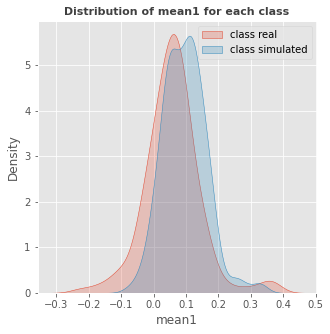

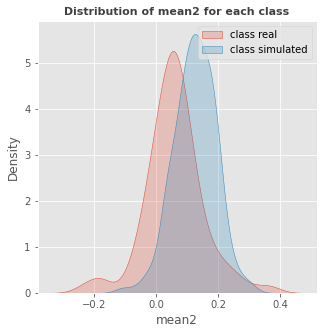

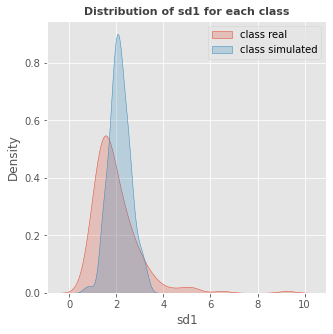

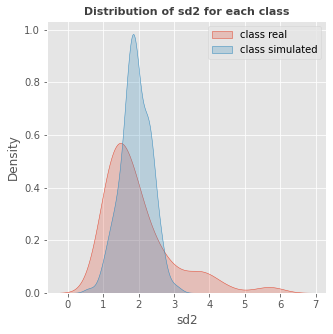

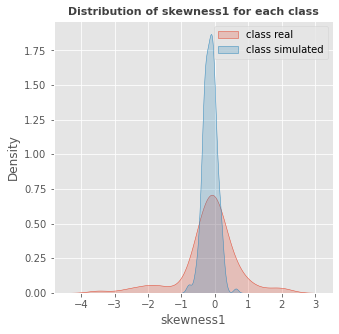

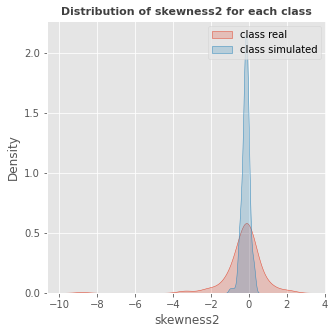

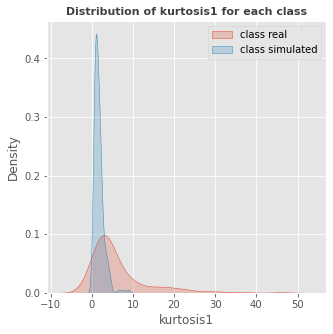

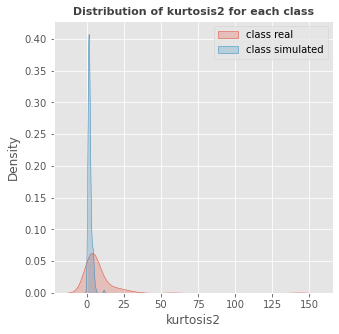

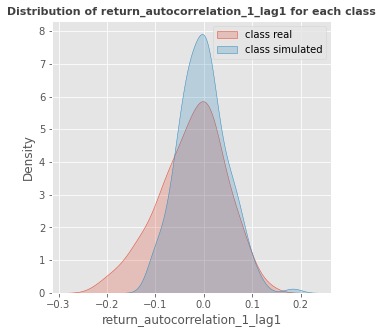

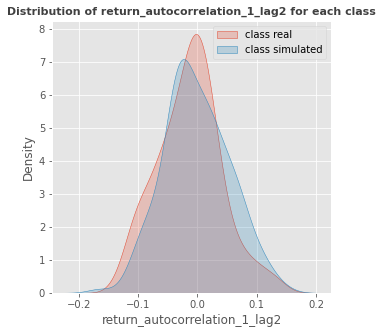

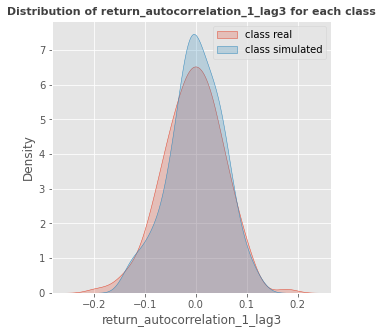

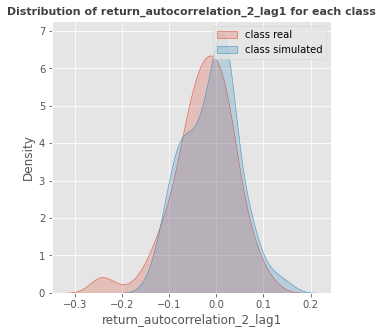

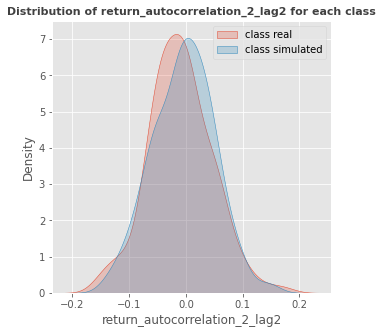

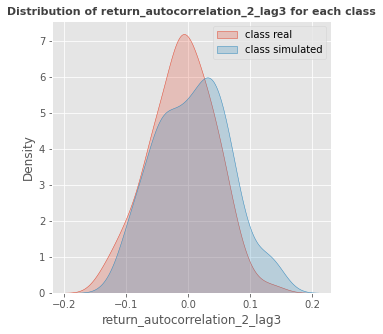

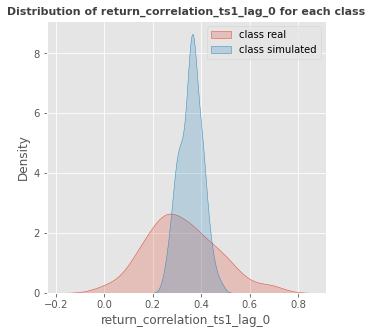

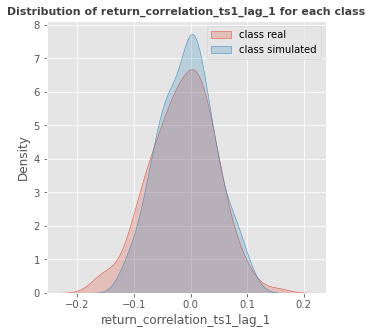

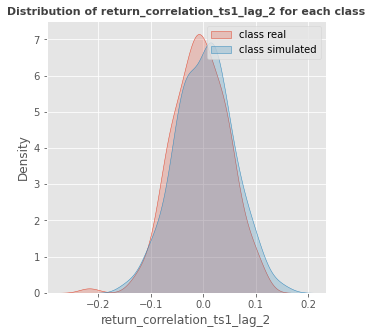

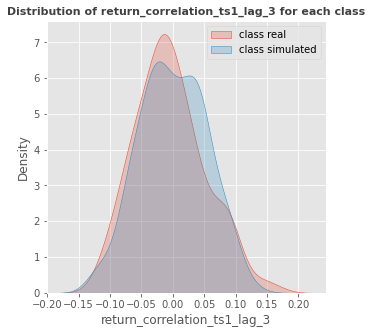

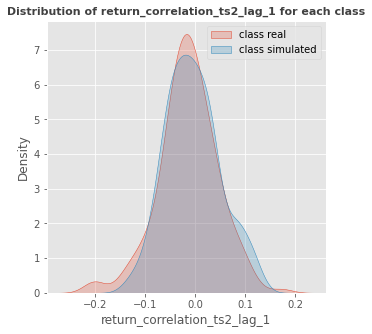

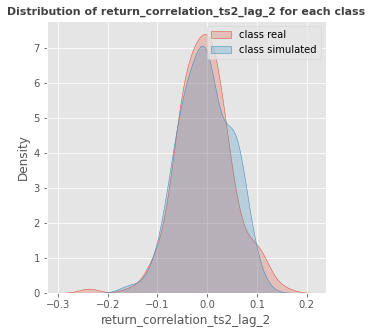

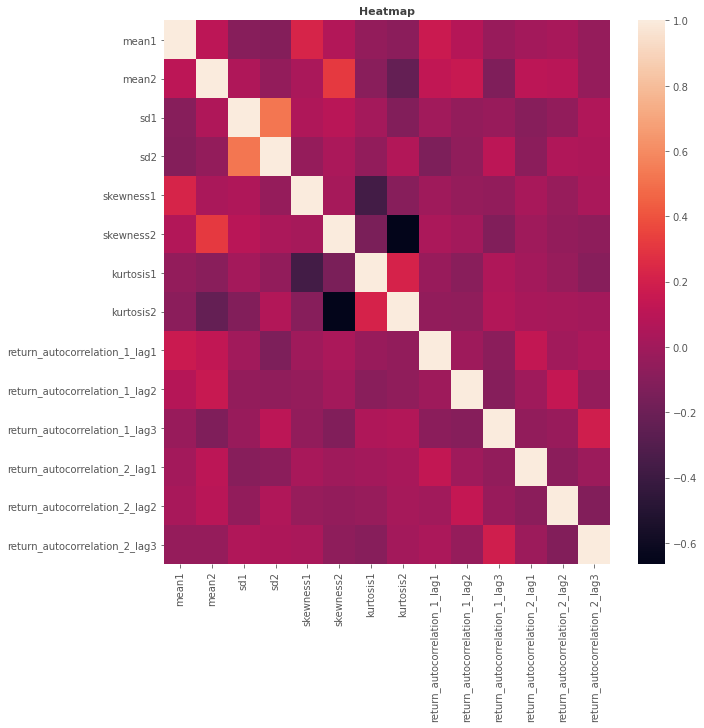

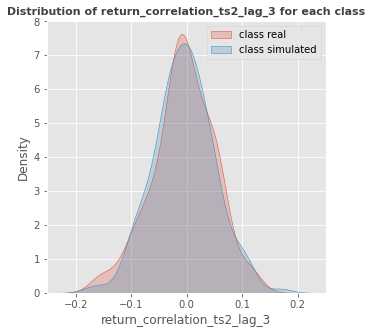

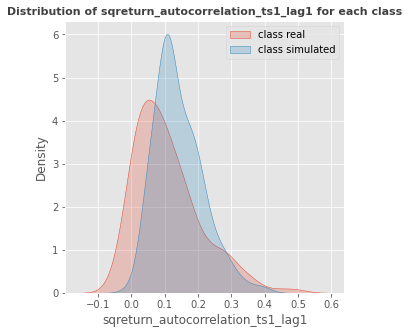

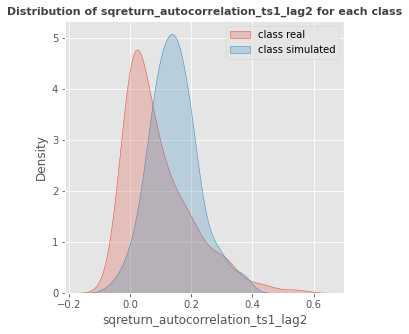

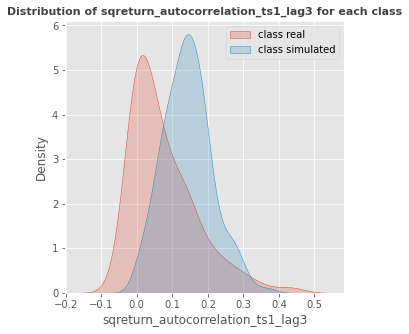

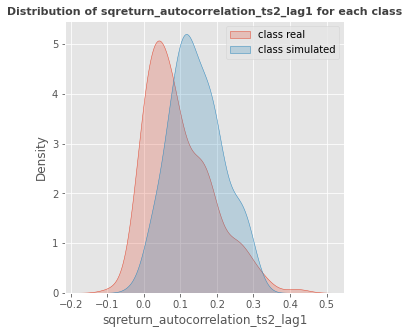

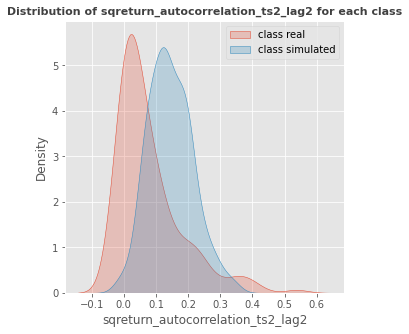

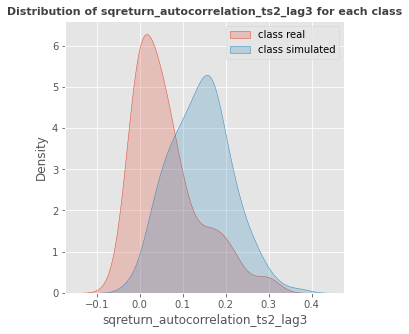

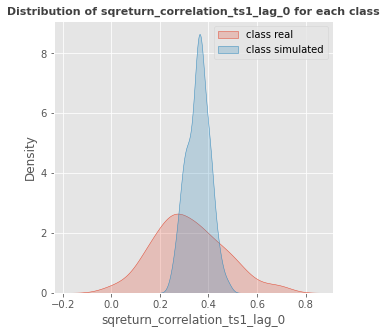

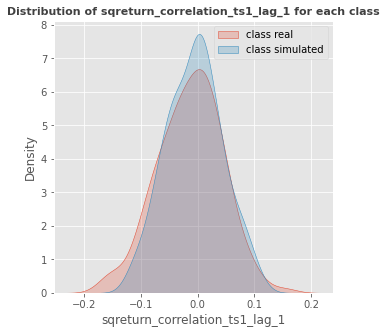

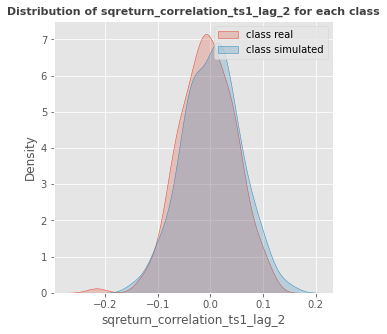

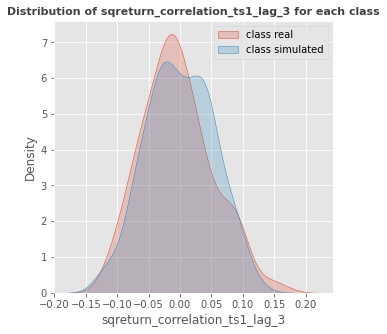

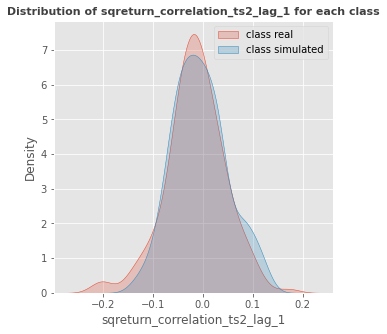

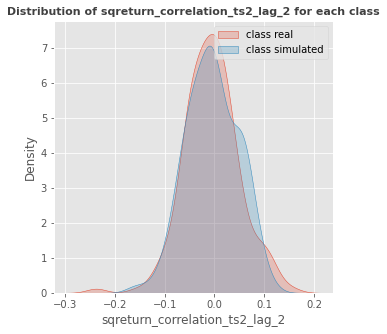

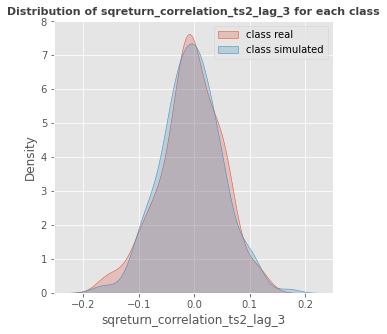

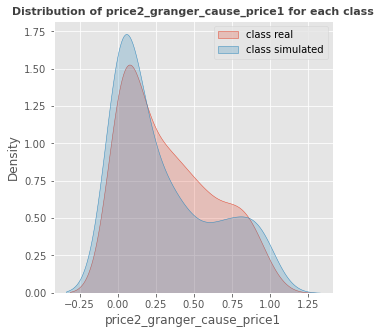

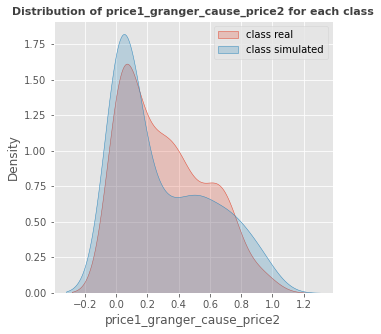

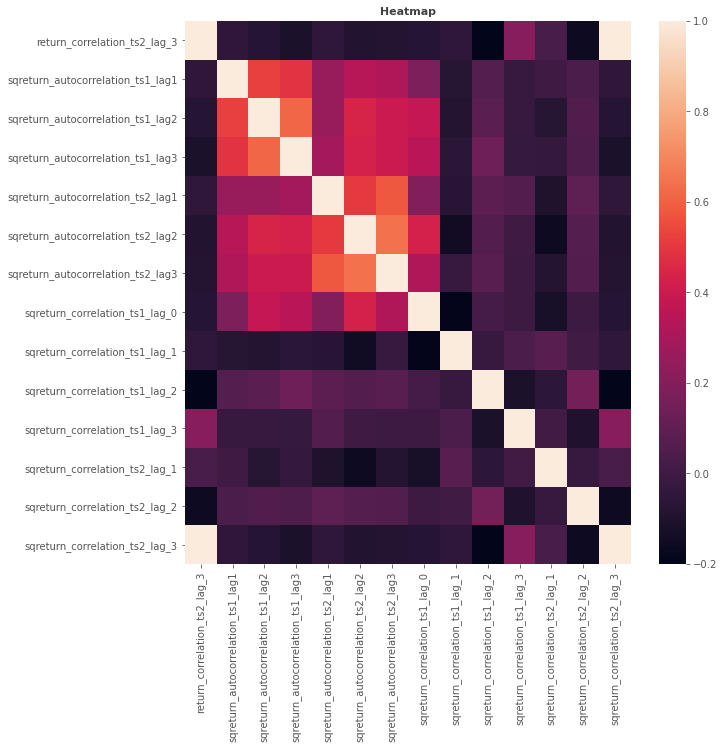

In [12]:
plt.rc('figure', max_open_warning = 0)
EDA.extensive_eda(X_train.iloc[:, 0:20], y_train, save_path="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/EDA_stvol_4")
EDA.extensive_eda(X_train.iloc[:, 20:36], y_train, save_path="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/EDA_stvol_4")

In [17]:
real_statistics = create_statistics(
    label="real", 
    rolling_window=20, 
    return_csv_location=real_data_folder + "pair_returns_classify.csv", 
    price_csv_location=real_data_folder + "pair_prices_classify.csv")  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5909  , p=0.2048  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=3.2140  , p=0.2005  , df=2
likelihood ratio test: chi2=3.2037  , p=0.2015  , df=2
parameter F test:         F=1.5909  , p=0.2048  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.5049  , p=0.0016  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=13.1418 , p=0.0014  , df=2
likelihood ratio test: chi2=12.9713 , p=0.0015  , df=2
parameter F test:         F=6.5049  , p=0.0016  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6032  , p=0.4377  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.6068  , p=0.4360  , df=1
likelihood ratio test: chi2=0.6065  , p=0.4361  , df=1
parameter F test:         F=0.6032  , p=0.4377  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.8732 , p=0.0006  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7299  , p=0.4825  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.4746  , p=0.4784  , df=2
likelihood ratio test: chi2=1.4724  , p=0.4789  , df=2
parameter F test:         F=0.7299  , p=0.4825  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6513  , p=0.5218  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.3159  , p=0.5179  , df=2
likelihood ratio test: chi2=1.3141  , p=0.5184  , df=2
parameter F test:         F=0.6513  , p=0.5218  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9854  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0003  , p=0.9853  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9853  , df=1
parameter F test:         F=0.0003  , p=0.9854  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0843  , p=0.2982  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8855  , p=0.3471  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.8909  , p=0.3452  , df=1
likelihood ratio test: chi2=0.8901  , p=0.3455  , df=1
parameter F test:         F=0.8855  , p=0.3471  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7701  , p=0.3806  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.7748  , p=0.3787  , df=1
likelihood ratio test: chi2=0.7742  , p=0.3789  , df=1
parameter F test:         F=0.7701  , p=0.3806  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3677  , p=0.8317  , df_denom=487, df_num=4
ssr based chi2 test:   chi2=1.4978  , p=0.8270  , df=4
likelihood ratio test: chi2=1.4956  , p=0.8274  , df=4
parameter F test:         F=0.3677  , p=0.8317  , df_denom=487, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8695  , p=0.1146  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1935  , p=0.6602  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.1947  , p=0.6590  , df=1
likelihood ratio test: chi2=0.1947  , p=0.6591  , df=1
parameter F test:         F=0.1935  , p=0.6602  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7412  , p=0.3897  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.7457  , p=0.3878  , df=1
likelihood ratio test: chi2=0.7452  , p=0.3880  , df=1
parameter F test:         F=0.7412  , p=0.3897  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5593  , p=0.5720  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.1299  , p=0.5684  , df=2
likelihood ratio test: chi2=1.1286  , p=0.5688  , df=2
parameter F test:         F=0.5593  , p=0.5720  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3638  , p=0.6952  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1398  , p=0.7086  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.1406  , p=0.7076  , df=1
likelihood ratio test: chi2=0.1406  , p=0.7077  , df=1
parameter F test:         F=0.1398  , p=0.7086  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1496  , p=0.6991  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.1505  , p=0.6980  , df=1
likelihood ratio test: chi2=0.1505  , p=0.6981  , df=1
parameter F test:         F=0.1496  , p=0.6991  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6882  , p=0.5029  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.3904  , p=0.4990  , df=2
likelihood ratio test: chi2=1.3885  , p=0.4994  , df=2
parameter F test:         F=0.6882  , p=0.5029  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3040  , p=0.2724  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9199  , p=0.3380  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.9255  , p=0.3360  , df=1
likelihood ratio test: chi2=0.9246  , p=0.3363  , df=1
parameter F test:         F=0.9199  , p=0.3380  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2725  , p=0.0711  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=3.2923  , p=0.0696  , df=1
likelihood ratio test: chi2=3.2815  , p=0.0701  , df=1
parameter F test:         F=3.2725  , p=0.0711  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.2633  , p=0.0042  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=8.3133  , p=0.0039  , df=1
likelihood ratio test: chi2=8.2448  , p=0.0041  , df=1
parameter F test:         F=8.2633  , p=0.0042  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0700  , p=0.7915  


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.8367  , p=0.1041  , df_denom=484, df_num=5
ssr based chi2 test:   chi2=9.3925  , p=0.0944  , df=5
likelihood ratio test: chi2=9.3045  , p=0.0975  , df=5
parameter F test:         F=1.8367  , p=0.1041  , df_denom=484, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.2117  , p=0.0520  , df_denom=484, df_num=5
ssr based chi2 test:   chi2=11.3098 , p=0.0456  , df=5
likelihood ratio test: chi2=11.1826 , p=0.0479  , df=5
parameter F test:         F=2.2117  , p=0.0520  , df_denom=484, df_num=5

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0606  , p=0.9412  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=0.1225  , p=0.9406  , df=2
likelihood ratio test: chi2=0.1225  , p=0.9406  , df=2
parameter F test:         F=0.0606  , p=0.9412  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4025  , p=0.6689  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3746  , p=0.0131  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=8.8379  , p=0.0120  , df=2
likelihood ratio test: chi2=8.7604  , p=0.0125  , df=2
parameter F test:         F=4.3746  , p=0.0131  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1620  , p=0.0432  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=6.3880  , p=0.0410  , df=2
likelihood ratio test: chi2=6.3474  , p=0.0418  , df=2
parameter F test:         F=3.1620  , p=0.0432  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.1464  , p=0.0470  , df_denom=481, df_num=6
ssr based chi2 test:   chi2=13.2266 , p=0.0396  , df=6
likelihood ratio test: chi2=13.0526 , p=0.0422  , df=6
parameter F test:         F=2.1464  , p=0.0470  , df_denom=481, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.5075  , p=0.1737  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9758  , p=0.3237  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.9817  , p=0.3218  , df=1
likelihood ratio test: chi2=0.9808  , p=0.3220  , df=1
parameter F test:         F=0.9758  , p=0.3237  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5980  , p=0.0584  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=3.6198  , p=0.0571  , df=1
likelihood ratio test: chi2=3.6067  , p=0.0575  , df=1
parameter F test:         F=3.5980  , p=0.0584  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1586  , p=0.1424  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.1716  , p=0.1406  , df=1
likelihood ratio test: chi2=2.1669  , p=0.1410  , df=1
parameter F test:         F=2.1586  , p=0.1424  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1707  , p=0.6797  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1378  , p=0.7107  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.1386  , p=0.7097  , df=1
likelihood ratio test: chi2=0.1386  , p=0.7097  , df=1
parameter F test:         F=0.1378  , p=0.7107  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6156  , p=0.4331  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.6193  , p=0.4313  , df=1
likelihood ratio test: chi2=0.6189  , p=0.4315  , df=1
parameter F test:         F=0.6156  , p=0.4331  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5883  , p=0.1083  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.6039  , p=0.1066  , df=1
likelihood ratio test: chi2=2.5971  , p=0.1071  , df=1
parameter F test:         F=2.5883  , p=0.1083  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0792  , p=0.0440  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2732  , p=0.6015  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.2748  , p=0.6001  , df=1
likelihood ratio test: chi2=0.2747  , p=0.6002  , df=1
parameter F test:         F=0.2732  , p=0.6015  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9585  , p=0.1623  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.9703  , p=0.1604  , df=1
likelihood ratio test: chi2=1.9665  , p=0.1608  , df=1
parameter F test:         F=1.9585  , p=0.1623  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5039  , p=0.4781  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.5070  , p=0.4765  , df=1
likelihood ratio test: chi2=0.5067  , p=0.4766  , df=1
parameter F test:         F=0.5039  , p=0.4781  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3313  , p=0.2491  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0659  , p=0.7975  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.0663  , p=0.7968  , df=1
likelihood ratio test: chi2=0.0663  , p=0.7968  , df=1
parameter F test:         F=0.0659  , p=0.7975  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1062  , p=0.1473  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.1190  , p=0.1455  , df=1
likelihood ratio test: chi2=2.1145  , p=0.1459  , df=1
parameter F test:         F=2.1062  , p=0.1473  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8420  , p=0.4315  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=1.7011  , p=0.4272  , df=2
likelihood ratio test: chi2=1.6982  , p=0.4278  , df=2
parameter F test:         F=0.8420  , p=0.4315  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6594  , p=0.0710  


Granger Causality
number of lags (no zero) 8
ssr based F test:         F=2.8128  , p=0.0047  , df_denom=475, df_num=8
ssr based chi2 test:   chi2=23.3079 , p=0.0030  , df=8
likelihood ratio test: chi2=22.7726 , p=0.0037  , df=8
parameter F test:         F=2.8128  , p=0.0047  , df_denom=475, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=1.4603  , p=0.1693  , df_denom=475, df_num=8
ssr based chi2 test:   chi2=12.1008 , p=0.1468  , df=8
likelihood ratio test: chi2=11.9544 , p=0.1532  , df=8
parameter F test:         F=1.4603  , p=0.1693  , df_denom=475, df_num=8

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.7998  , p=0.1113  , df_denom=484, df_num=5
ssr based chi2 test:   chi2=9.2038  , p=0.1012  , df=5
likelihood ratio test: chi2=9.1192  , p=0.1044  , df=5
parameter F test:         F=1.7998  , p=0.1113  , df_denom=484, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.3562  , p=0.0054  

parameter F test:         F=10.1297 , p=0.0016  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.6430  , p=0.0020  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=9.7013  , p=0.0018  , df=1
likelihood ratio test: chi2=9.6082  , p=0.0019  , df=1
parameter F test:         F=9.6430  , p=0.0020  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3822  , p=0.0368  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=4.4087  , p=0.0358  , df=1
likelihood ratio test: chi2=4.3894  , p=0.0362  , df=1
parameter F test:         F=4.3822  , p=0.0368  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4626  , p=0.4967  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.4654  , p=0.4951  , df=1
likelihood ratio test: chi2=0.4652  , p=0.4952  , df=1
parameter F test:         F=0.4626  , p=0.4967  , df_denom=496, df_num=1

Granger Causality
nu

ssr based F test:         F=2.0053  , p=0.1574  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=2.0174  , p=0.1555  , df=1
likelihood ratio test: chi2=2.0133  , p=0.1559  , df=1
parameter F test:         F=2.0053  , p=0.1574  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.2945  , p=0.0218  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=5.3265  , p=0.0210  , df=1
likelihood ratio test: chi2=5.2983  , p=0.0213  , df=1
parameter F test:         F=5.2945  , p=0.0218  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2598  , p=0.2622  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.2674  , p=0.2603  , df=1
likelihood ratio test: chi2=1.2658  , p=0.2606  , df=1
parameter F test:         F=1.2598  , p=0.2622  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.9330  , p=0.0076  , df_denom=493, df_num=2
ssr based chi2 test: 

parameter F test:         F=0.8814  , p=0.4506  , df_denom=490, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2408  , p=0.2658  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=1.2484  , p=0.2639  , df=1
likelihood ratio test: chi2=1.2468  , p=0.2642  , df=1
parameter F test:         F=1.2408  , p=0.2658  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2720  , p=0.6022  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.2737  , p=0.6009  , df=1
likelihood ratio test: chi2=0.2736  , p=0.6009  , df=1
parameter F test:         F=0.2720  , p=0.6022  , df_denom=496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2113  , p=0.6459  , df_denom=496, df_num=1
ssr based chi2 test:   chi2=0.2126  , p=0.6447  , df=1
likelihood ratio test: chi2=0.2126  , p=0.6448  , df=1
parameter F test:         F=0.2113  , p=0.6459  , df_denom=496, df_num=1

Granger Causality
nu


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=5.3604  , p=0.0001  , df_denom=484, df_num=5
ssr based chi2 test:   chi2=27.4109 , p=0.0000  , df=5
likelihood ratio test: chi2=26.6789 , p=0.0001  , df=5
parameter F test:         F=5.3604  , p=0.0001  , df_denom=484, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.1383  , p=0.3391  , df_denom=484, df_num=5
ssr based chi2 test:   chi2=5.8209  , p=0.3240  , df=5
likelihood ratio test: chi2=5.7869  , p=0.3275  , df=5
parameter F test:         F=1.1383  , p=0.3391  , df_denom=484, df_num=5

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6783  , p=0.1878  , df_denom=493, df_num=2
ssr based chi2 test:   chi2=3.3906  , p=0.1835  , df=2
likelihood ratio test: chi2=3.3791  , p=0.1846  , df=2
parameter F test:         F=1.6783  , p=0.1878  , df_denom=493, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2992  , p=0.2737  

In [45]:
random_seed = 9868
    
n_sim_log_prices = n_stvol_simulation(
    random_seed=random_seed, num_sim=248,
    mu11=params[0], mu21=params[1], mu22=params[2], 
    mu31=params[3], mu41=params[4], mu42=params[5],  
    sigma11=params[6], sigma12=params[7], sigma13=params[8], sigma14=params[9],
    sigma21=params[10], sigma22=params[11], sigma23=params[12], sigma24=params[13],
    sigma31=params[14], sigma32=params[15], sigma33=params[16], sigma34=params[17],
    sigma41=params[18], sigma42=params[19], sigma43=params[20], sigma44=params[21],
    xinit_vec=xinit_vec, vinit_vec=vinit_vec, T0=T0, T=T, length=length)
    
    
n_sim_pair_prices = log_price_to_price(n_log_price=n_sim_log_prices)
n_sim_pair_returns = price_to_return(n_price=n_sim_pair_prices)

n_sim_pair_prices.to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_prices.csv")
n_sim_pair_returns.to_csv("/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_returns.csv")



simulated_statistics = create_statistics(
    label="simulated", 
    rolling_window=20, 
    return_csv_location="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_returns.csv", 
    price_csv_location="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/n_sim_stvol_pair_prices.csv")

dataset = pd.concat([real_statistics, simulated_statistics])
X = dataset.iloc[:, 0:36]
y = dataset.iloc[:, 36]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)
automl = AutoML(eval_metric='accuracy')
automl.fit(X_train, y_train)
predictions = automl.predict(X_test)
accuracy_result = accuracy_score(y_test, predictions)

print(f"Accuracy of predictions:  {accuracy_result:.3f}")


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5005  , p=0.2212  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.5095  , p=0.2192  , df=1
likelihood ratio test: chi2=1.5072  , p=0.2196  , df=1
parameter F test:         F=1.5005  , p=0.2212  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0253  , p=0.8737  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0254  , p=0.8733  , df=1
likelihood ratio test: chi2=0.0254  , p=0.8733  , df=1
parameter F test:         F=0.0253  , p=0.8737  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.8772  , p=0.0024  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=14.8403 , p=0.0020  , df=3
likelihood ratio test: chi2=14.6235 , p=0.0022  , df=3
parameter F test:         F=4.8772  , p=0.0024  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4947  , p=0.0592  

ssr based F test:         F=1.2338  , p=0.2672  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.2413  , p=0.2652  , df=1
likelihood ratio test: chi2=1.2397  , p=0.2655  , df=1
parameter F test:         F=1.2338  , p=0.2672  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0368  , p=0.8479  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0371  , p=0.8473  , df=1
likelihood ratio test: chi2=0.0371  , p=0.8473  , df=1
parameter F test:         F=0.0368  , p=0.8479  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9187  , p=0.1061  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=7.8162  , p=0.0985  , df=4
likelihood ratio test: chi2=7.7554  , p=0.1010  , df=4
parameter F test:         F=1.9187  , p=0.1061  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.3334  , p=0.0019  , df_denom=488, df_num=4
ssr based chi2 test: 

ssr based F test:         F=2.2391  , p=0.0236  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=18.5522 , p=0.0174  , df=8
likelihood ratio test: chi2=18.2116 , p=0.0197  , df=8
parameter F test:         F=2.2391  , p=0.0236  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=2.1393  , p=0.0310  , df_denom=476, df_num=8
ssr based chi2 test:   chi2=17.7260 , p=0.0234  , df=8
likelihood ratio test: chi2=17.4147 , p=0.0261  , df=8
parameter F test:         F=2.1393  , p=0.0310  , df_denom=476, df_num=8

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.4801  , p=0.1435  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=15.4622 , p=0.1161  , df=10
likelihood ratio test: chi2=15.2237 , p=0.1241  , df=10
parameter F test:         F=1.4801  , p=0.1435  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.7542  , p=0.0026  , df_denom=470, df_num=10
ssr based chi2


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6392  , p=0.5901  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=1.9449  , p=0.5839  , df=3
likelihood ratio test: chi2=1.9411  , p=0.5847  , df=3
parameter F test:         F=0.6392  , p=0.5901  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3943  , p=0.2437  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=4.2427  , p=0.2364  , df=3
likelihood ratio test: chi2=4.2247  , p=0.2382  , df=3
parameter F test:         F=1.3943  , p=0.2437  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1626  , p=0.3235  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=3.5377  , p=0.3159  , df=3
likelihood ratio test: chi2=3.5252  , p=0.3175  , df=3
parameter F test:         F=1.1626  , p=0.3235  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.5644  , p=0.0002  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1480  , p=0.7006  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1489  , p=0.6996  , df=1
likelihood ratio test: chi2=0.1489  , p=0.6996  , df=1
parameter F test:         F=0.1480  , p=0.7006  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5929  , p=0.0586  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.6146  , p=0.0573  , df=1
likelihood ratio test: chi2=3.6016  , p=0.0577  , df=1
parameter F test:         F=3.5929  , p=0.0586  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0257  , p=0.8727  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0259  , p=0.8722  , df=1
likelihood ratio test: chi2=0.0259  , p=0.8722  , df=1
parameter F test:         F=0.0257  , p=0.8727  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3432  , p=0.0121  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6616  , p=0.1744  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=5.0557  , p=0.1678  , df=3
likelihood ratio test: chi2=5.0303  , p=0.1696  , df=3
parameter F test:         F=1.6616  , p=0.1744  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8821  , p=0.0354  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=8.7695  , p=0.0325  , df=3
likelihood ratio test: chi2=8.6932  , p=0.0337  , df=3
parameter F test:         F=2.8821  , p=0.0354  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.4493  , p=0.0002  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=17.0696 , p=0.0002  , df=2
likelihood ratio test: chi2=16.7841 , p=0.0002  , df=2
parameter F test:         F=8.4493  , p=0.0002  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5682  , p=0.5669  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0062  , p=0.9375  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0062  , p=0.9373  , df=1
likelihood ratio test: chi2=0.0062  , p=0.9373  , df=1
parameter F test:         F=0.0062  , p=0.9375  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7899  , p=0.0291  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=4.8188  , p=0.0282  , df=1
likelihood ratio test: chi2=4.7958  , p=0.0285  , df=1
parameter F test:         F=4.7899  , p=0.0291  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.7769  , p=0.0088  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=9.6505  , p=0.0080  , df=2
likelihood ratio test: chi2=9.5584  , p=0.0084  , df=2
parameter F test:         F=4.7769  , p=0.0088  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3678  , p=0.0353  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5479  , p=0.2140  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.5573  , p=0.2121  , df=1
likelihood ratio test: chi2=1.5548  , p=0.2124  , df=1
parameter F test:         F=1.5479  , p=0.2140  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6500  , p=0.4205  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6540  , p=0.4187  , df=1
likelihood ratio test: chi2=0.6535  , p=0.4189  , df=1
parameter F test:         F=0.6500  , p=0.4205  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.4523  , p=0.1545  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=15.1724 , p=0.1259  , df=10
likelihood ratio test: chi2=14.9427 , p=0.1342  , df=10
parameter F test:         F=1.4523  , p=0.1545  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.7071  , p=0.


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5256  , p=0.0810  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=5.1024  , p=0.0780  , df=2
likelihood ratio test: chi2=5.0765  , p=0.0790  , df=2
parameter F test:         F=2.5256  , p=0.0810  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6931  , p=0.0256  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=7.4609  , p=0.0240  , df=2
likelihood ratio test: chi2=7.4057  , p=0.0247  , df=2
parameter F test:         F=3.6931  , p=0.0256  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9299  , p=0.0876  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.9476  , p=0.0860  , df=1
likelihood ratio test: chi2=2.9389  , p=0.0865  , df=1
parameter F test:         F=2.9299  , p=0.0876  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2764  , p=0.0392  


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5162  , p=0.0576  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=7.6561  , p=0.0537  , df=3
likelihood ratio test: chi2=7.5979  , p=0.0551  , df=3
parameter F test:         F=2.5162  , p=0.0576  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9695  , p=0.4068  , df_denom=491, df_num=3
ssr based chi2 test:   chi2=2.9501  , p=0.3994  , df=3
likelihood ratio test: chi2=2.9414  , p=0.4007  , df=3
parameter F test:         F=0.9695  , p=0.4068  , df_denom=491, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8570  , p=0.1168  , df_denom=488, df_num=4
ssr based chi2 test:   chi2=7.5649  , p=0.1089  , df=4
likelihood ratio test: chi2=7.5079  , p=0.1114  , df=4
parameter F test:         F=1.8570  , p=0.1168  , df_denom=488, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.1120  , p=0.0001  


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1359  , p=0.7125  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.1367  , p=0.7115  , df=1
likelihood ratio test: chi2=0.1367  , p=0.7116  , df=1
parameter F test:         F=0.1359  , p=0.7125  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1108  , p=0.1469  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=2.1235  , p=0.1451  , df=1
likelihood ratio test: chi2=2.1190  , p=0.1455  , df=1
parameter F test:         F=2.1108  , p=0.1469  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.1826  , p=0.0006  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=33.2477 , p=0.0002  , df=10
likelihood ratio test: chi2=32.1704 , p=0.0004  , df=10
parameter F test:         F=3.1826  , p=0.0006  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.0224  , p=0.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2447  , p=0.0723  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.2643  , p=0.0708  , df=1
likelihood ratio test: chi2=3.2537  , p=0.0713  , df=1
parameter F test:         F=3.2447  , p=0.0723  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6904  , p=0.4064  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.6945  , p=0.4046  , df=1
likelihood ratio test: chi2=0.6940  , p=0.4048  , df=1
parameter F test:         F=0.6904  , p=0.4064  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=1.3042  , p=0.2320  , df_denom=473, df_num=9
ssr based chi2 test:   chi2=12.2089 , p=0.2018  , df=9
likelihood ratio test: chi2=12.0599 , p=0.2100  , df=9
parameter F test:         F=1.3042  , p=0.2320  , df_denom=473, df_num=9

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=7.2702  , p=0.0000  

ssr based F test:         F=0.2152  , p=0.6429  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2165  , p=0.6417  , df=1
likelihood ratio test: chi2=0.2164  , p=0.6418  , df=1
parameter F test:         F=0.2152  , p=0.6429  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0252  , p=0.8739  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0254  , p=0.8735  , df=1
likelihood ratio test: chi2=0.0254  , p=0.8735  , df=1
parameter F test:         F=0.0252  , p=0.8739  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3058  , p=0.2719  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=2.6380  , p=0.2674  , df=2
likelihood ratio test: chi2=2.6310  , p=0.2683  , df=2
parameter F test:         F=1.3058  , p=0.2719  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3936  , p=0.6748  , df_denom=494, df_num=2
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.5917  , p=0.0176  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=15.9694 , p=0.0139  , df=6
likelihood ratio test: chi2=15.7172 , p=0.0154  , df=6
parameter F test:         F=2.5917  , p=0.0176  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.4475  , p=0.1947  , df_denom=482, df_num=6
ssr based chi2 test:   chi2=8.9192  , p=0.1782  , df=6
likelihood ratio test: chi2=8.8398  , p=0.1828  , df=6
parameter F test:         F=1.4475  , p=0.1947  , df_denom=482, df_num=6

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.6174  , p=0.0103  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=9.3283  , p=0.0094  , df=2
likelihood ratio test: chi2=9.2421  , p=0.0098  , df=2
parameter F test:         F=4.6174  , p=0.0103  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8337  , p=0.4351  

ssr based F test:         F=0.8148  , p=0.3671  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.8197  , p=0.3653  , df=1
likelihood ratio test: chi2=0.8191  , p=0.3655  , df=1
parameter F test:         F=0.8148  , p=0.3671  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8599  , p=0.0500  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.8832  , p=0.0488  , df=1
likelihood ratio test: chi2=3.8682  , p=0.0492  , df=1
parameter F test:         F=3.8599  , p=0.0500  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7102  , p=0.0547  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=3.7326  , p=0.0534  , df=1
likelihood ratio test: chi2=3.7187  , p=0.0538  , df=1
parameter F test:         F=3.7102  , p=0.0547  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6480  , p=0.5235  , df_denom=494, df_num=2
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2890  , p=0.5911  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.2907  , p=0.5898  , df=1
likelihood ratio test: chi2=0.2906  , p=0.5898  , df=1
parameter F test:         F=0.2890  , p=0.5911  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0668  , p=0.7962  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=0.0672  , p=0.7955  , df=1
likelihood ratio test: chi2=0.0672  , p=0.7955  , df=1
parameter F test:         F=0.0668  , p=0.7962  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9255  , p=0.1659  , df_denom=497, df_num=1
ssr based chi2 test:   chi2=1.9371  , p=0.1640  , df=1
likelihood ratio test: chi2=1.9333  , p=0.1644  , df=1
parameter F test:         F=1.9255  , p=0.1659  , df_denom=497, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8651  , p=0.0911  


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.9356  , p=0.0028  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=11.9914 , p=0.0025  , df=2
likelihood ratio test: chi2=11.8495 , p=0.0027  , df=2
parameter F test:         F=5.9356  , p=0.0028  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2069  , p=0.1111  , df_denom=494, df_num=2
ssr based chi2 test:   chi2=4.4585  , p=0.1076  , df=2
likelihood ratio test: chi2=4.4387  , p=0.1087  , df=2
parameter F test:         F=2.2069  , p=0.1111  , df_denom=494, df_num=2

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.0372  , p=0.0010  , df_denom=470, df_num=10
ssr based chi2 test:   chi2=31.7289 , p=0.0004  , df=10
likelihood ratio test: chi2=30.7458 , p=0.0006  , df=10
parameter F test:         F=3.0372  , p=0.0010  , df_denom=470, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.8741  , p=0.

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.505747 trained in 0.28 seconds
2_DecisionTree accuracy 0.850575 trained in 8.59 seconds
3_Linear accuracy 0.91954 trained in 2.87 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.965517 trained in 3.37 seconds
5_Default_NeuralNetwork accuracy 0.942529 trained in 1.5 seconds
6_Default_RandomForest accuracy 0.965517 trained in 6.71 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.965517 trained in 0.35 seconds
AutoML fit time: 33.75 seconds
AutoML best model: 4_Default_Xgboost
Accuracy of predictions:  0.866


An input array is constant; the correlation coefficent is not defined.


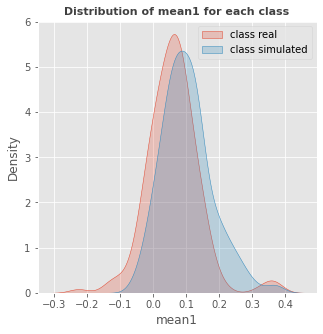

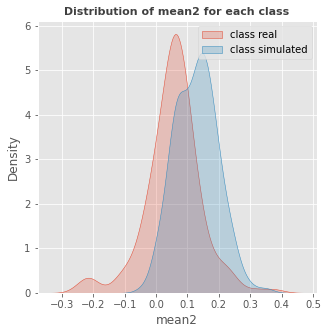

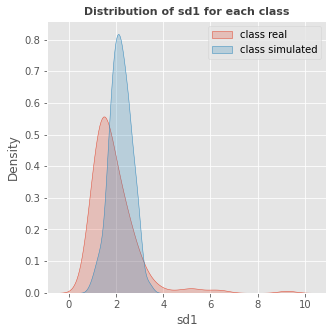

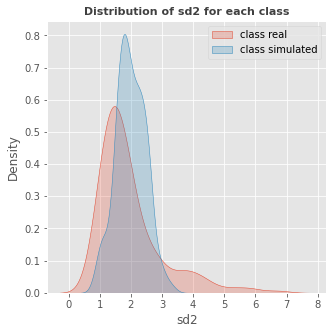

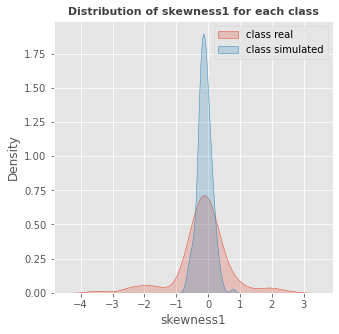

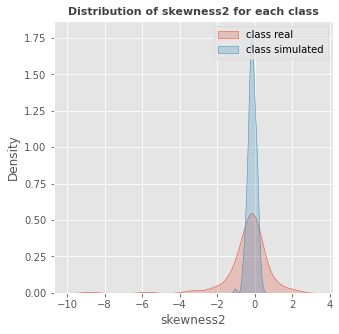

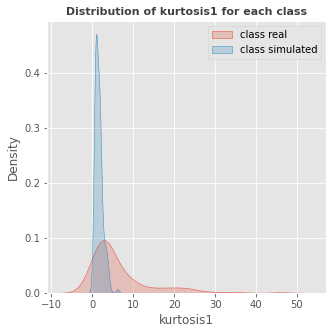

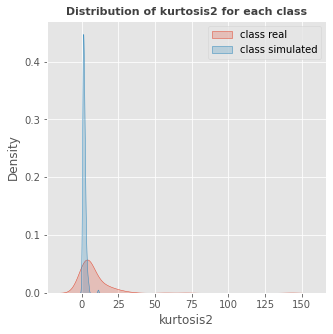

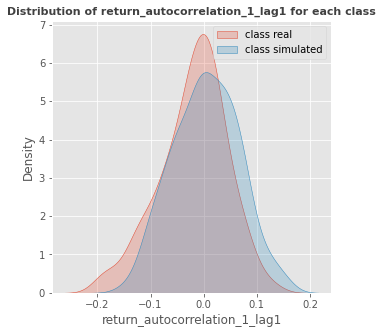

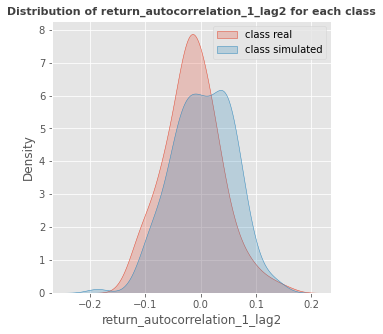

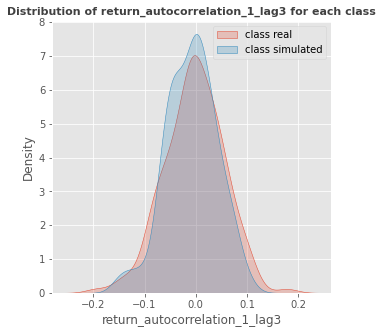

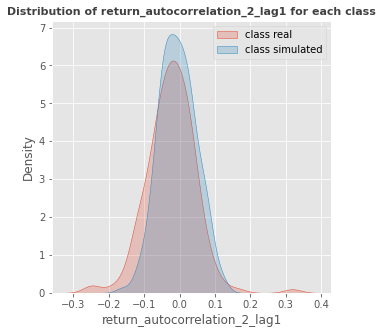

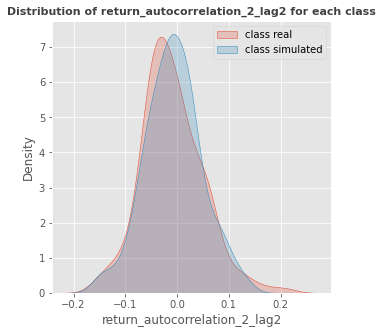

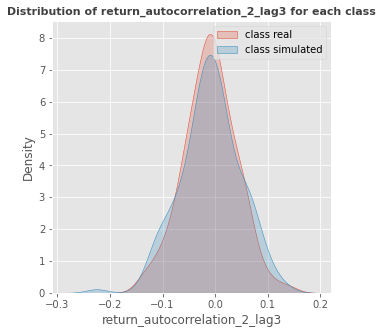

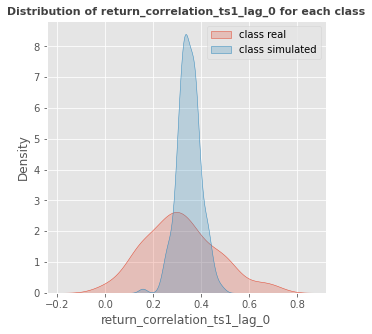

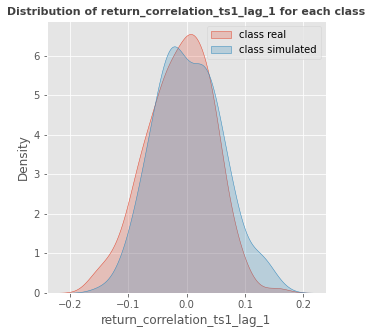

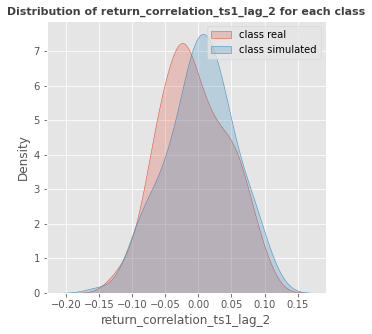

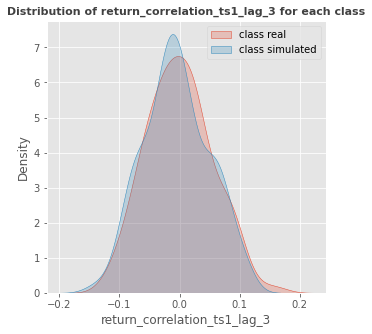

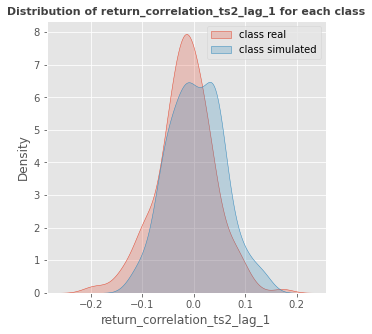

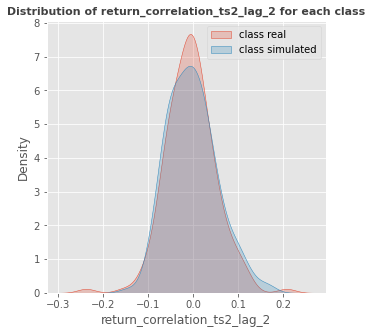

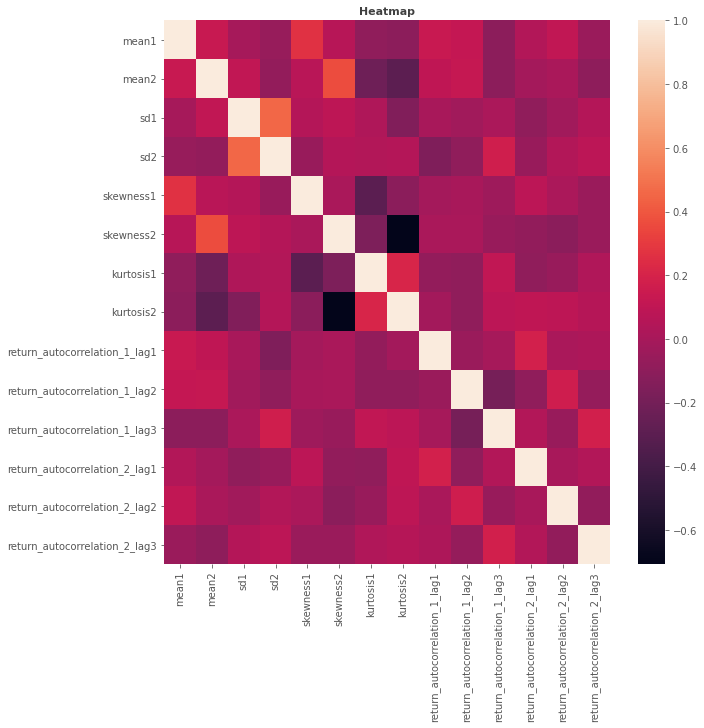

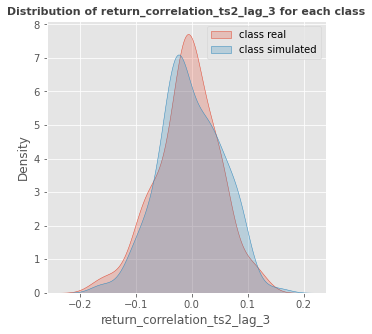

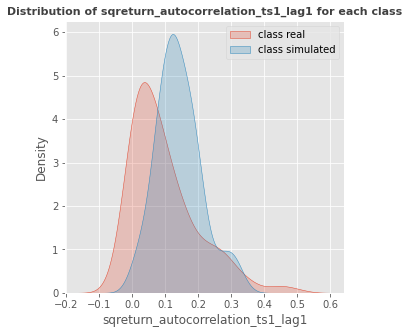

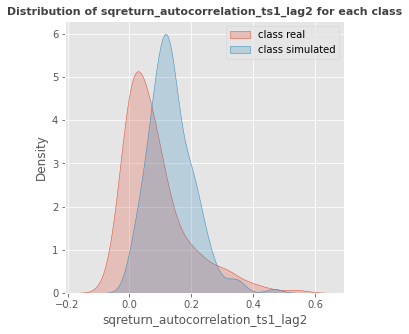

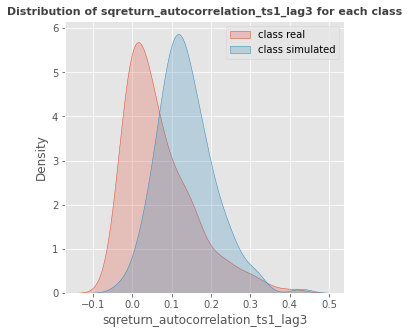

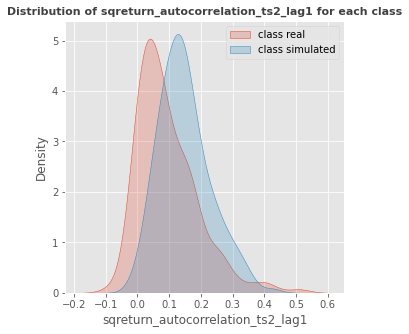

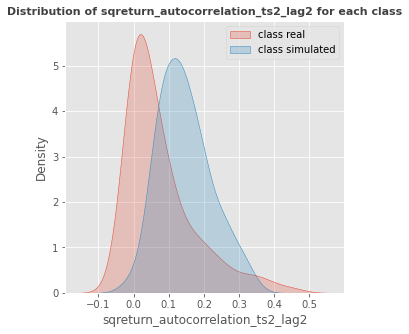

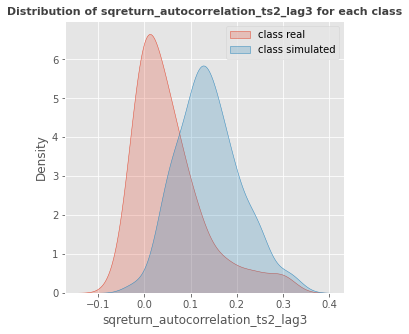

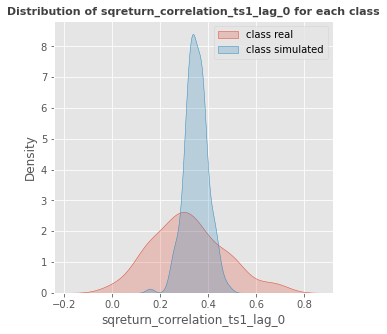

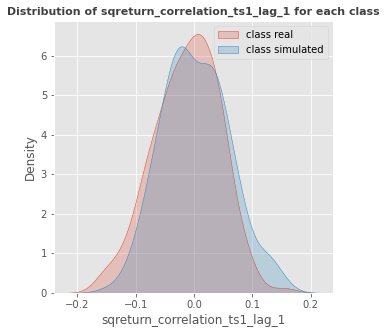

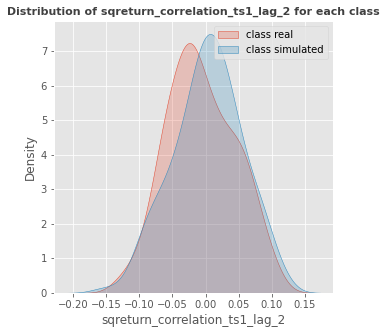

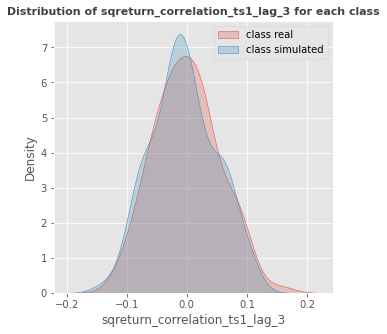

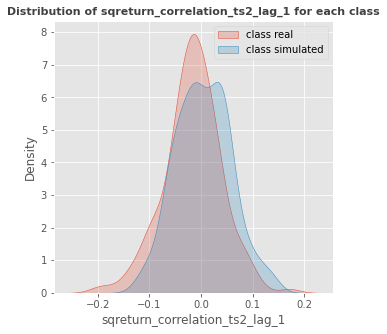

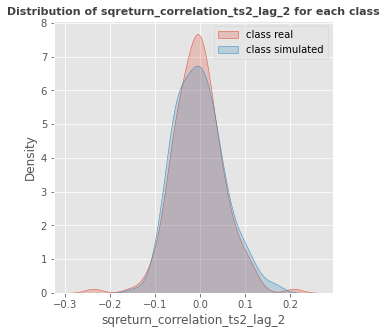

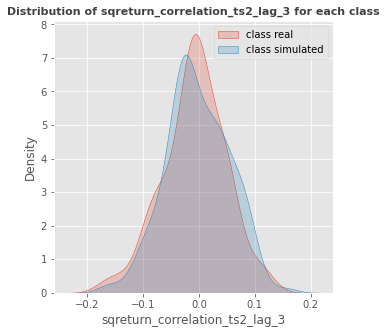

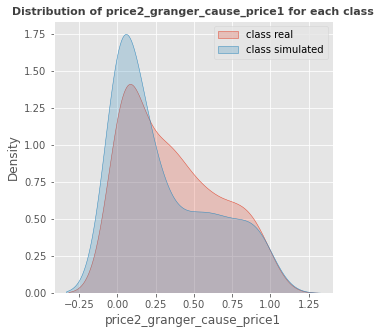

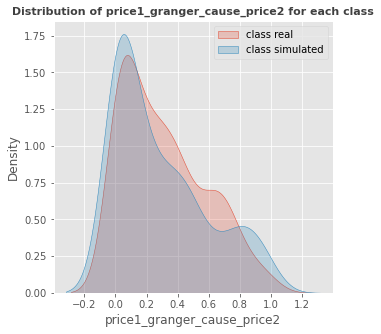

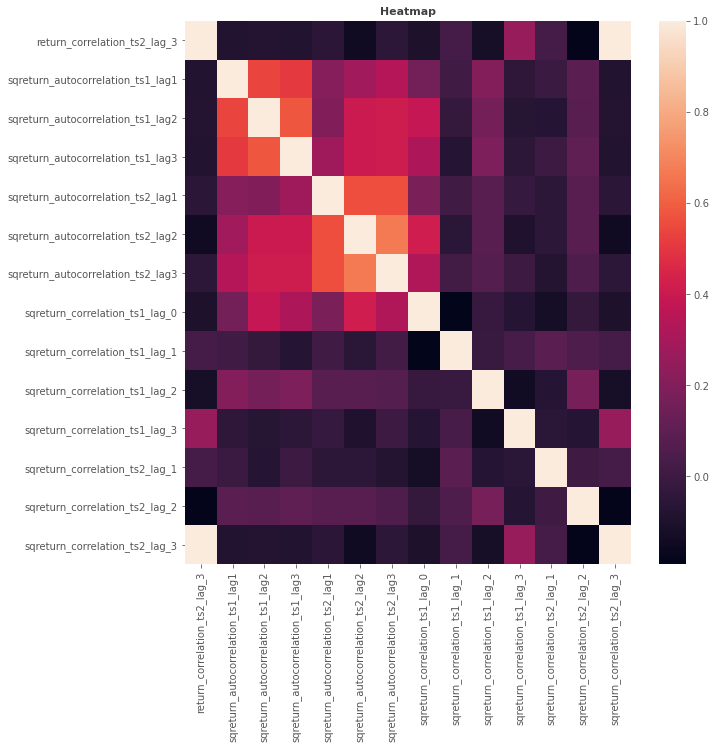

In [47]:
plt.rc('figure', max_open_warning = 0)
EDA.extensive_eda(X_train.iloc[:, 0:20], y_train, save_path="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/EDA_stvol_3")
EDA.extensive_eda(X_train.iloc[:, 20:36], y_train, save_path="/Users/changmao/Desktop/OneDrive - Imperial College London/InferStat - MSc Summer Project/GitHub/Summer-Research-Project/Calibration/Cluster jobs/cal_stvol/EDA_stvol_3")